In [79]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/')
from RF_atomver import *
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

In [151]:
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
feat_types = ['moe', 'mfp']
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']

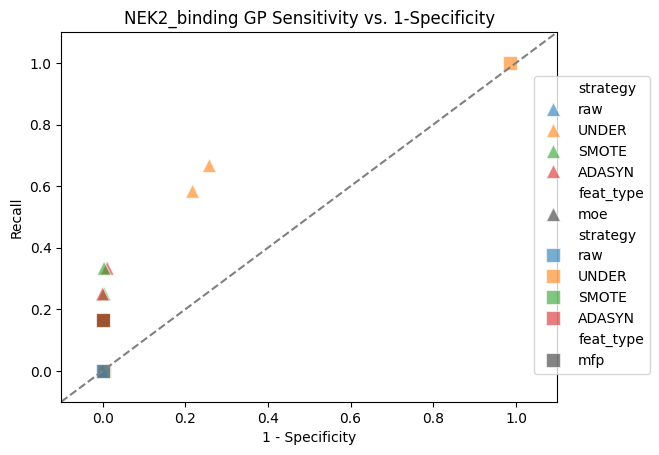

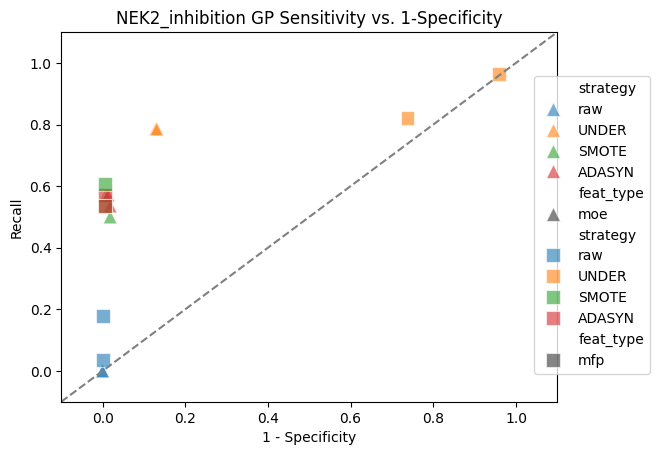

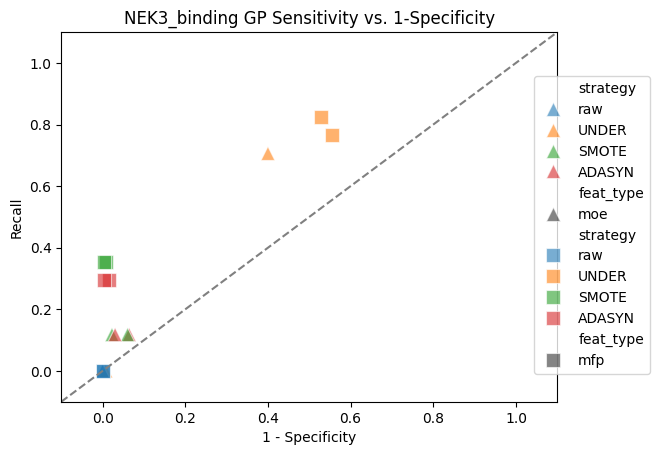

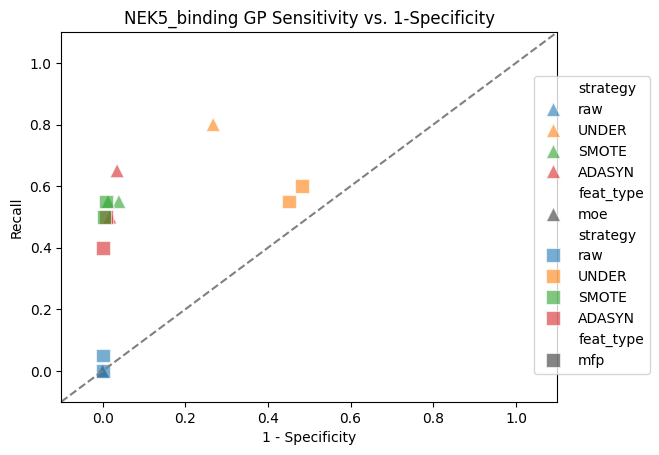

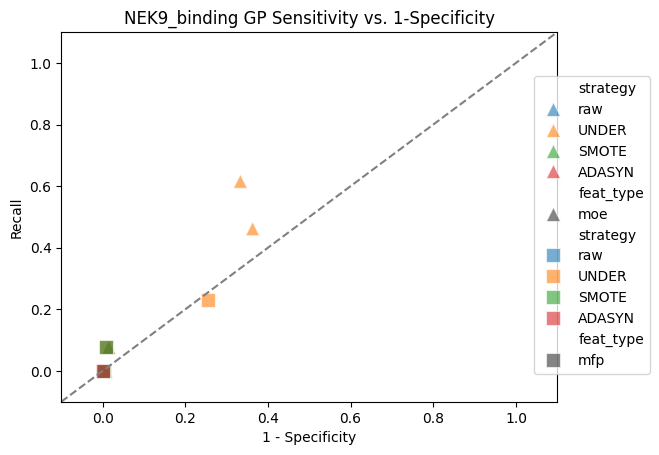

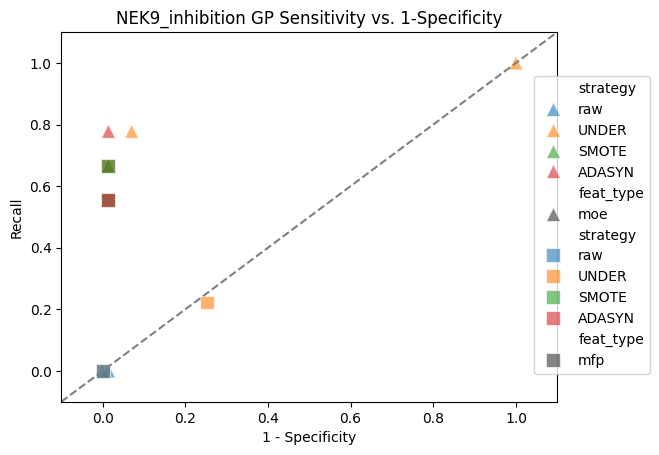

In [240]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp_rbf= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp_rbf = gp_rbf.replace('scaled','raw')
gp_rbf = gp_rbf.replace('GP','GP_RBF')
gp_matern= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
gp = pd.concat([gp_rbf, gp_matern])
gp['1-specificity'] = 1-gp['specificity']
# x axis is recall, y = 1-specificity 
hue_order = ['raw', 'UNDER', 'SMOTE', 'ADASYN']
for nek in neks:
    moe_df = gp[(gp['NEK']==nek) & (gp['feat_type']=='moe')]
    mfp_df = gp[(gp['NEK']==nek) & (gp['feat_type']=='mfp')]
    plt.figure()
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='feat_type', markers=['^'], s=100, hue_order=hue_order,alpha=0.6)
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='feat_type', markers=['s'], s=100,hue_order=hue_order,alpha=0.6)
    plt.plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.title(f'{nek} GP Sensitivity vs. 1-Specificity')
    plt.ylabel("Recall")
    plt.xlabel("1 - Specificity")
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.1,1.1)
    plt.legend(bbox_to_anchor = [1.2, 0.9])

    # plt.savefig(f'{figure_path}GP_{nek}_positive_rate_scatter.png',bbox_inches='tight' )
  
    plt.show();
    


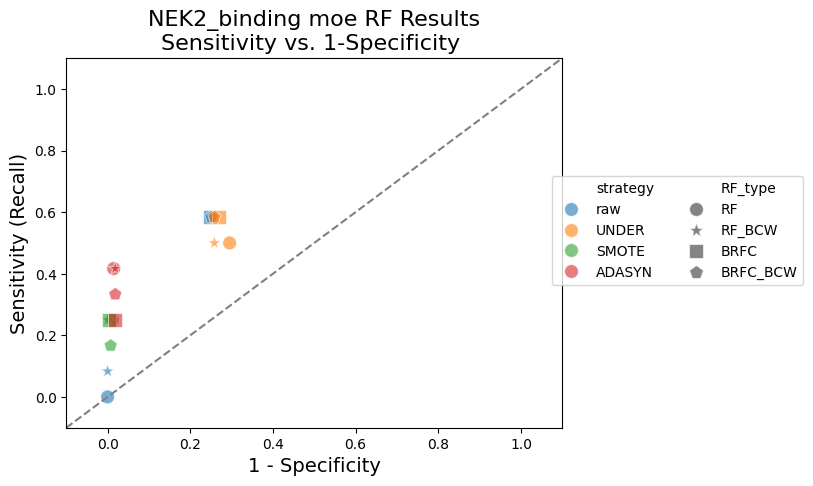

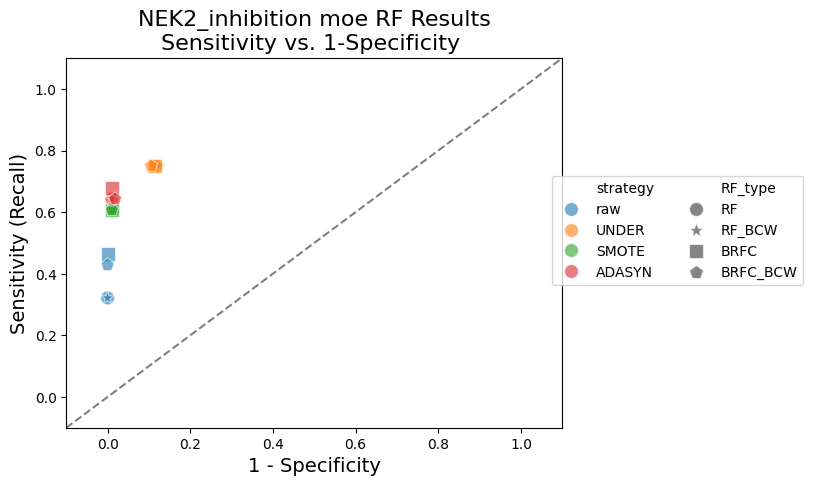

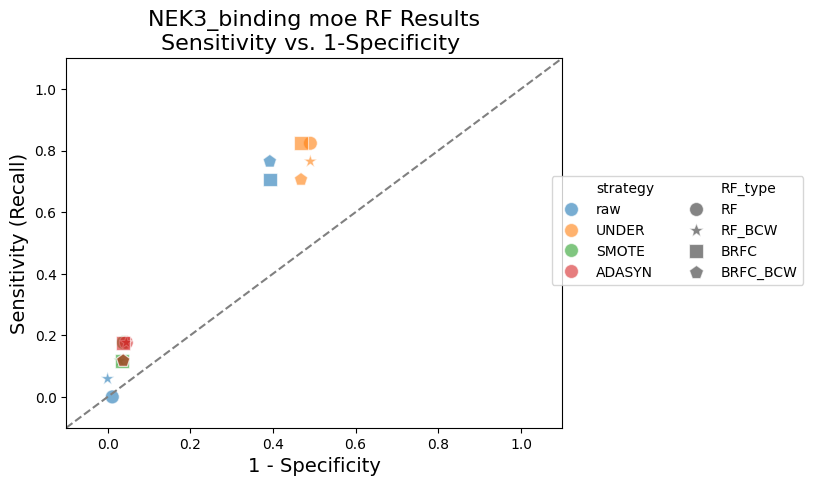

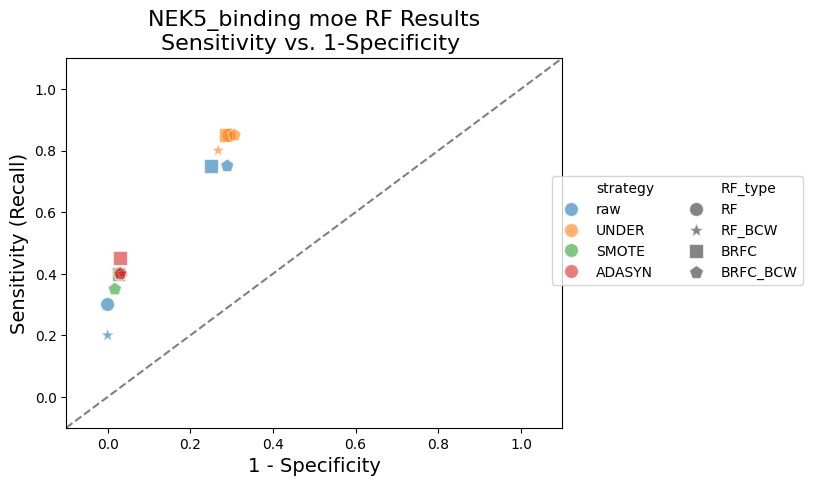

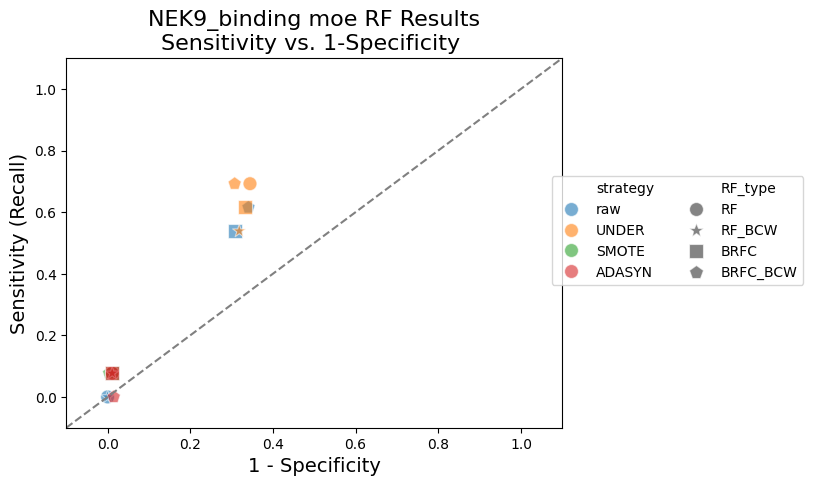

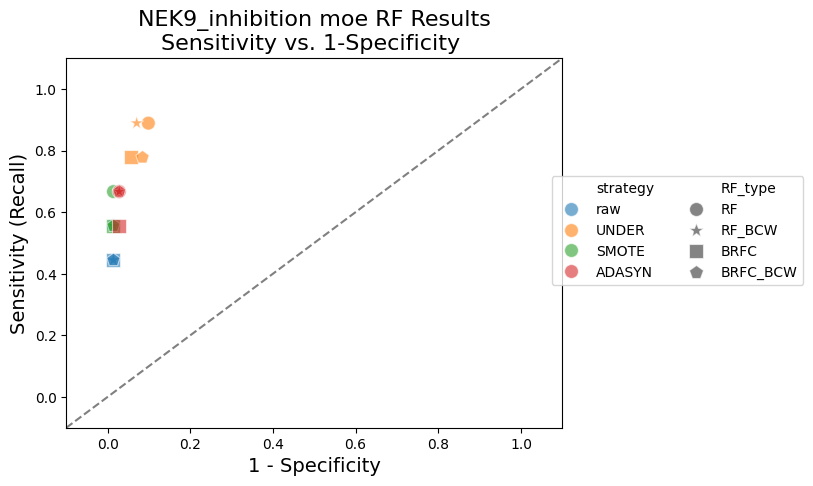

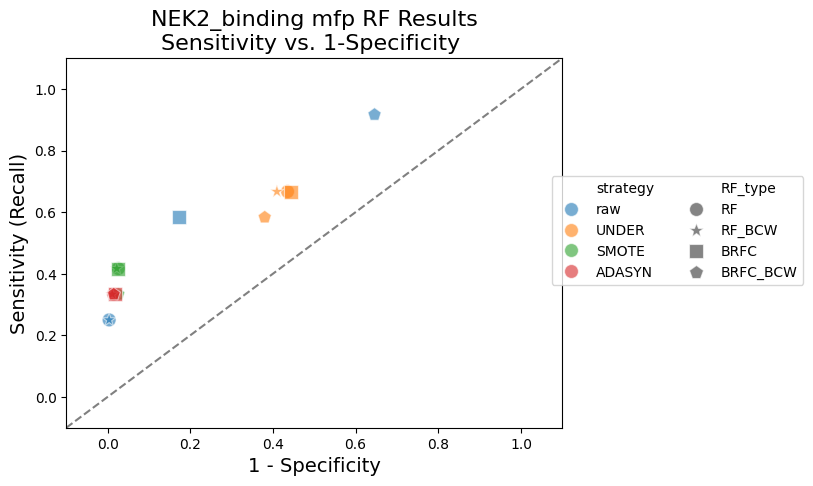

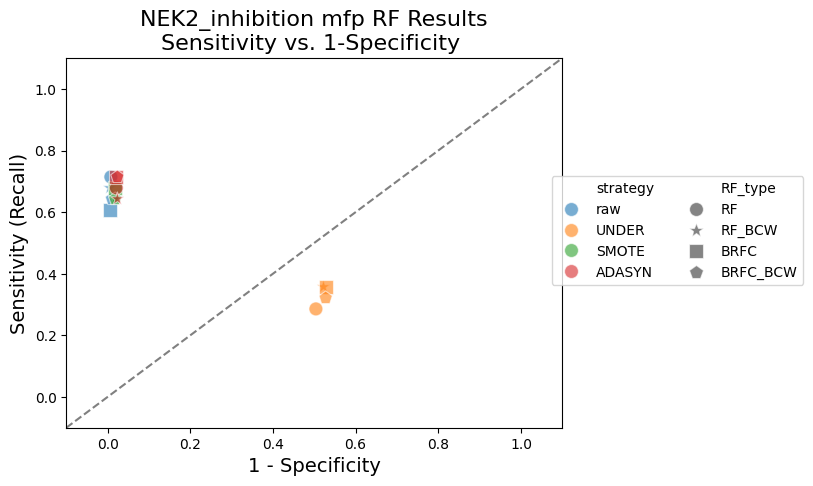

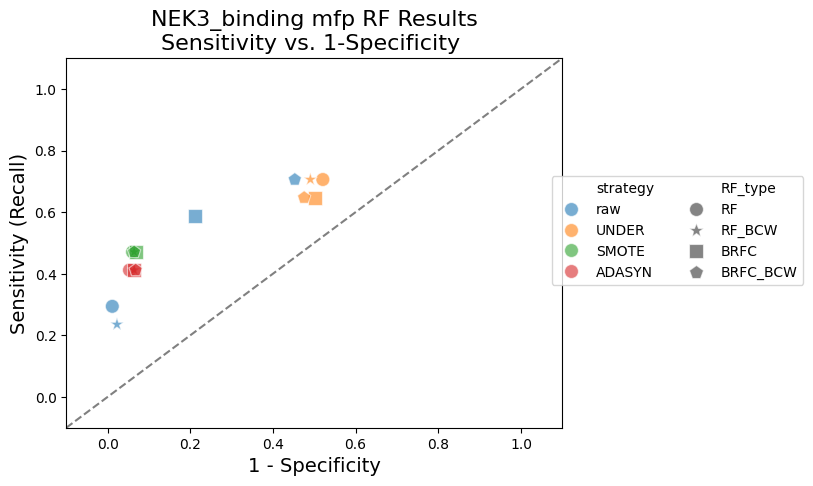

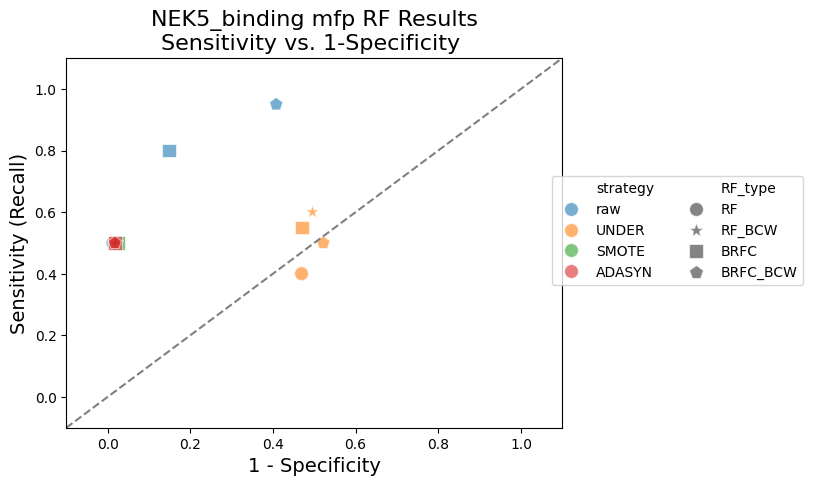

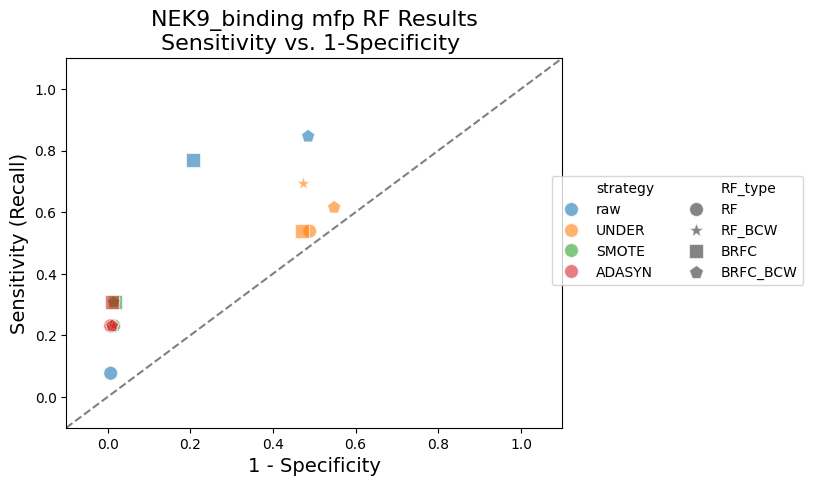

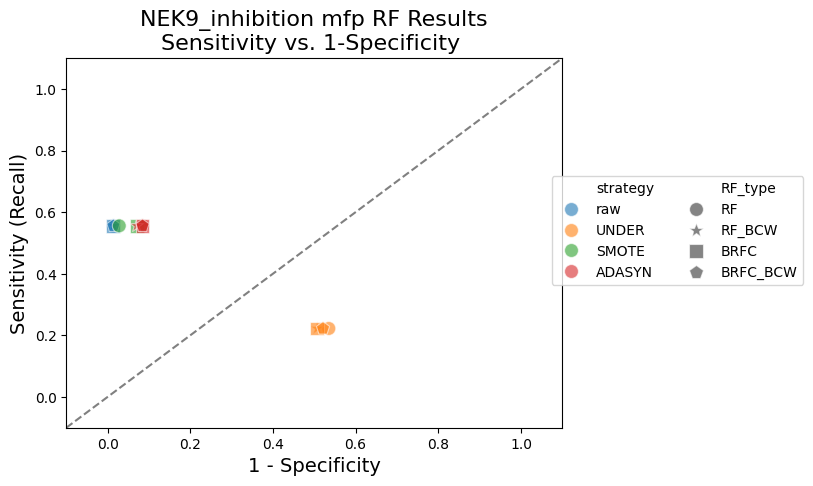

In [173]:
RFresult_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
df2 = pd.read_csv(f'{RFresult_path}RF_test_results_all_NEK.csv')
df2['1-specificity'] = 1-df2['specificity']
markers = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p'}
strategy_colors = {'raw': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'tab:green', 'ADASYN':'tab:red'}
for feat in feat_types: 
    for nek in neks:
        plt.figure()
        # for rf, st in markers.items(): 
        df = df2[(df2['NEK']==nek) & (df2['feat_type']==feat)]
        this_rf = df[df['RF_type'] == rf]
        sns.scatterplot(data=df, x='1-specificity',  y='recall',hue='strategy', style = 'RF_type',markers=markers, 
                        s=100, hue_order=hue_order,alpha=0.6,)
        
        plt.title(f'{nek} {feat} RF Results\nSensitivity vs. 1-Specificity ',fontsize=16)
        plt.ylabel('Sensitivity (Recall)', fontsize=14)
        plt.xlabel('1 - Specificity',fontsize=14)
        plt.plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
        plt.ylim(-0.1,1.1)
        plt.xlim(-0.1,1.1)
        plt.legend(ncols=2,bbox_to_anchor = [1.5, 0.7])
    
        plt.savefig(f'{figure_path}RF_{nek}_{feat}_positive_rate_scatter.png',bbox_inches='tight' )
      
        plt.show();

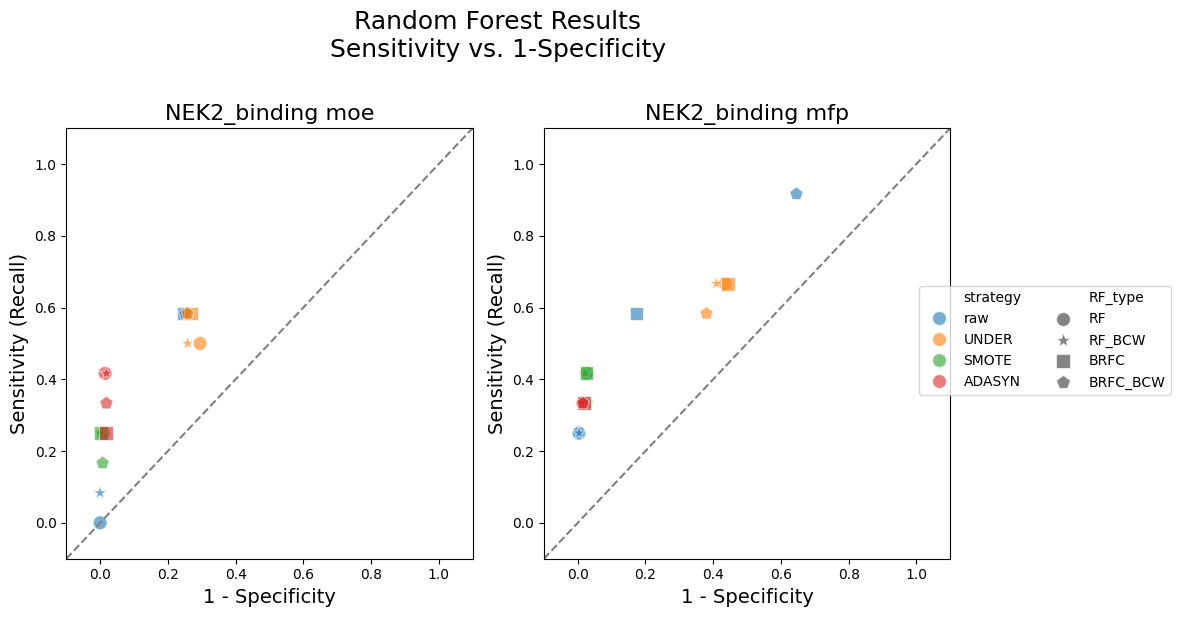

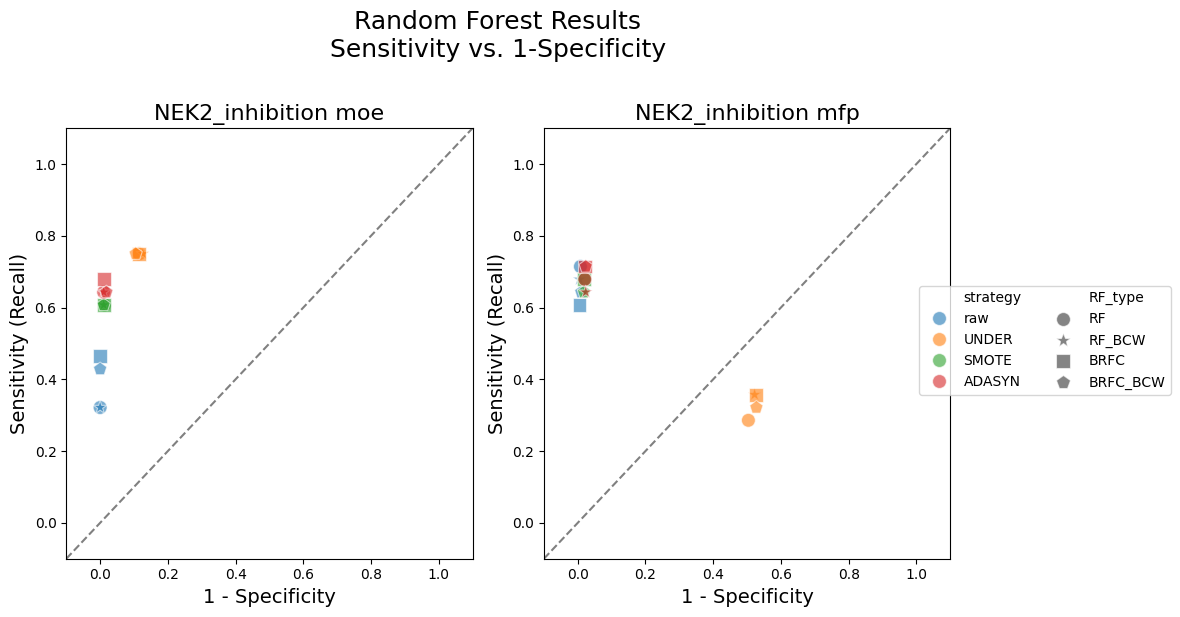

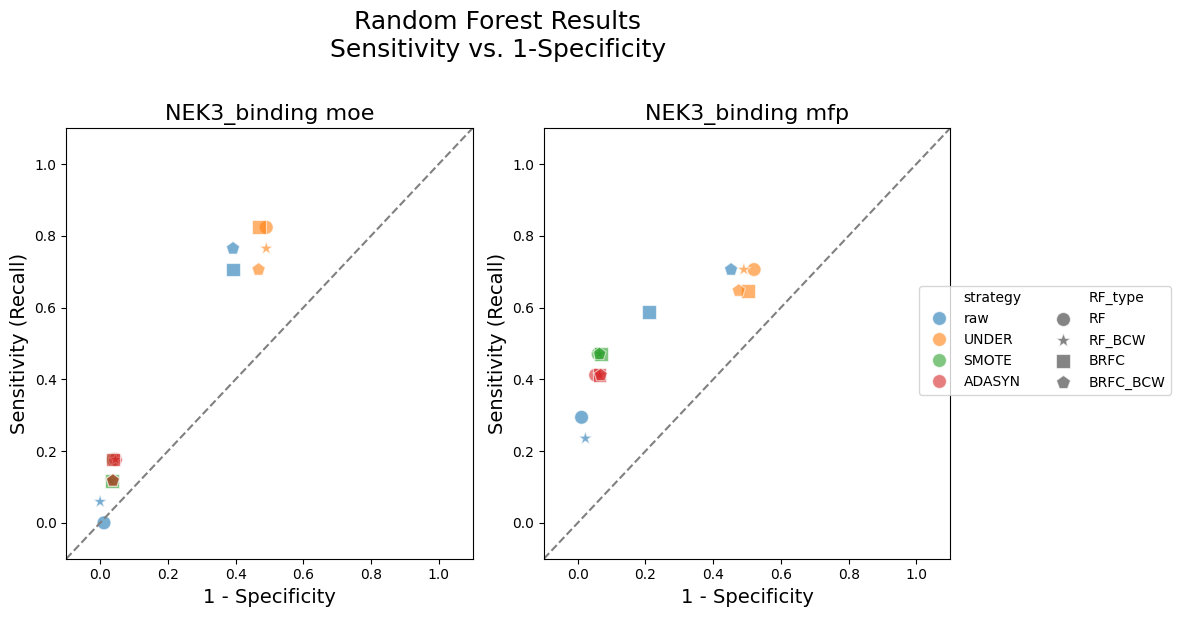

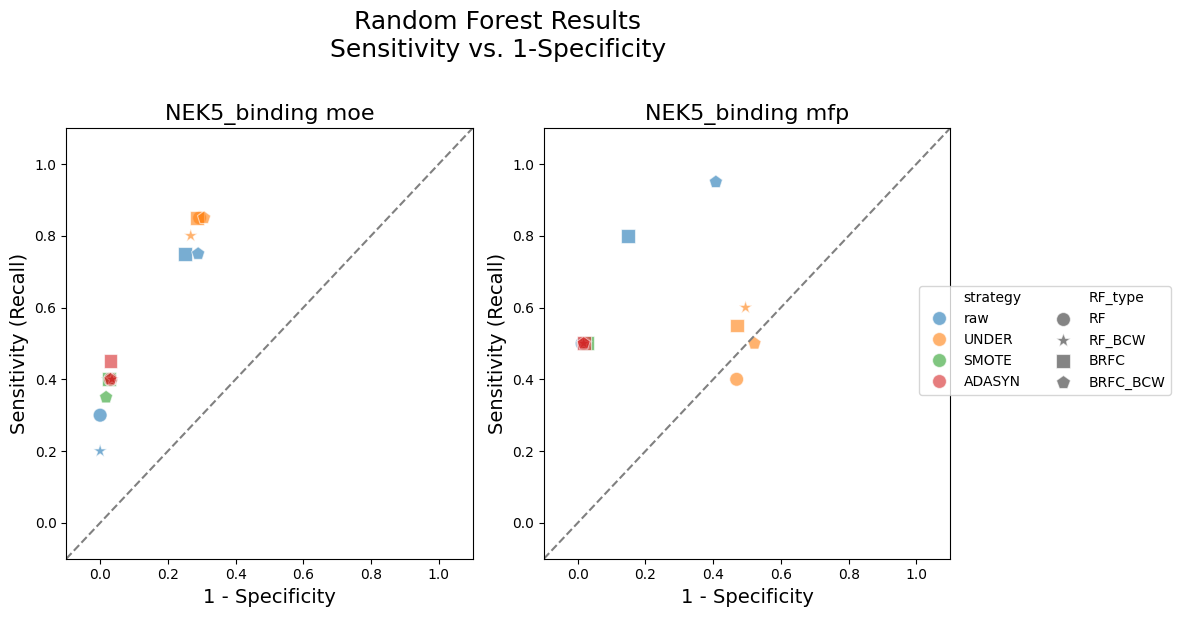

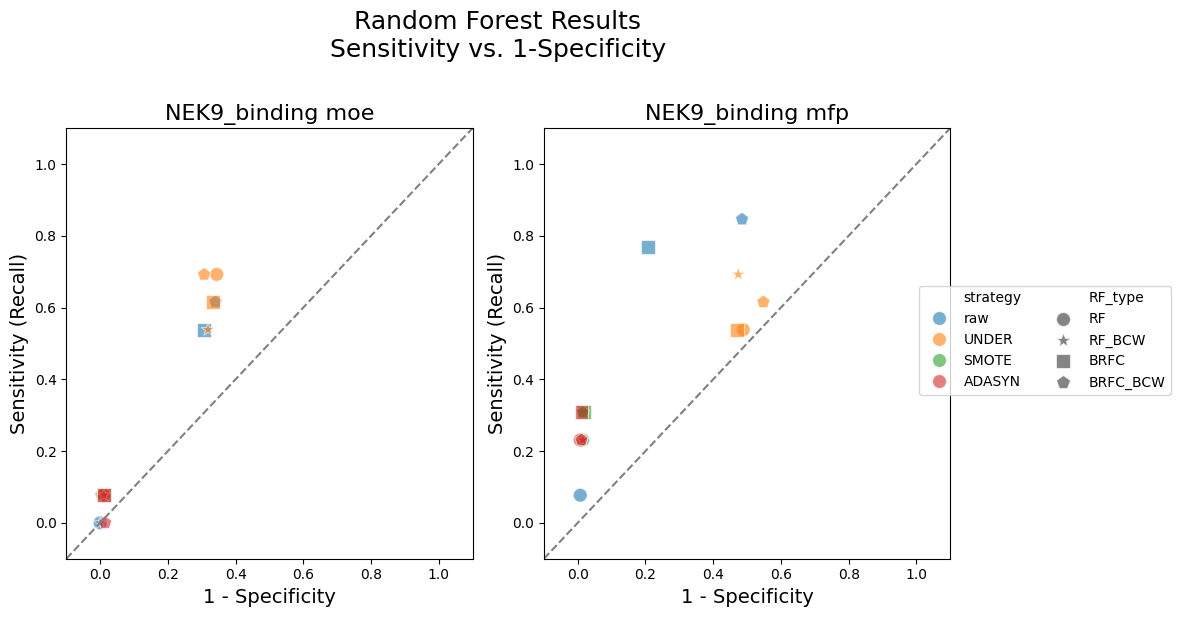

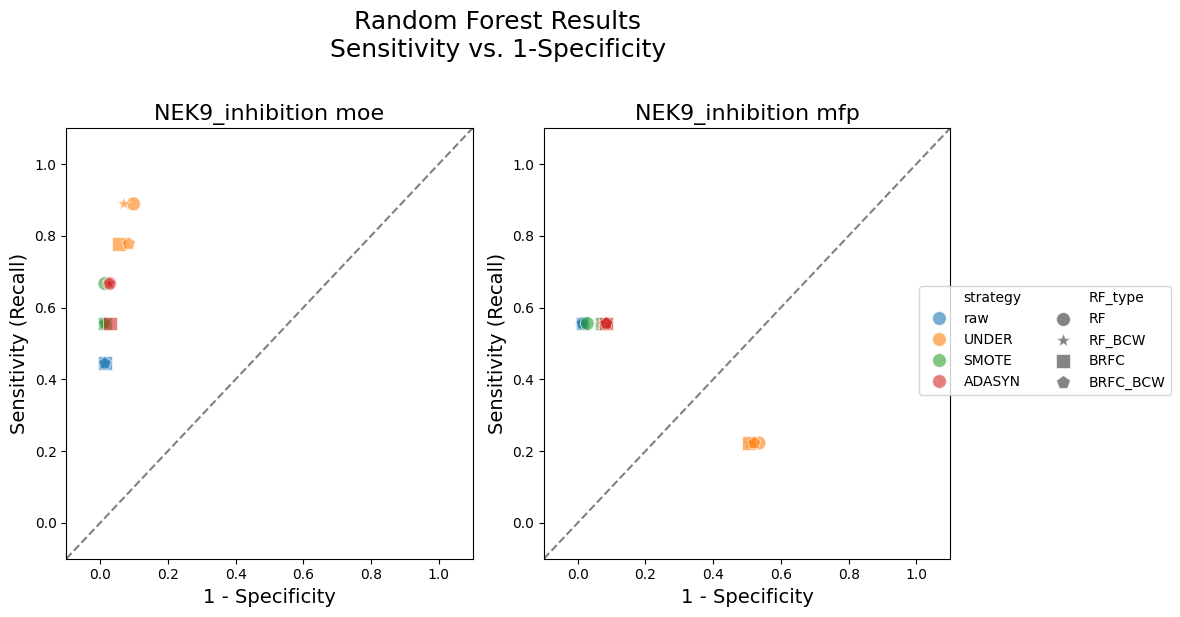

In [213]:

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = df2[(df2['NEK'] == nek) & (df2['feat_type'] == 'moe')]
    mfp_df = df2[(df2['NEK'] == nek) & (df2['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df,x='1-specificity',y='recall',hue='strategy', style='RF_type',
                    markers=markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity',y='recall', hue='strategy', style='RF_type',
                    markers=markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle('Random Forest Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.419, y =1.02)
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    

    axs[1].legend(ncols=2, bbox_to_anchor=(1.56, 0.65))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}subplots_moemfp/{nek}_RF_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3637732255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp['1-specificity'] = 1-gp['specificity']


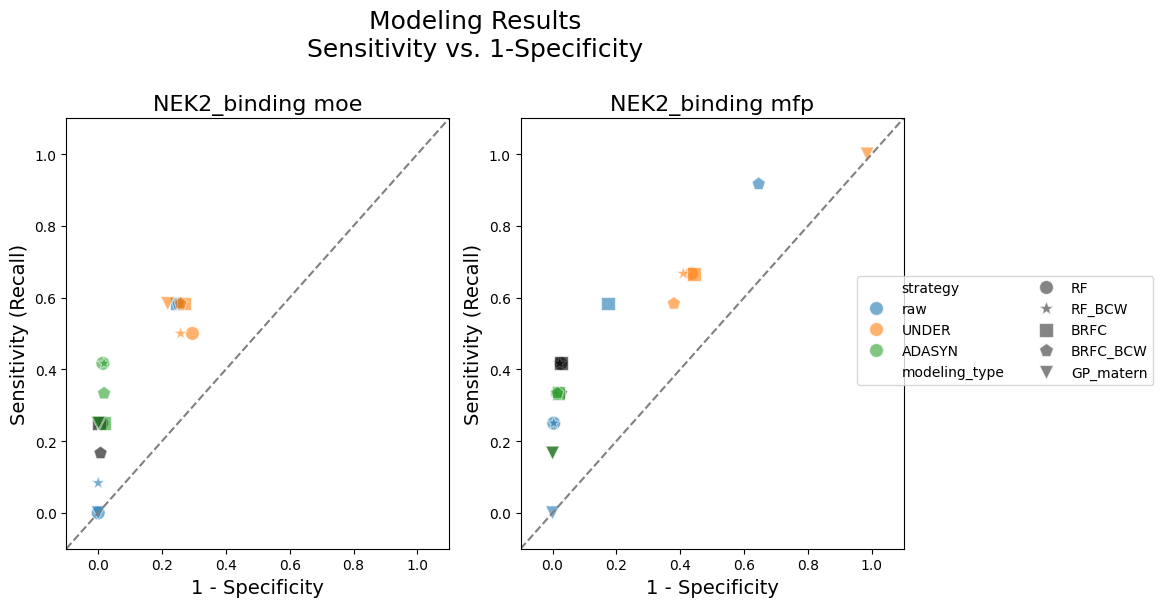

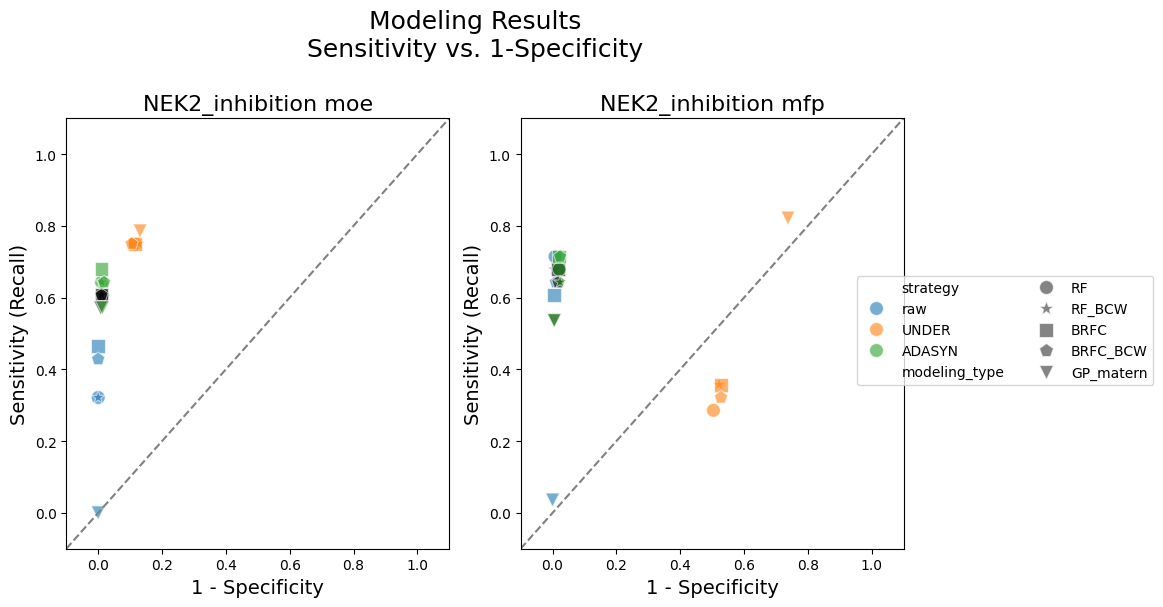

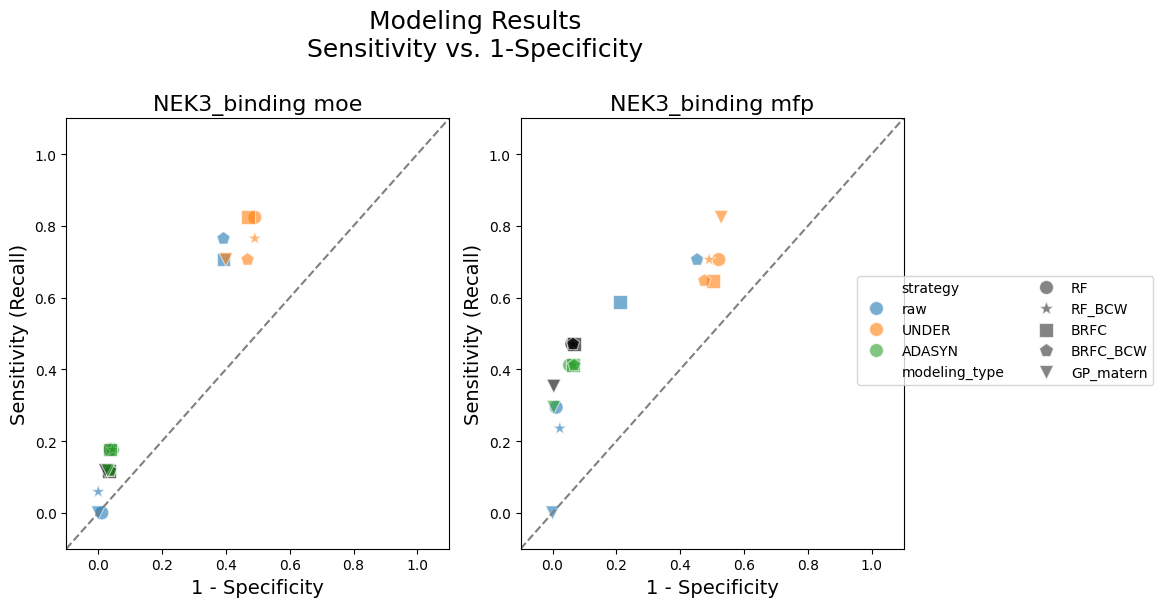

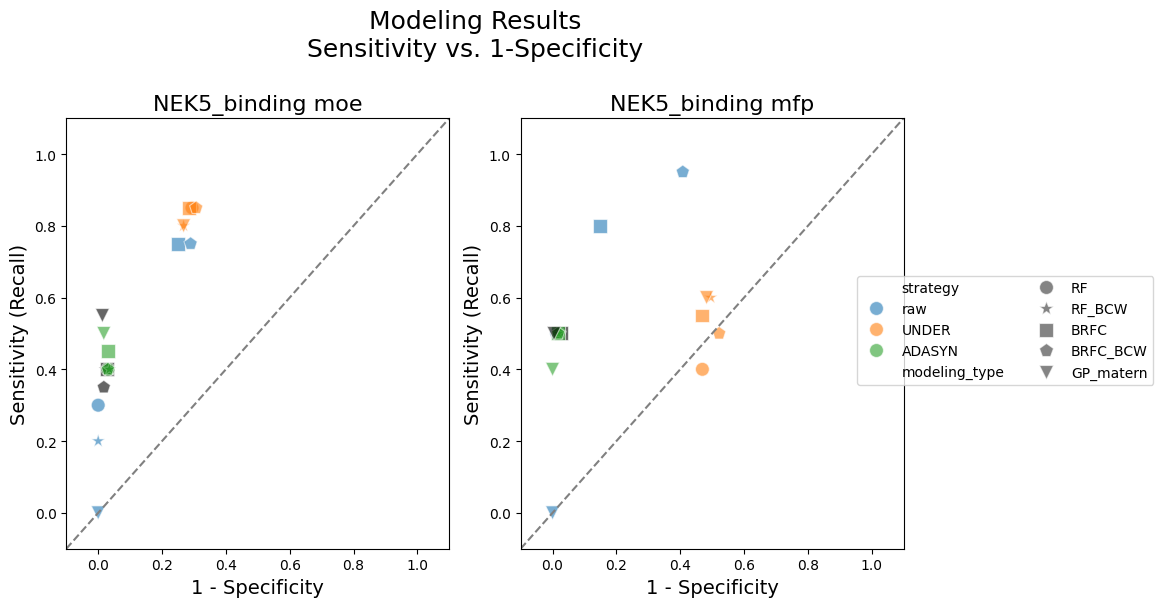

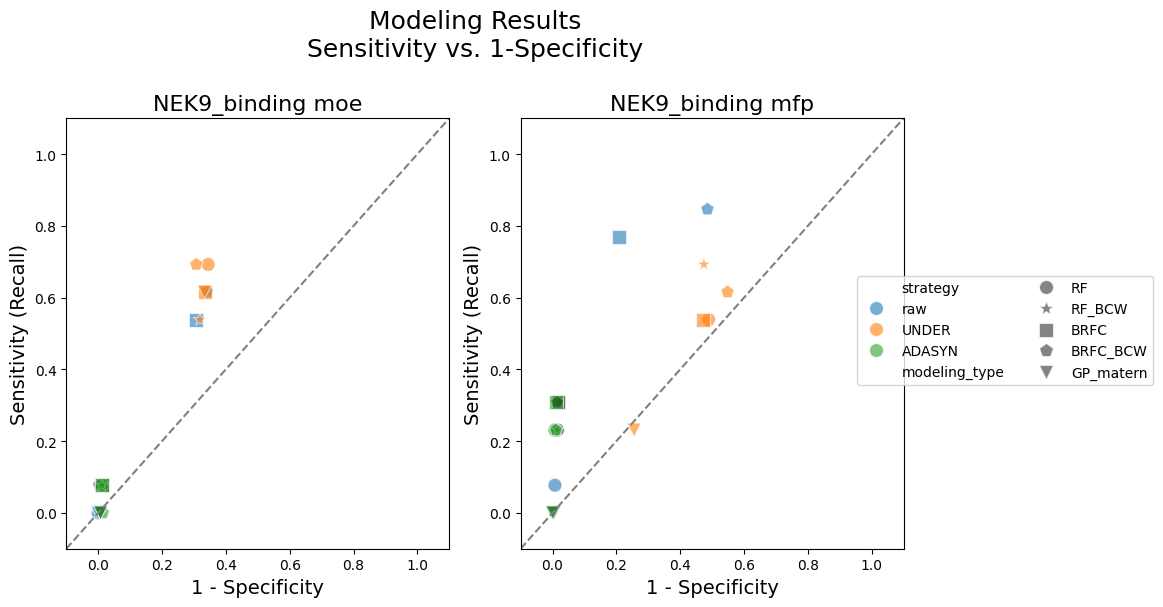

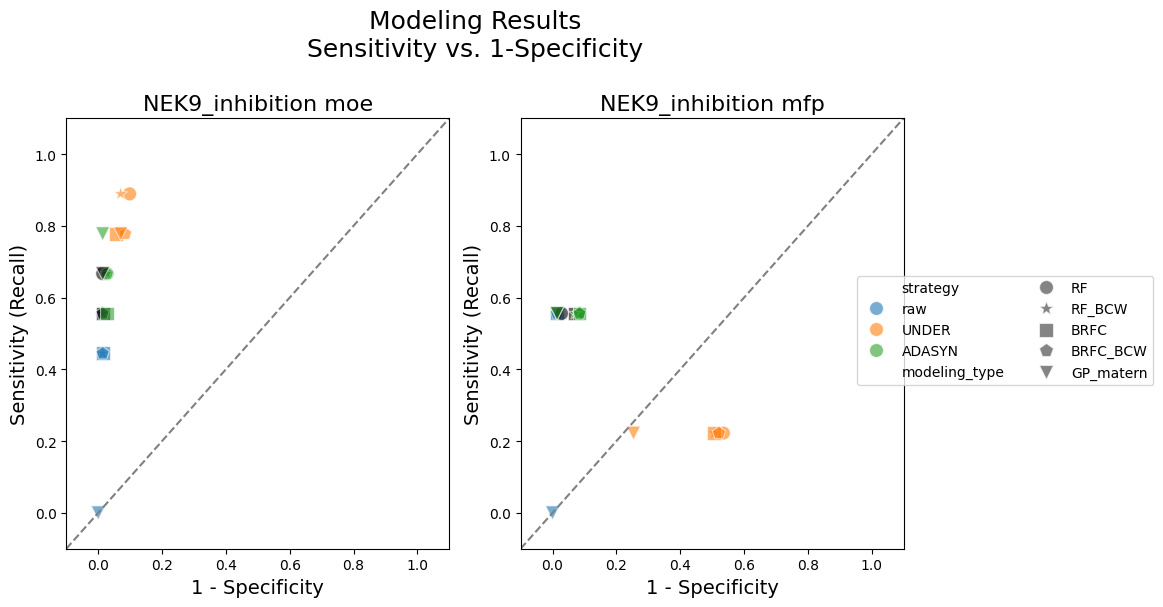

In [887]:
rfdf = df2.copy()
rfdf['modeling_type'] =rfdf['RF_type']
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/subplots_moemfp/'
gp_rbf= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp_rbf = gp_rbf.replace('scaled','raw')
gp_rbf = gp_rbf.replace('GP','GP_RBF')
gp_matern= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
# gp = pd.concat([gp_rbf, gp_matern])
# JUST GP MATERN 
gp = gp_matern
gp['1-specificity'] = 1-gp['specificity']

combo = pd.concat([rfdf, gp])
combo['1-specificity'] = 1-combo['specificity']
markers2 = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p', 'GP_RBF': 'X', 'GP_matern':'v'}

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = combo[(combo['NEK'] == nek) & (combo['feat_type'] == 'moe')]
    
    mfp_df = combo[(combo['NEK'] == nek) & (combo['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=markers2, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=markers2, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    plt.suptitle('Modeling Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    

    axs[1].legend(ncols=2, bbox_to_anchor=(1.67, 0.65))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}GPRF_{nek}_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();

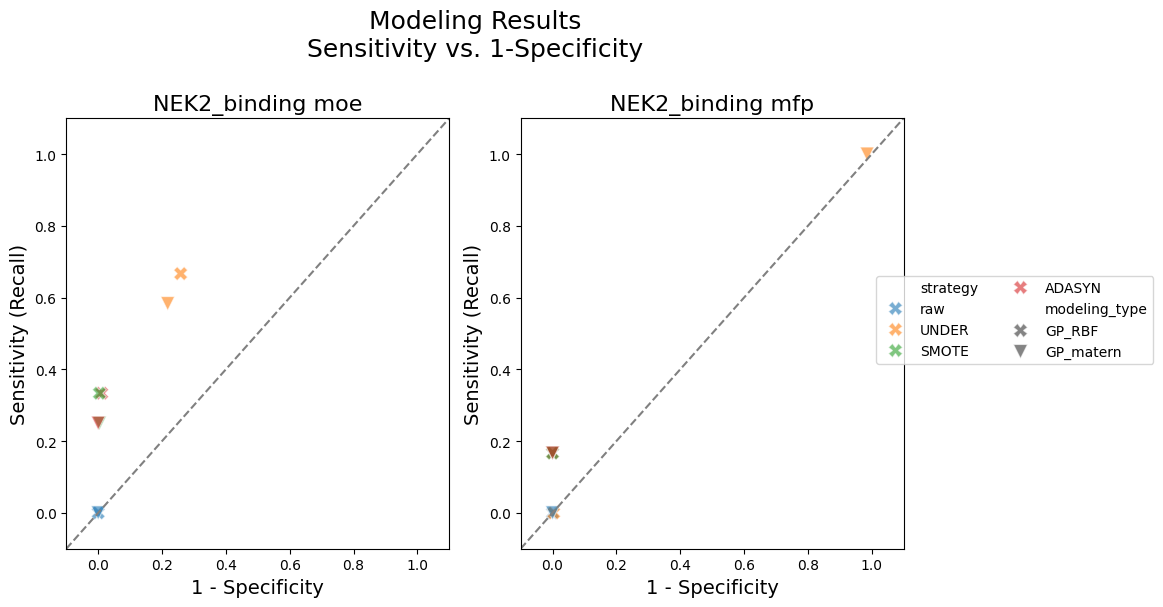

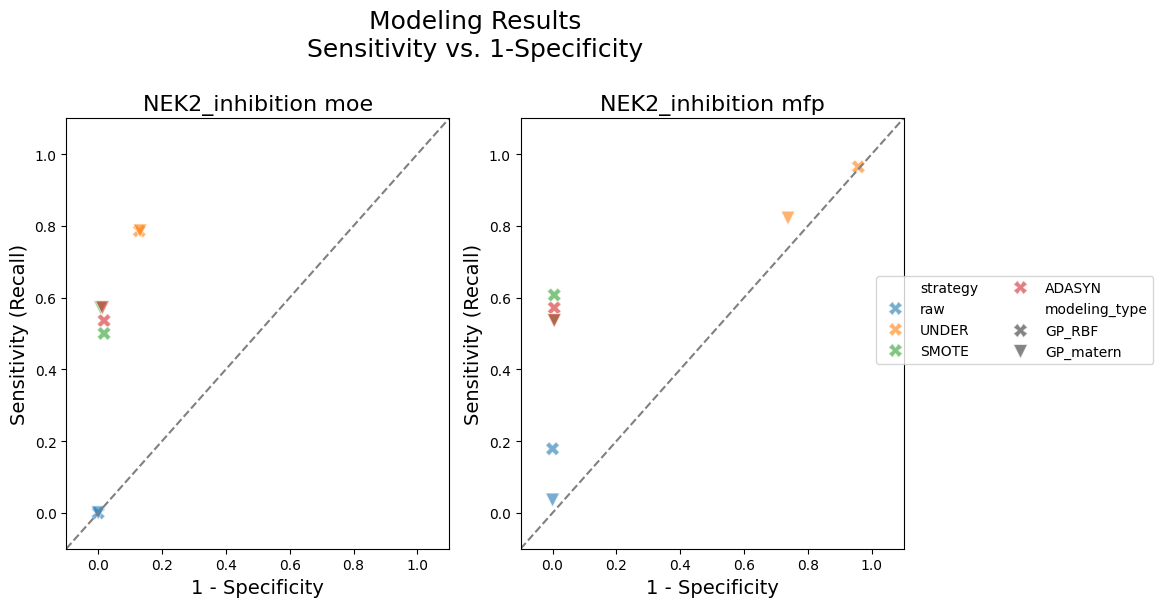

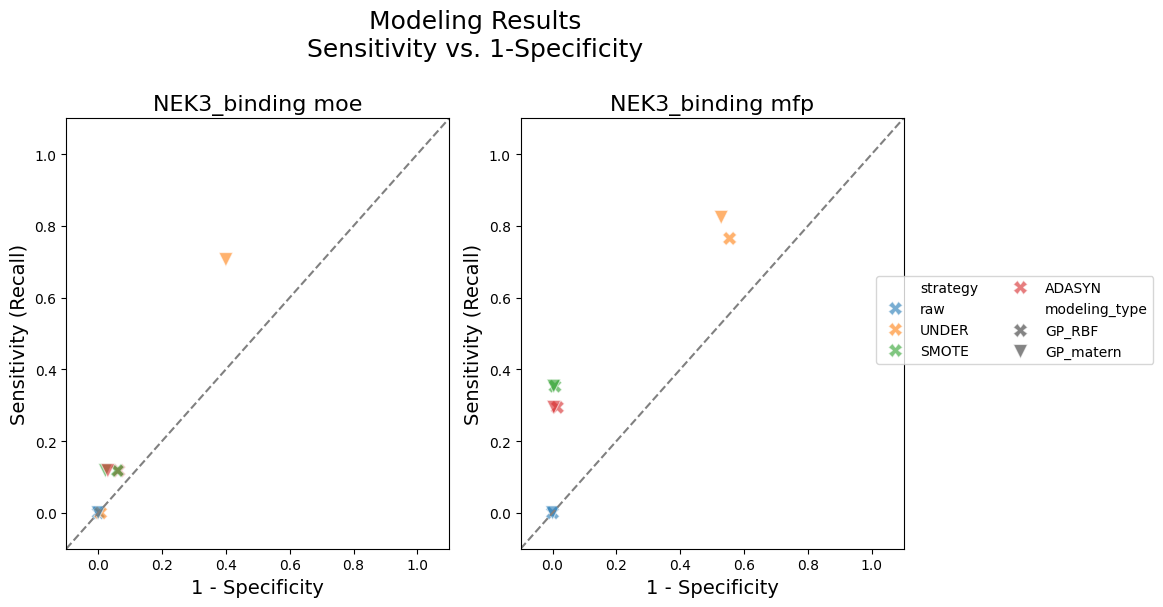

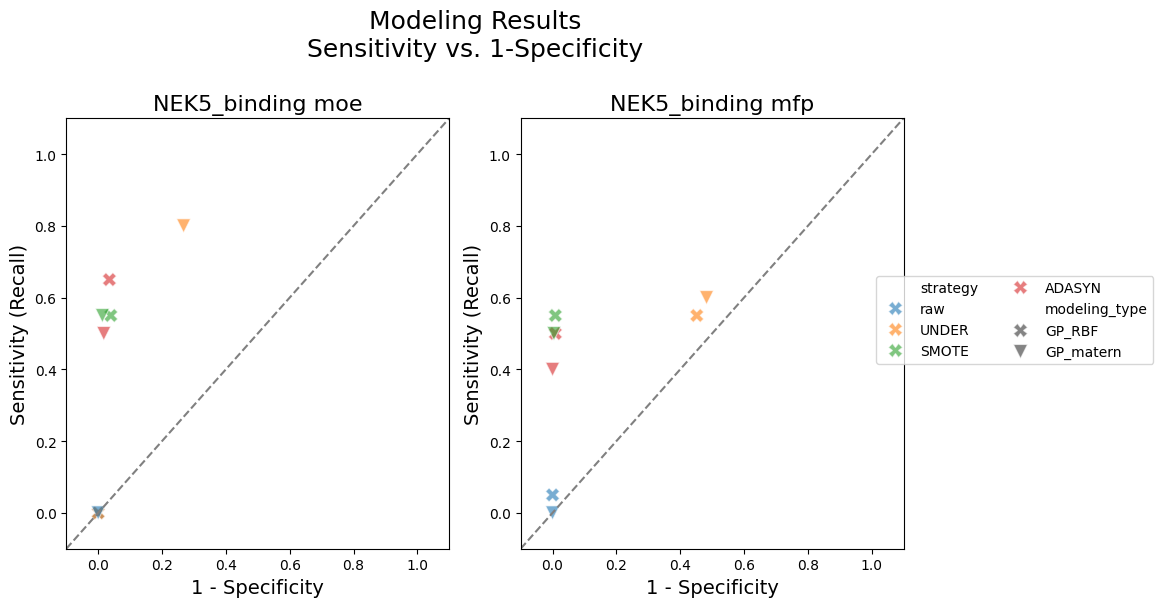

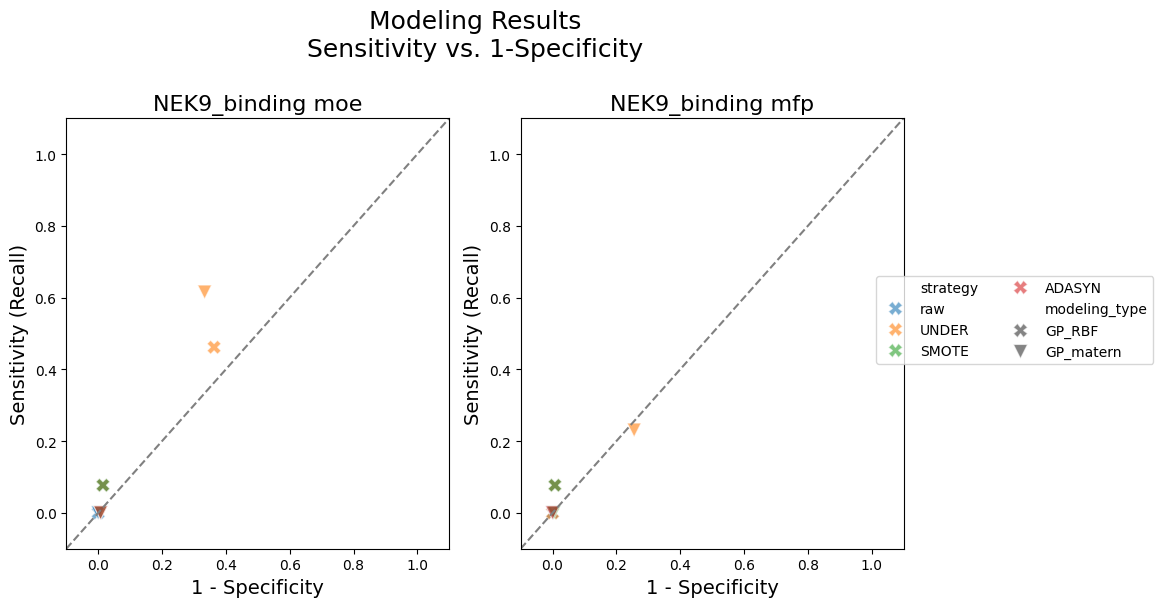

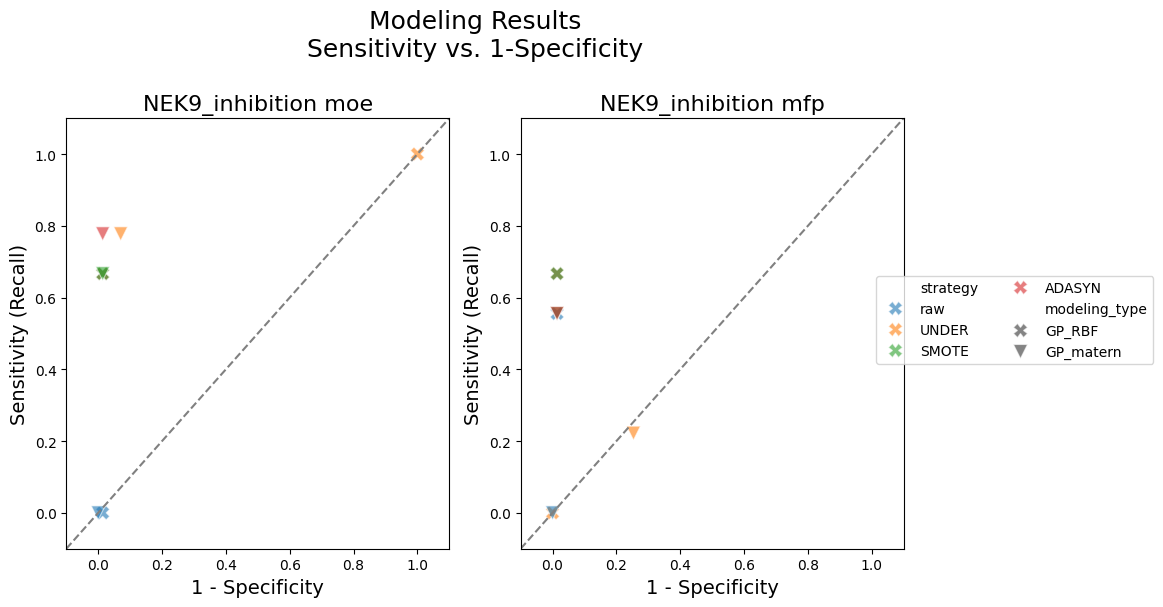

In [181]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp_rbf= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp_rbf = gp_rbf.replace('scaled','raw')
gp_rbf = gp_rbf.replace('GP','GP_RBF')
gp_matern= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
gp = pd.concat([gp_rbf, gp_matern])
gp['1-specificity'] = 1-gp['specificity']

# x axis is recall, y = 1-specificity 
gp_markers = {'GP_RBF': 'X', 'GP_matern': 'v'}

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = gp[(gp['NEK'] == nek) & (gp['feat_type'] == 'moe')]
    mfp_df = gp[(gp['NEK'] == nek) & (gp['feat_type'] == 'mfp')]
    
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=gp_markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=gp_markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle('Modeling Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    
    axs[1].legend(ncols=2, bbox_to_anchor=(1.67, 0.65))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}GP_RBF_Matern/GP_RBF_Matern_{nek}_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();

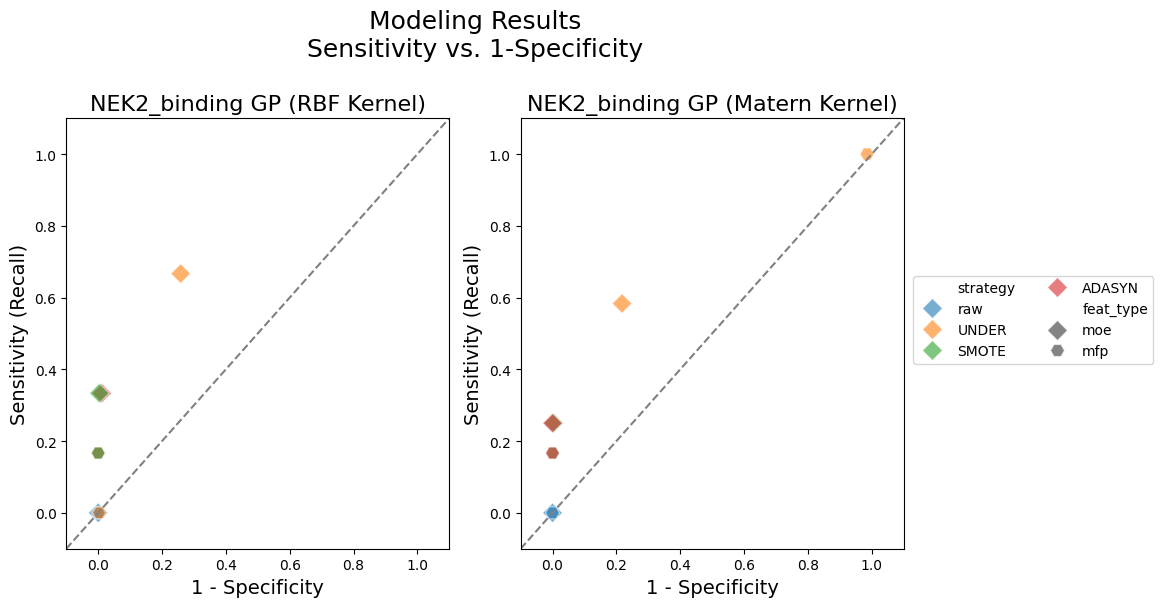

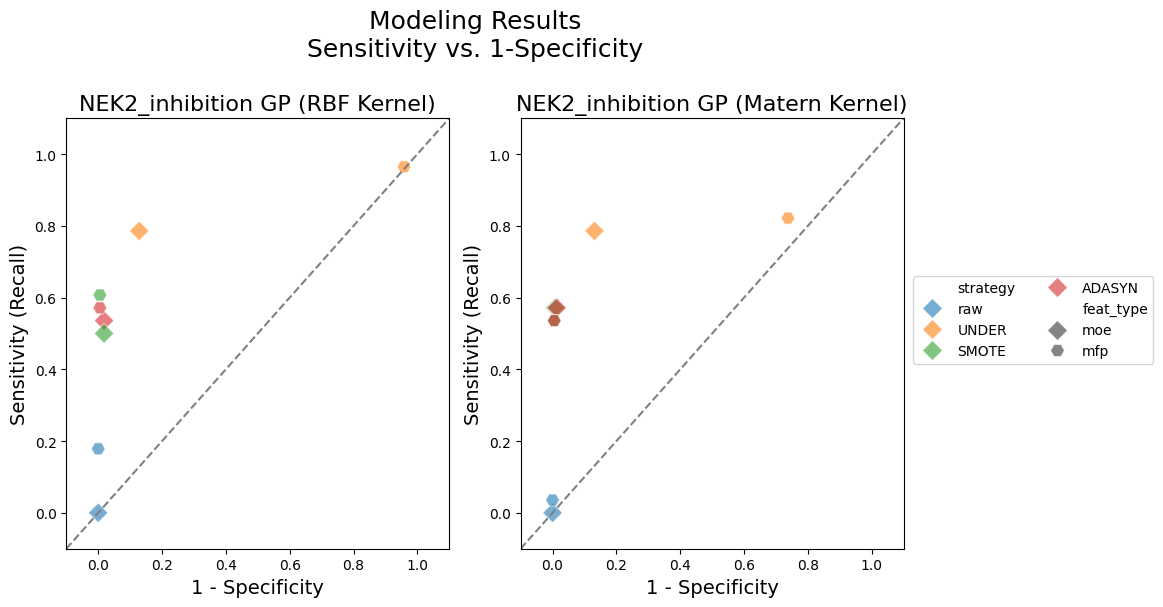

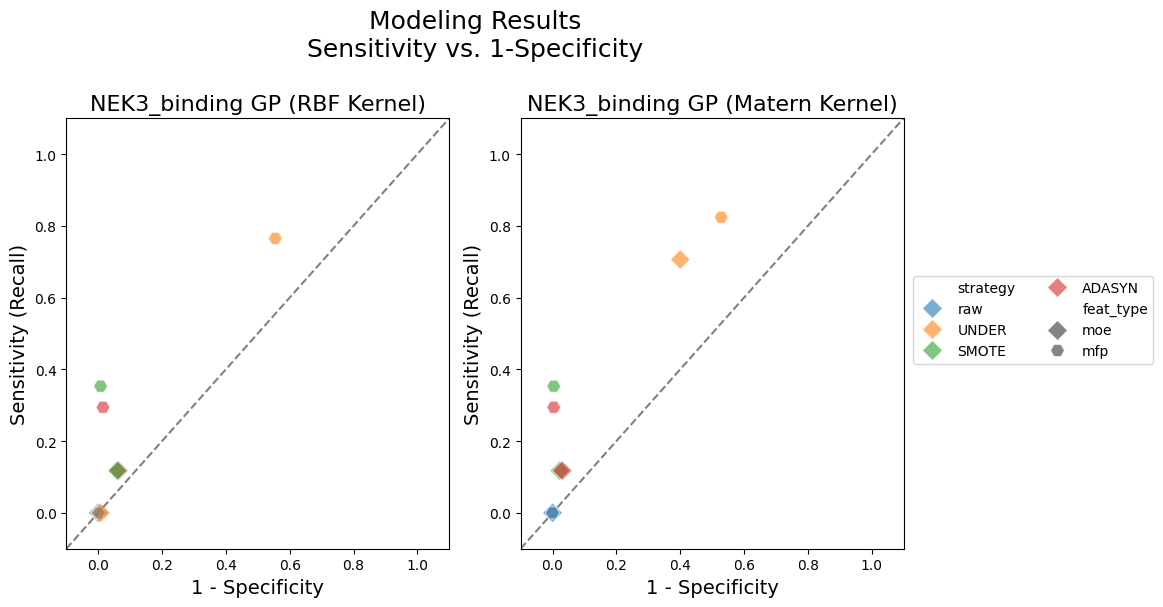

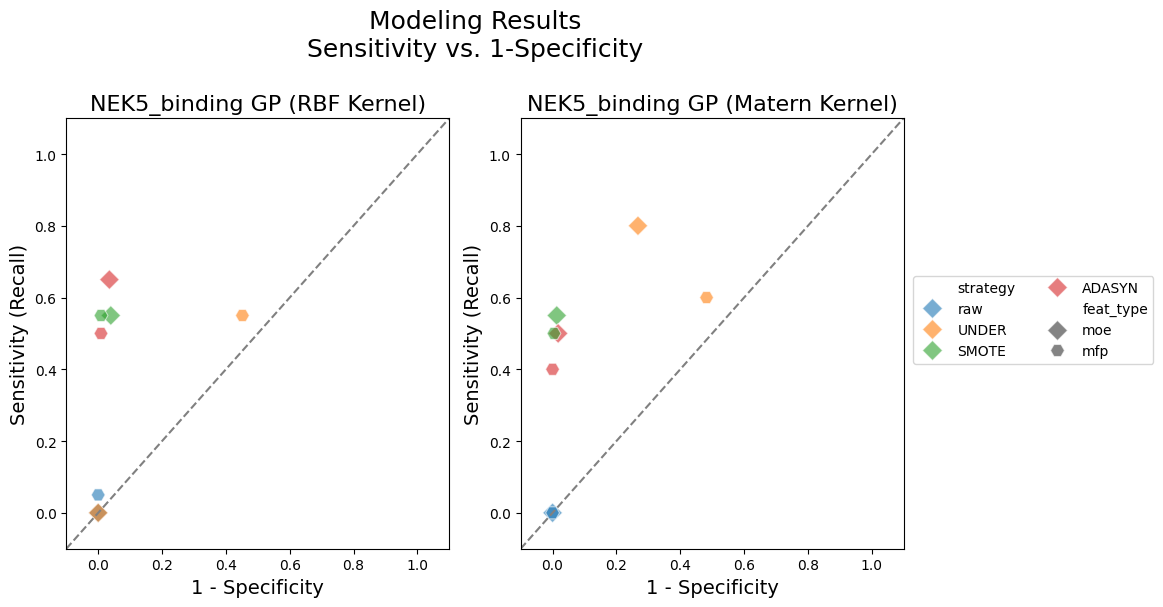

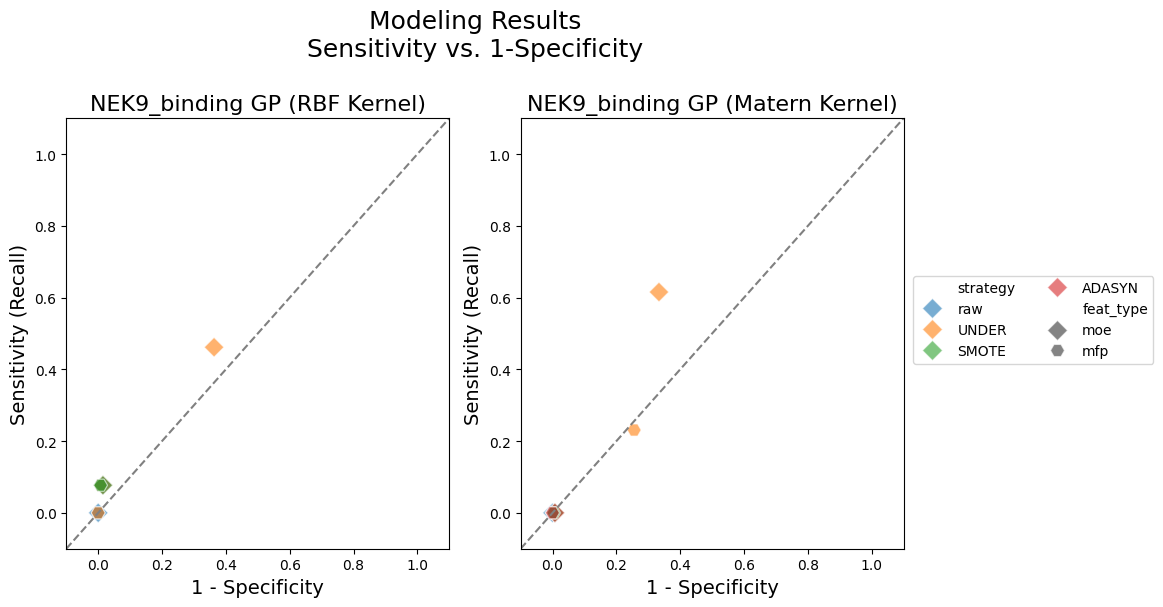

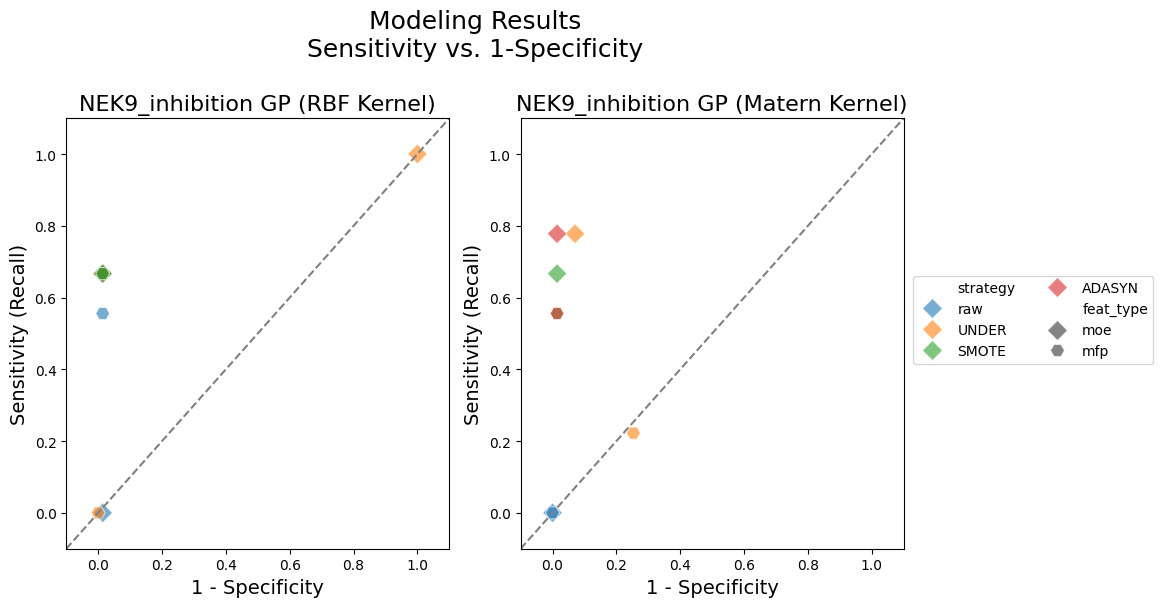

In [182]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp_rbf= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp_rbf = gp_rbf.replace('scaled','raw')
gp_rbf = gp_rbf.replace('GP','GP_RBF')
gp_matern= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
gp = pd.concat([gp_rbf, gp_matern])
gp['1-specificity'] = 1-gp['specificity']

feat_markers = {'moe': 'D', 'mfp': 'H'}

for nek in neks:
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    rbf_df = gp[(gp['NEK'] == nek) & (gp['modeling_type'] == 'GP_RBF')]
    mat_df = gp[(gp['NEK'] == nek) & (gp['modeling_type'] == 'GP_matern')]
    
    sns.scatterplot(data=rbf_df, x='1-specificity', y='recall', hue='strategy', style='feat_type',
                    markers=feat_markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[0])
    sns.scatterplot(data=mat_df,x='1-specificity', y='recall', hue='strategy', style='feat_type',
                    markers=feat_markers, s=100, hue_order=hue_order, alpha=0.6, ax=axs[1])
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle('Modeling Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)
    axs[0].set_title(f'{nek} GP (RBF Kernel)', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} GP (Matern Kernel)', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    
    axs[1].legend(ncols=2, bbox_to_anchor=(1.67, 0.65))
    plt.tight_layout()
    
    # plt.savefig(f'{figure_path}subplots_moemfp/GPRF_{nek}_moemfp_positive_rate_scatter.png', bbox_inches='tight')


plt.show();

In [324]:
ratio_df = pd.read_excel('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/dataset_creation/NEK_condensed_sizes.xlsx')
nek_ratios = {}
raw_dfs = ratio_df[ratio_df['strategy']=='raw']
for k, val in enumerate(raw_dfs['NEK']): 
    nek_ratios[val] =list(raw_dfs['active%_test'])[k]
for k, val in nek_ratios.items(): 
    this_val = f"{val:.2f}"
    new_val = k+' ('+this_val+'%)'
    nek_ratios[k] = new_val


/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:19: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,


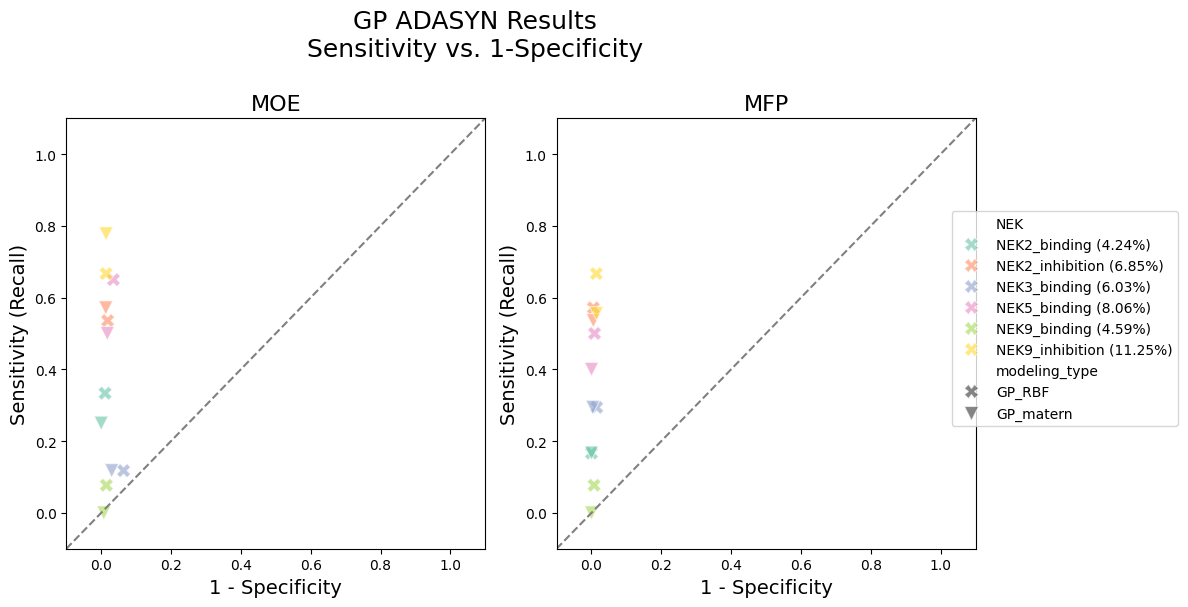

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:19: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,


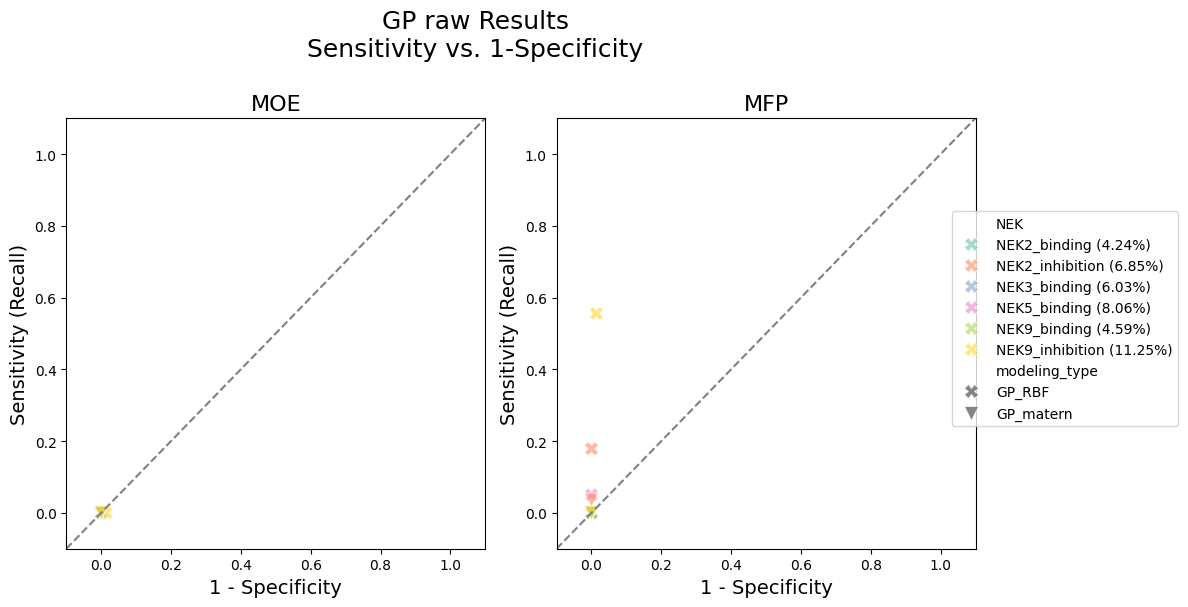

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:19: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,


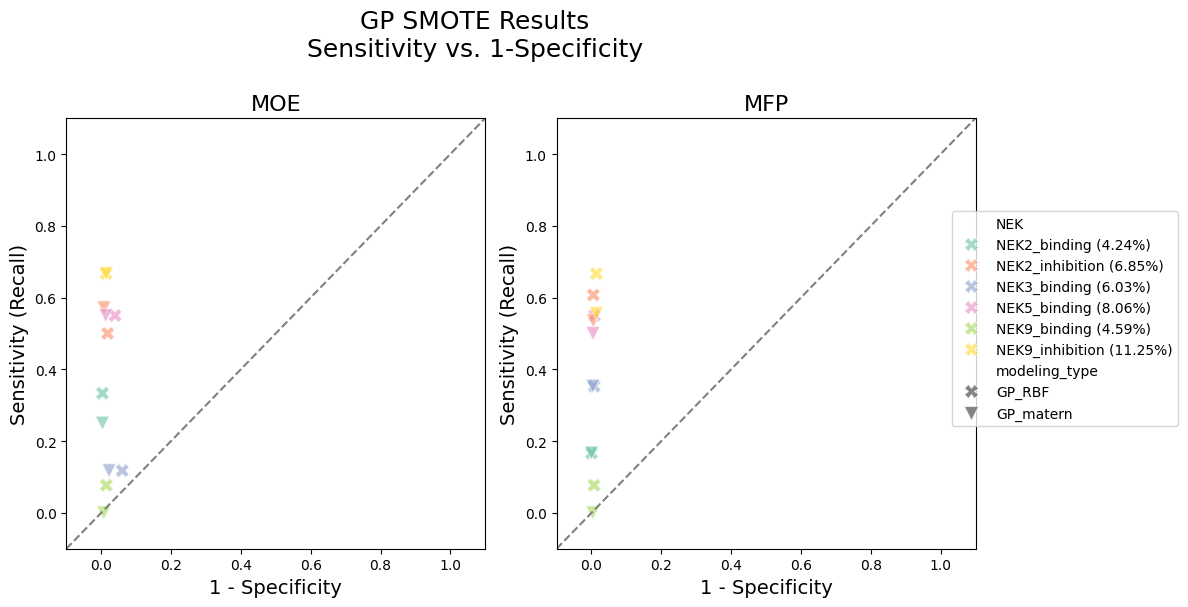

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/335718050.py:19: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,


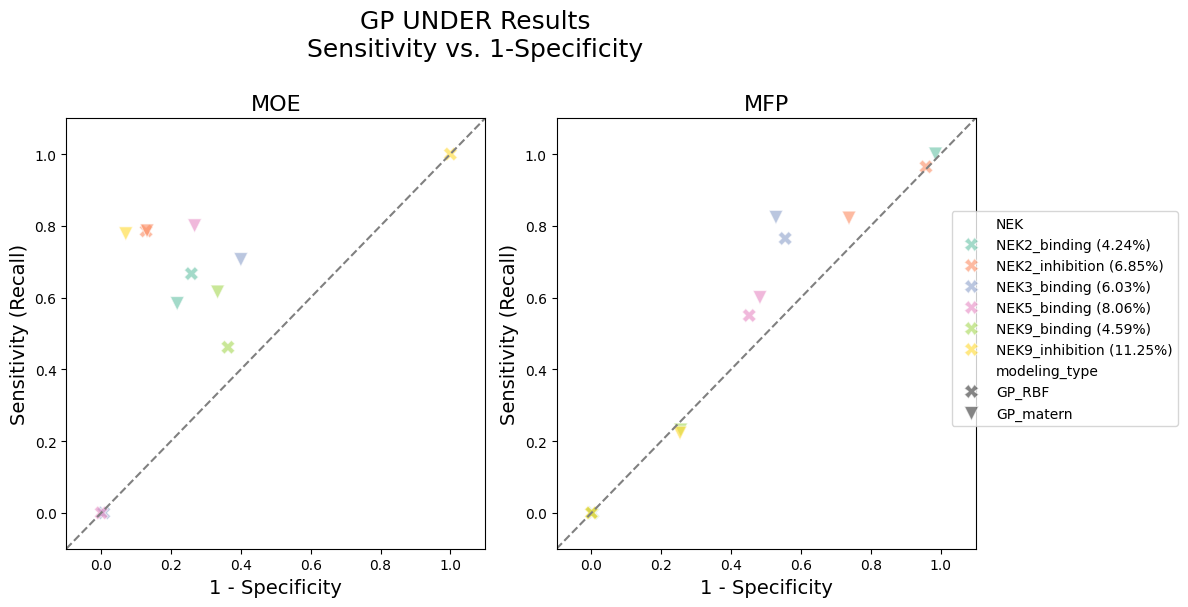

In [320]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp_rbf= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP')]
gp_rbf = gp_rbf.replace('scaled','raw')
gp_rbf = gp_rbf.replace('GP','GP_RBF')
gp_matern= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
gp = pd.concat([gp_rbf, gp_matern])
gp['1-specificity'] = 1-gp['specificity']
gp['NEK'] = gp['NEK'].replace(nek_ratios)
strategy_markers = {'moe': 'D', 'mfp': 'H'}
gp_markers = {'GP_RBF': 'X', 'GP_matern': 'v'}
for samp in gp['strategy'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    this_samp = gp[gp['strategy']==samp] 
    moe_df = this_samp[this_samp['feat_type'] == 'moe']
    mfp_df = this_samp[this_samp['feat_type'] == 'mfp']
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
                   alpha=0.6, palette=sns.color_palette("Set2"),ax=axs[0],s=100)
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='modeling_type', markers=gp_markers,
                   alpha=0.6, palette=sns.color_palette("Set2"),ax=axs[1],s=100)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle(f'GP {samp} Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)

  
    plt.legend(bbox_to_anchor = [1.05, 0.5])
    axs[0].set_title(f'MOE', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'MFP', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    axs[1].legend(ncols=1, bbox_to_anchor=(1.5, 0.8))
    plt.tight_layout()
    plt.savefig(f'{figure_path}all_NEK/GP/{samp}_GP_rbf_matern_positive_rate_scatter.png', bbox_inches='tight')
    
    plt.show();

# plt.show();

In [346]:
rfdf = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
rfdf = rfdf[rfdf['set'] == 'original']
rfdf = rfdf[rfdf['modeling_type'] == 'RF']
rfdf['NEK'] = rfdf['NEK'].replace(nek_ratios)
rfdf['1-specificity'] = 1-rfdf['specificity']

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_samp['NEK'] = this_samp['NEK'].replace(nek_ratios)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:7: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,


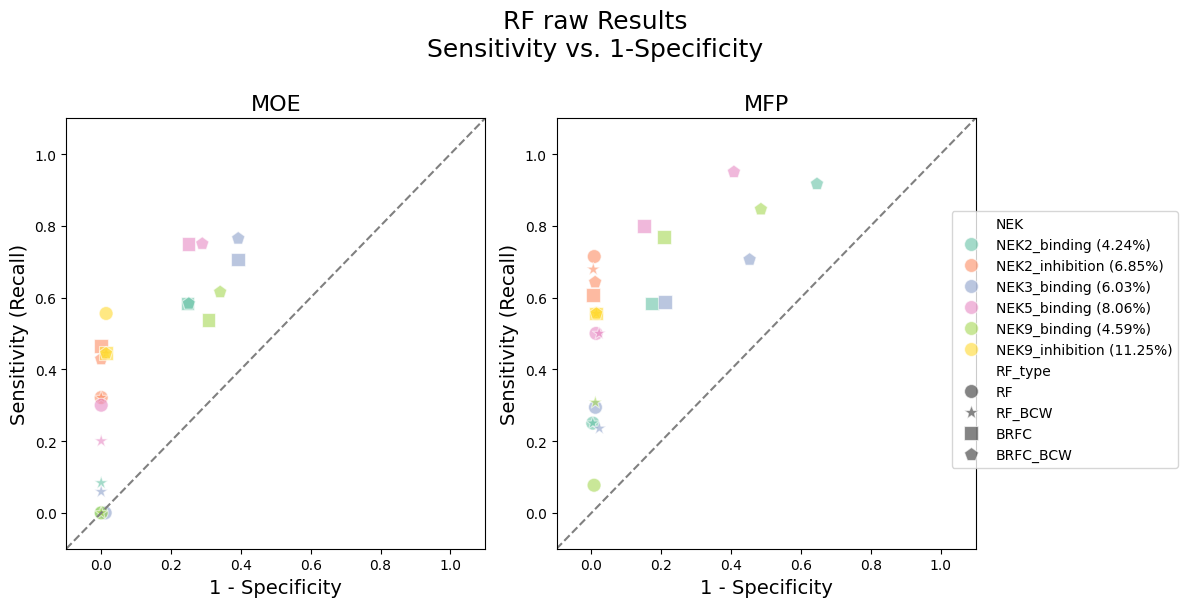

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_samp['NEK'] = this_samp['NEK'].replace(nek_ratios)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:7: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,


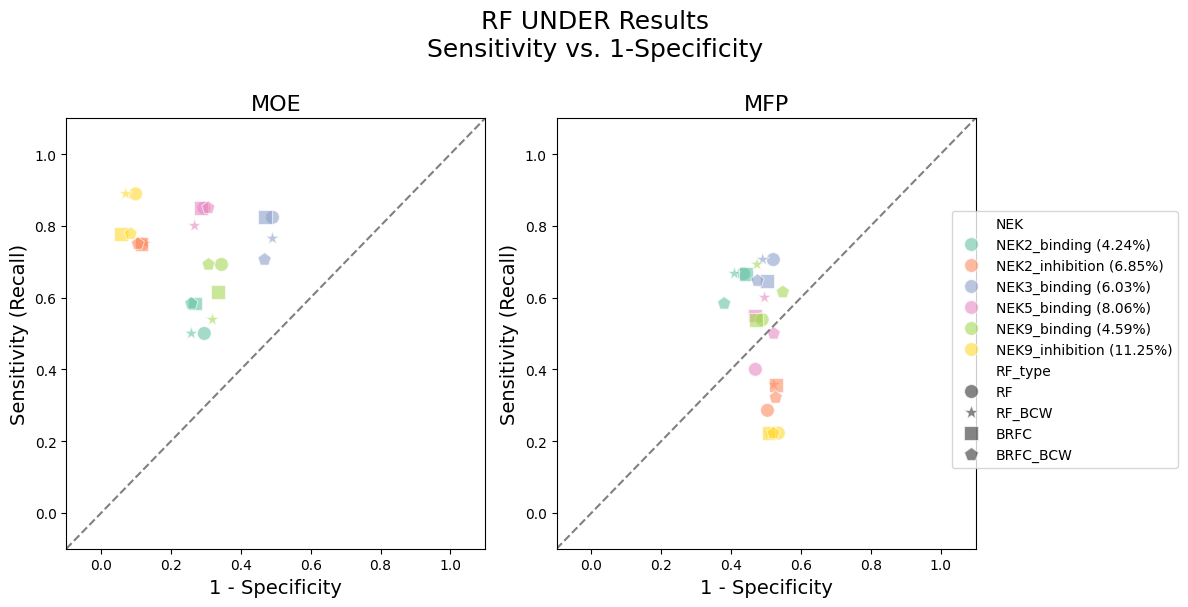

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_samp['NEK'] = this_samp['NEK'].replace(nek_ratios)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:7: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,


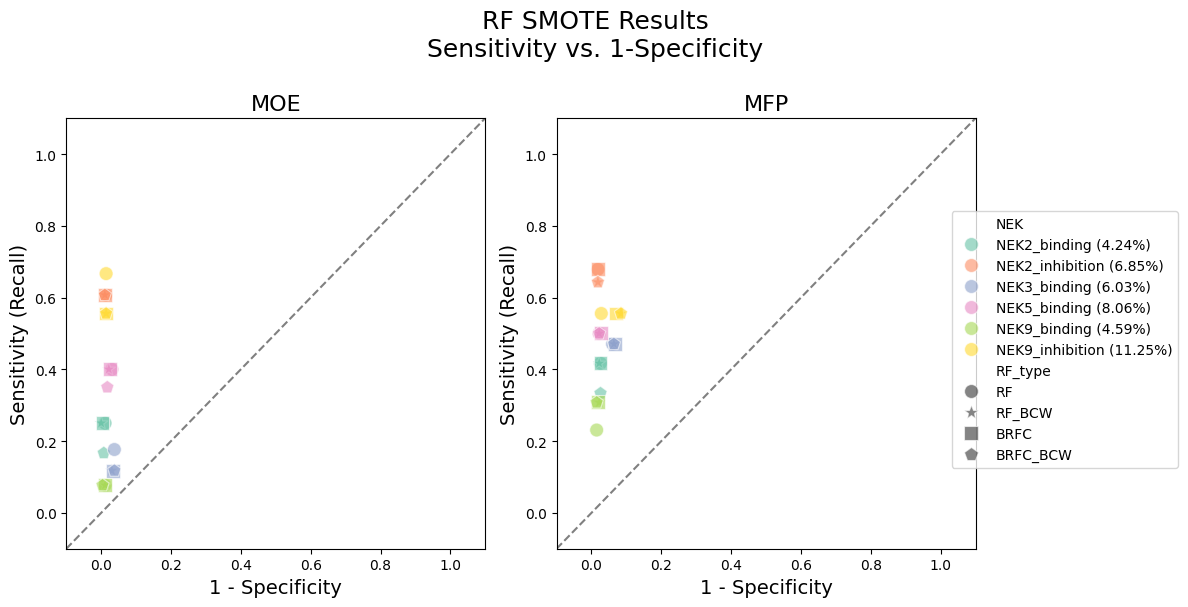

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_samp['NEK'] = this_samp['NEK'].replace(nek_ratios)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:7: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/3431001923.py:9: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,


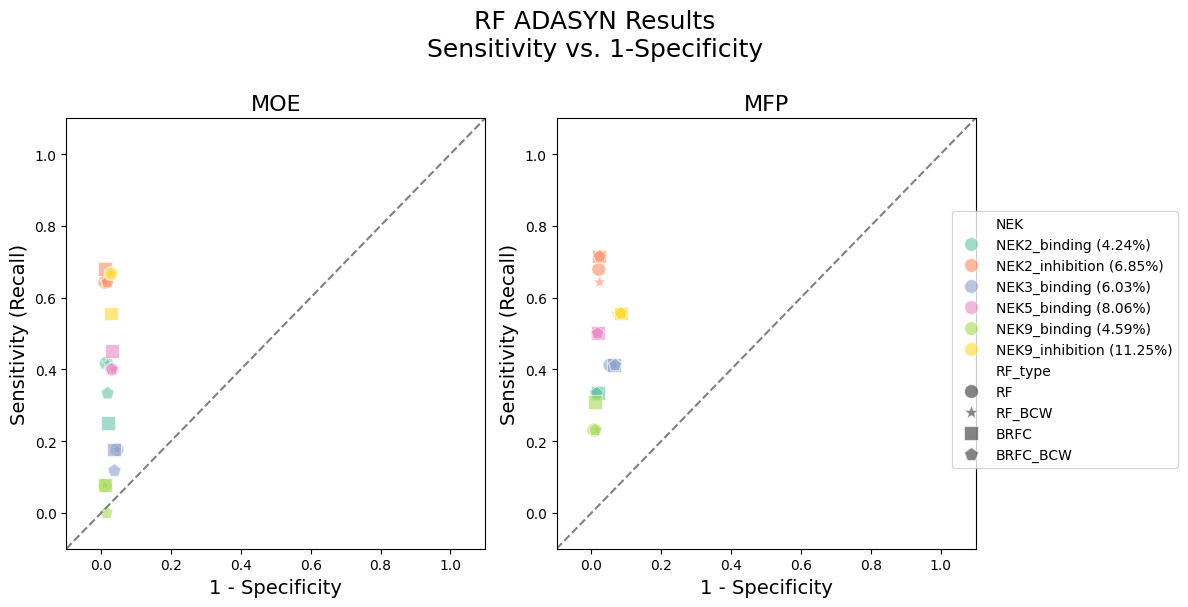

In [349]:


for samp in rfdf['strategy'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    this_samp = rfdf[rfdf['strategy']==samp] 
    this_samp['NEK'] = this_samp['NEK'].replace(nek_ratios)
    moe_df = this_samp[this_samp['feat_type'] == 'moe']
    mfp_df = this_samp[this_samp['feat_type'] == 'mfp']
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
                   alpha=0.6, palette=sns.color_palette("Set2"),ax=axs[0],s=100)
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='RF_type', markers=markers,
                   alpha=0.6, palette=sns.color_palette("Set2"),ax=axs[1],s=100)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle(f'RF {samp} Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.5, y =1.005)
  
    plt.legend(bbox_to_anchor = [1.15, 0.5])
    axs[0].set_title(f'MOE', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'MFP', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    axs[1].legend(ncols=1, bbox_to_anchor=(1.5, 0.8))
    plt.tight_layout()
    plt.savefig(f'{figure_path}all_NEK/RF/{samp}_positive_rate_scatter.png', bbox_inches='tight')
    
    plt.show();

# plt.show();

# pairing down models/datasetes

In [551]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/best_models/sensitivity_1_specificity/'
gp= df[(df['set'] == 'original') & (df['modeling_type'] == 'GP_matern')]
gp = gp[gp['strategy'] != 'SMOTE']
rf = df[(df['set'] == 'original') & (df['modeling_type'] == 'RF')]
rf_raw = rf[(rf['strategy'] == 'raw') & (rf['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
# rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'SMOTE', 'ADASYN']))]  
rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'ADASYN']))]  
rf_filtered = pd.concat([rf_raw, rf_other])

rf_filtered['modeling_type'] = rf['RF_type']
rf_gp = pd.concat([rf_filtered, gp])
rf_gp['1-specificity'] = 1-rf_gp['specificity']
rf_gp['modeling_type']

104           RF
105       RF_BCW
106         BRFC
107     BRFC_BCW
120           RF
         ...    
977    GP_matern
979    GP_matern
980    GP_matern
981    GP_matern
983    GP_matern
Name: modeling_type, Length: 108, dtype: object

In [561]:
neks

array(['NEK2_binding (4.24%)', 'NEK2_inhibition (6.85%)',
       'NEK3_binding (6.03%)', 'NEK5_binding (8.06%)',
       'NEK9_binding (4.59%)', 'NEK9_inhibition (11.25%)'], dtype=object)

In [894]:
this_palette = {'raw': 'tab:blue', 'UNDER': 'tab:orange', 'ADASYN': 'tab:red'}

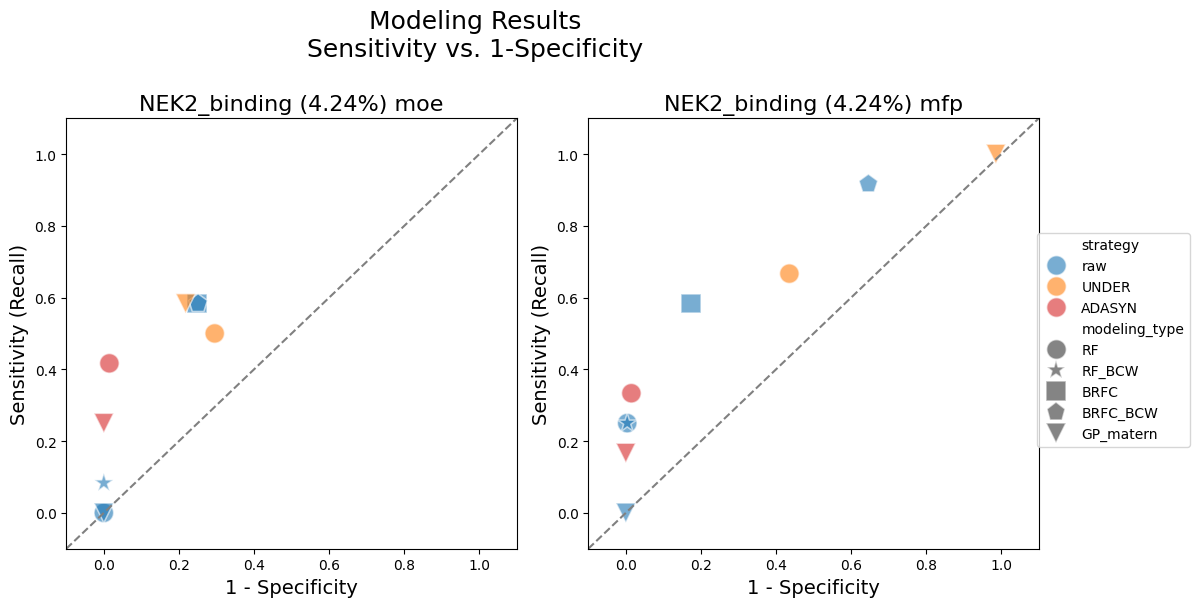

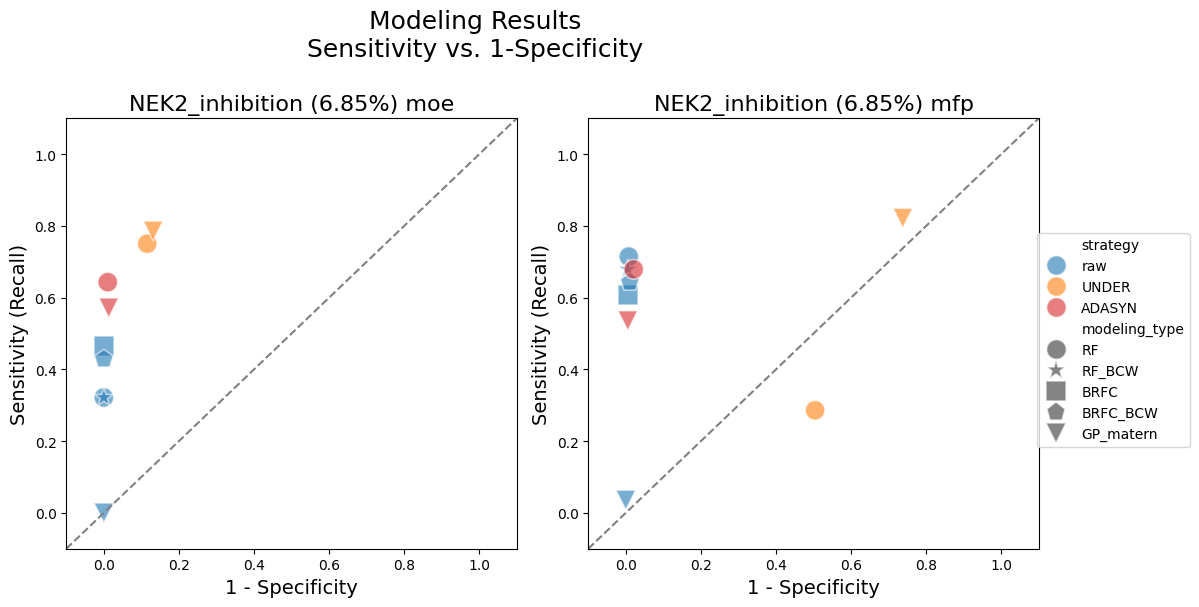

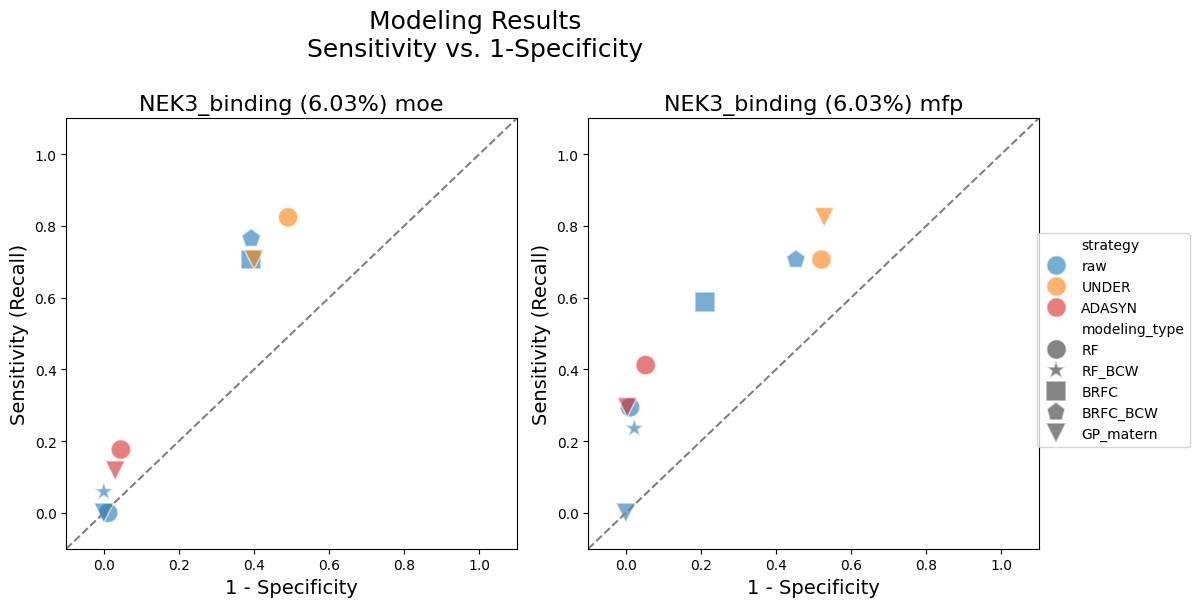

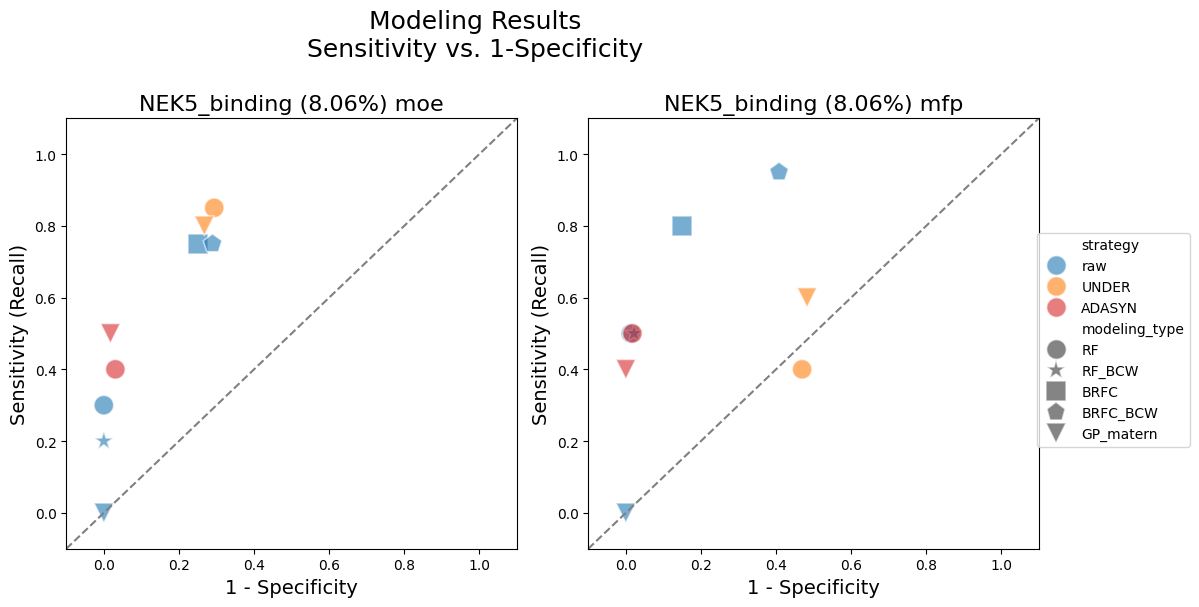

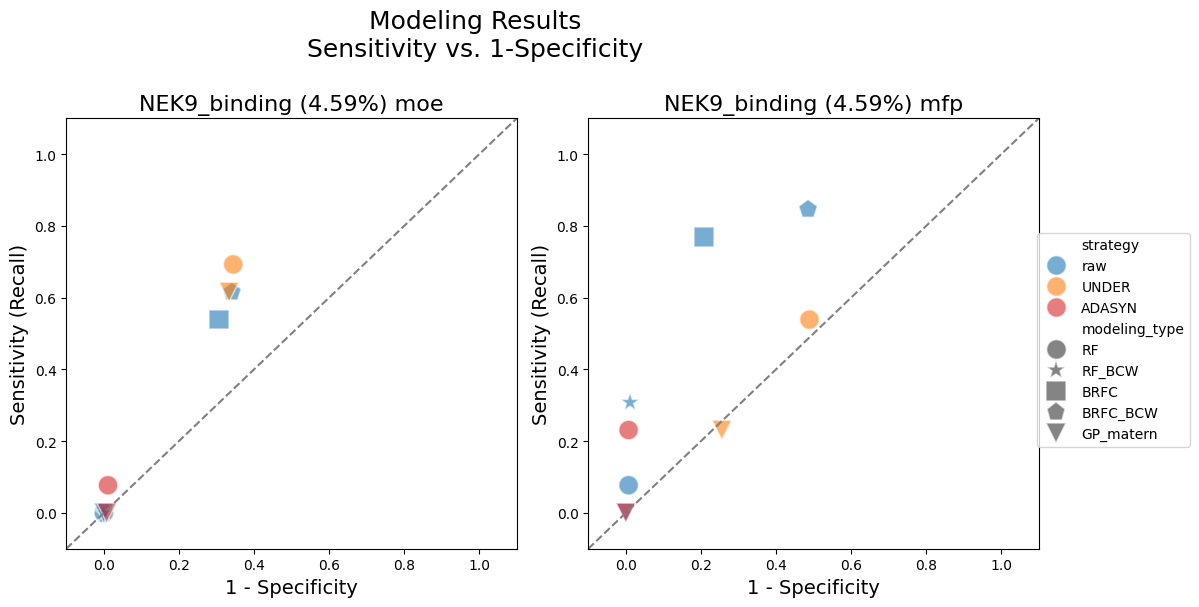

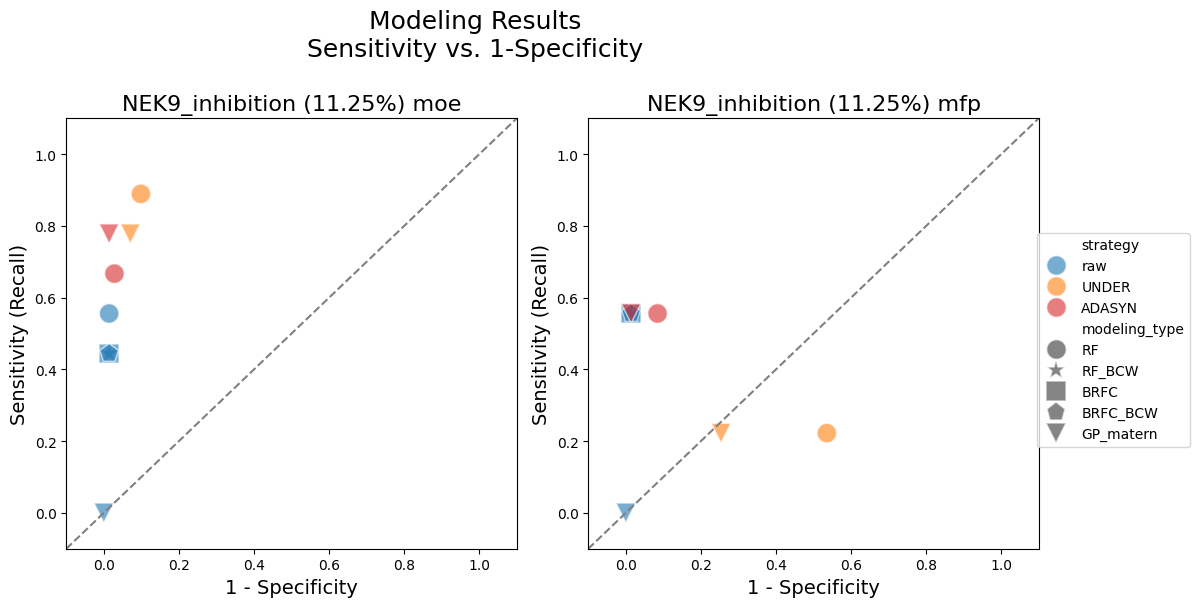

In [895]:
# markers2 = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p', 'GP_RBF': 'X', 'GP_matern':'v'}
markers3 = {'RF': 'o', 'RF_BCW': '*', 'BRFC':'s', 'BRFC_BCW': 'p', 'GP_matern':'v'}
# hue_order = ['raw', 'UNDER', 'SMOTE', 'ADASYN']
hue_order = ['raw', 'UNDER', 'ADASYN']
for nek in rf_gp['NEK'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    moe_df = rf_gp[(rf_gp['NEK'] == nek) & (rf_gp['feat_type'] == 'moe')]
    
    mfp_df = rf_gp[(rf_gp['NEK'] == nek) & (rf_gp['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=markers3, s=200, hue_order=hue_order, alpha=0.6, ax=axs[0], palette=this_palette)
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',
                    markers=markers3, s=200, hue_order=hue_order, alpha=0.6, ax=axs[1], palette=this_palette)
    plt.suptitle('Modeling Results\nSensitivity vs. 1-Specificity', fontsize=18, x=0.4, y =1.005)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    

    axs[1].legend(ncols=1, bbox_to_anchor=(1.35, 0.75))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}GPRF_{nek}_moemfp.png', bbox_inches='tight')


plt.show();

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2303264560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)


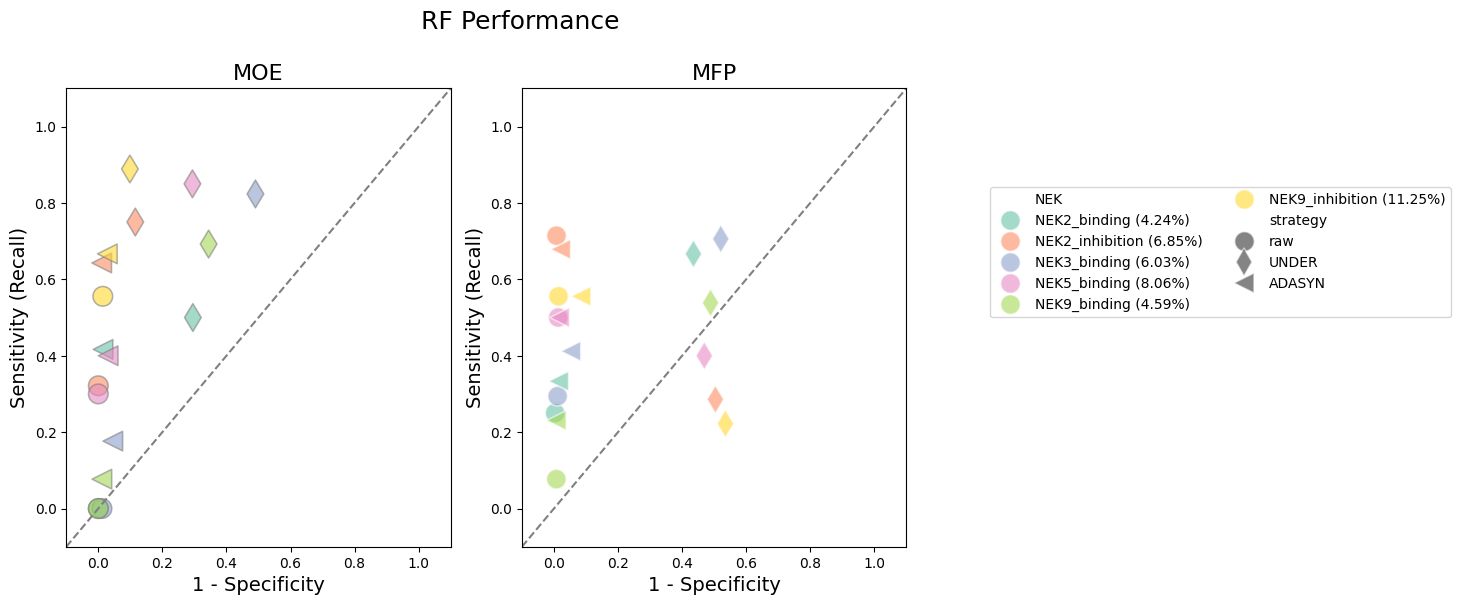

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2303264560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)


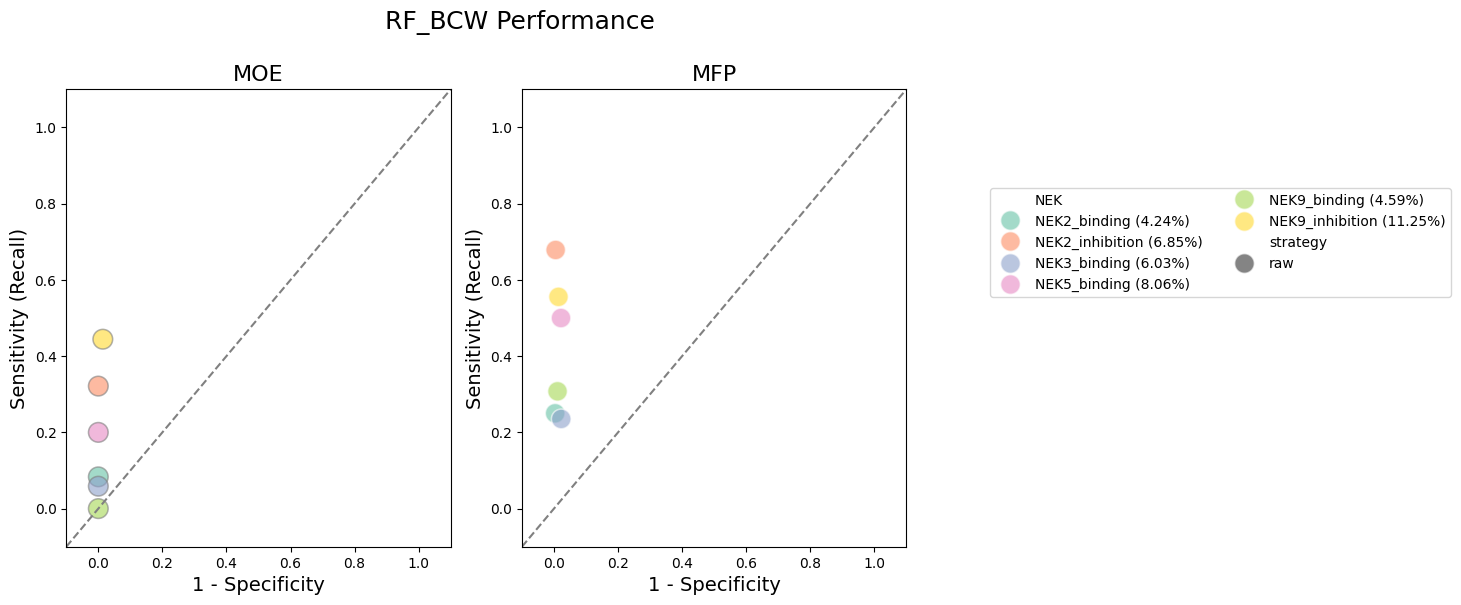

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2303264560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)


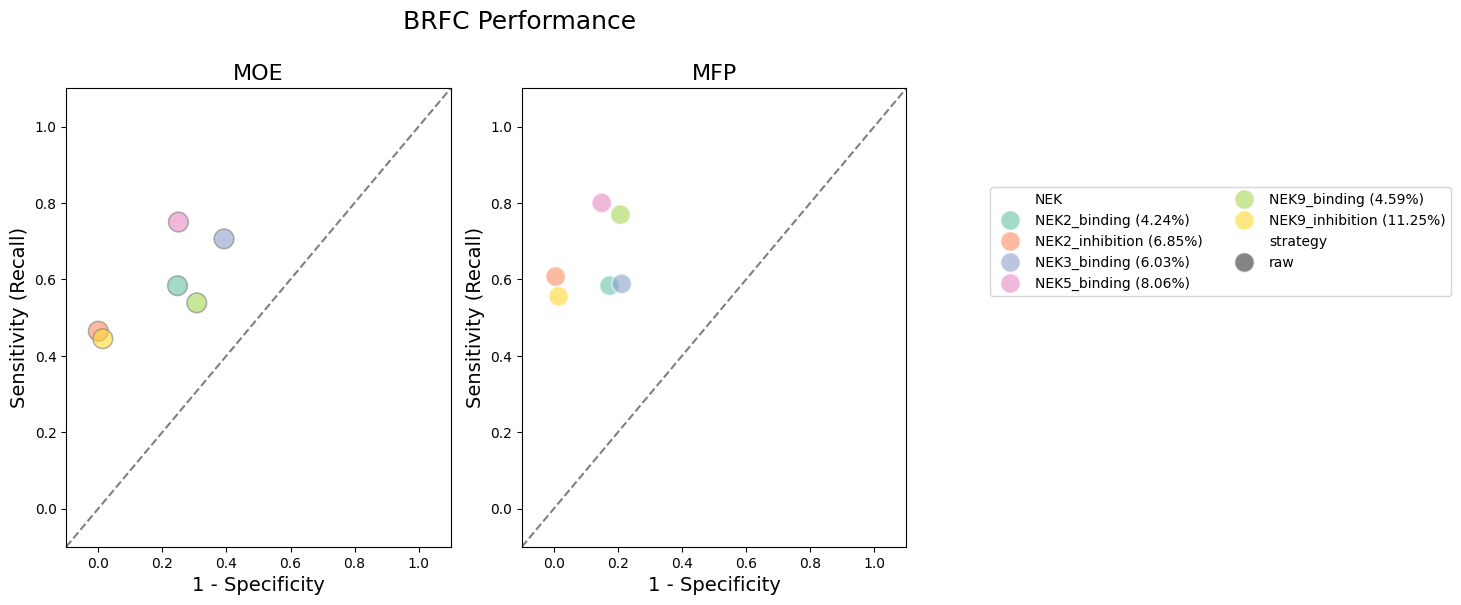

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2303264560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)


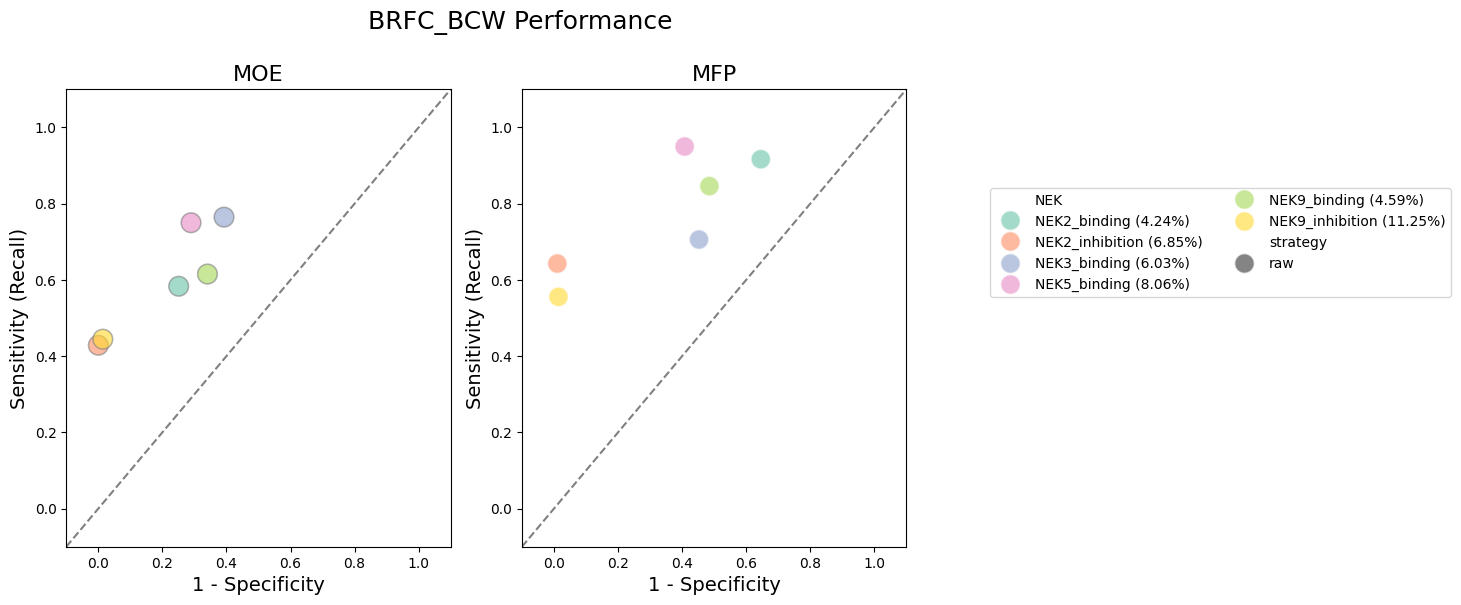

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2303264560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)


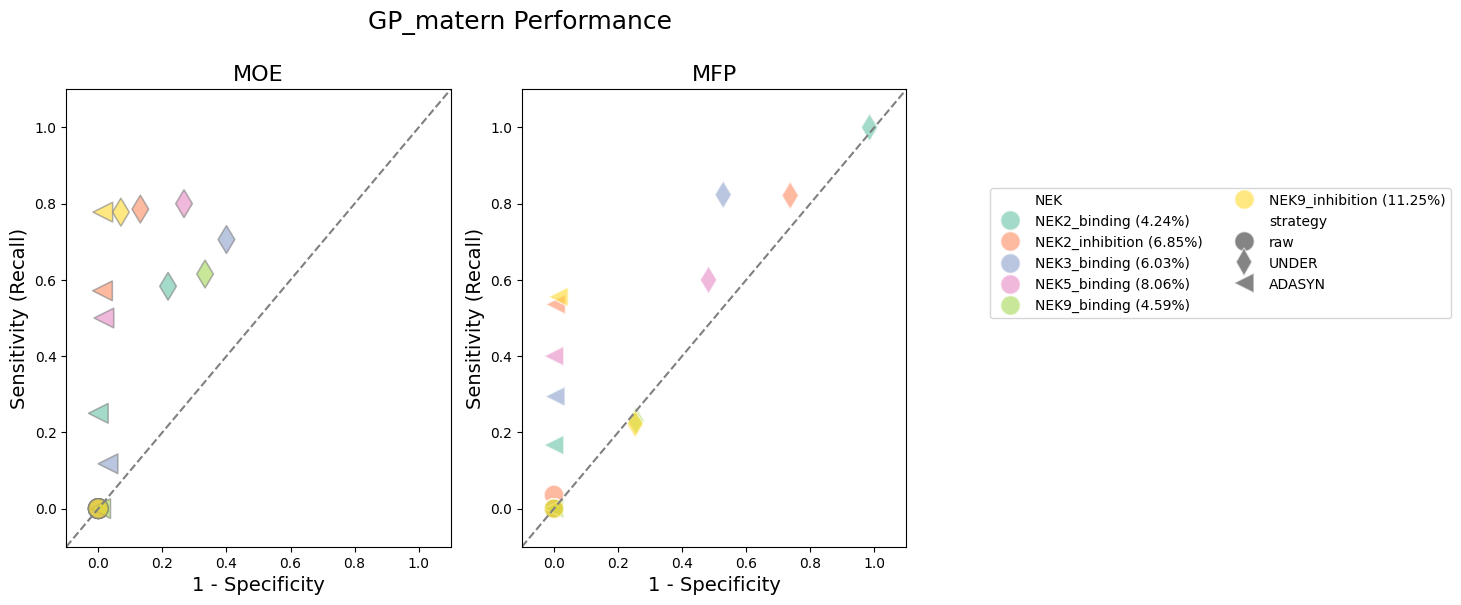

In [742]:
samp_markers = {'raw': 'o', 'UNDER': 'd', 'SMOTE': '>', 'ADASYN': '<'}
neks = rf_gp['NEK'].unique() 
shapes = ['*', 'd', 'v', '.', 'o', '^'] 
palette = sns.color_palette("Set2")
nek_colors = {'NEK2_binding (4.24%)':palette[0], 'NEK2_inhibition (6.85%)': palette[1],
       'NEK3_binding (6.03%)': palette[2], 'NEK5_binding (8.06%)': palette[3],
       'NEK9_binding (4.59%)': palette[4], 'NEK9_inhibition (11.25%)' : palette[5]}
for mod in rf_gp['modeling_type'].unique():
    fig, axs = plt.subplots(1,2, figsize=(15,6))
    this_mod = rf_gp[rf_gp['modeling_type']==mod] 
    this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)
    
    moe_df =this_mod[this_mod['feat_type'] == 'moe']
    mfp_df = this_mod[this_mod['feat_type'] == 'mfp']
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='strategy', markers=samp_markers,
                   alpha=0.6, palette=nek_colors,ax=axs[0],s=200,edgecolor='gray')
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='strategy', markers=samp_markers,
                   alpha=0.6, palette=nek_colors,ax=axs[1],s=200)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle(f'{mod} Performance', fontsize=18, x=0.35, y =1.0005)
  
    plt.legend(bbox_to_anchor = [.2, 0.5])
    axs[0].set_title(f'MOE', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'MFP', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    axs[1].legend(ncols=2, bbox_to_anchor=(1.2, 0.8))
    plt.tight_layout()
    
    plt.savefig(f'{figure_path}{mod}_nekcolors.png', bbox_inches='tight')
    
    plt.show();

# plt.show();

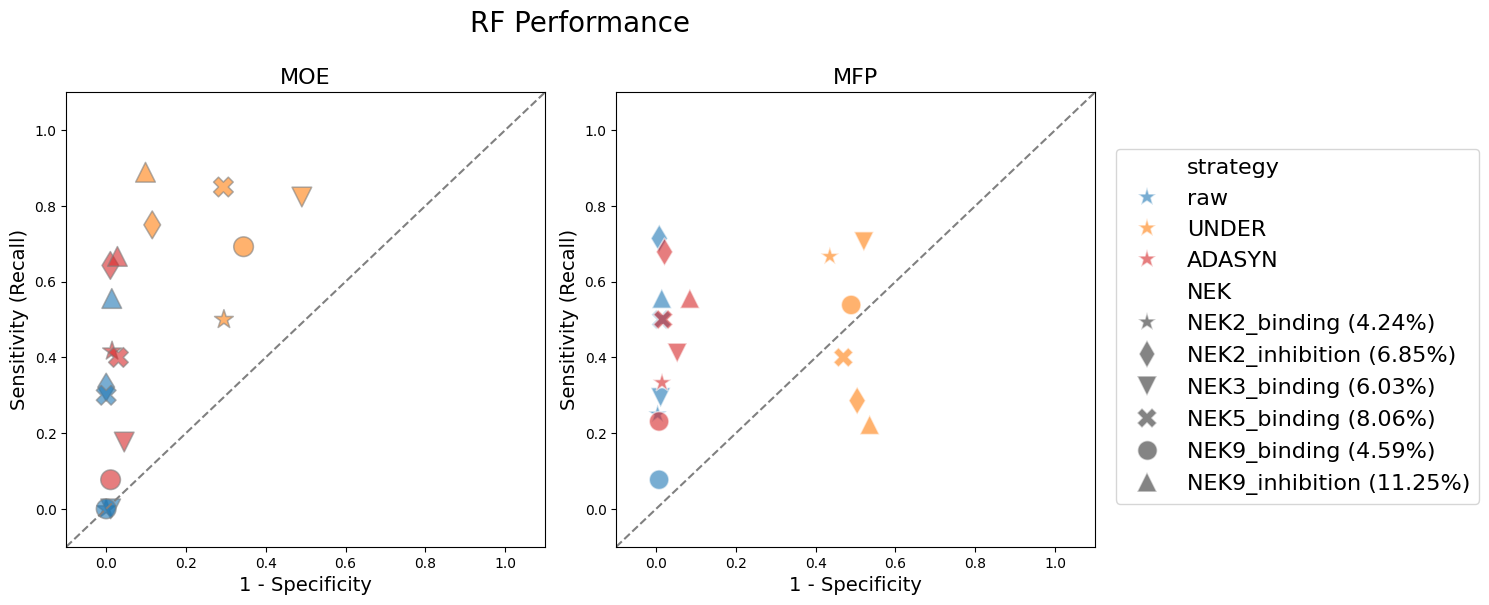

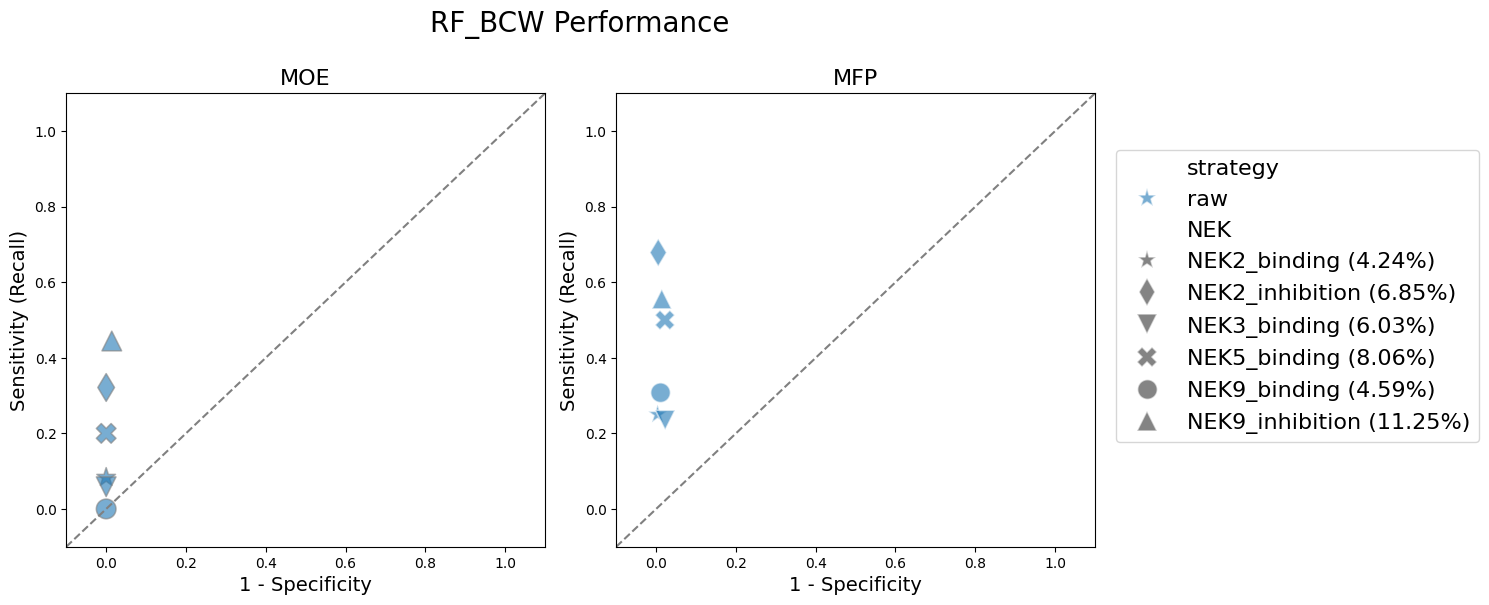

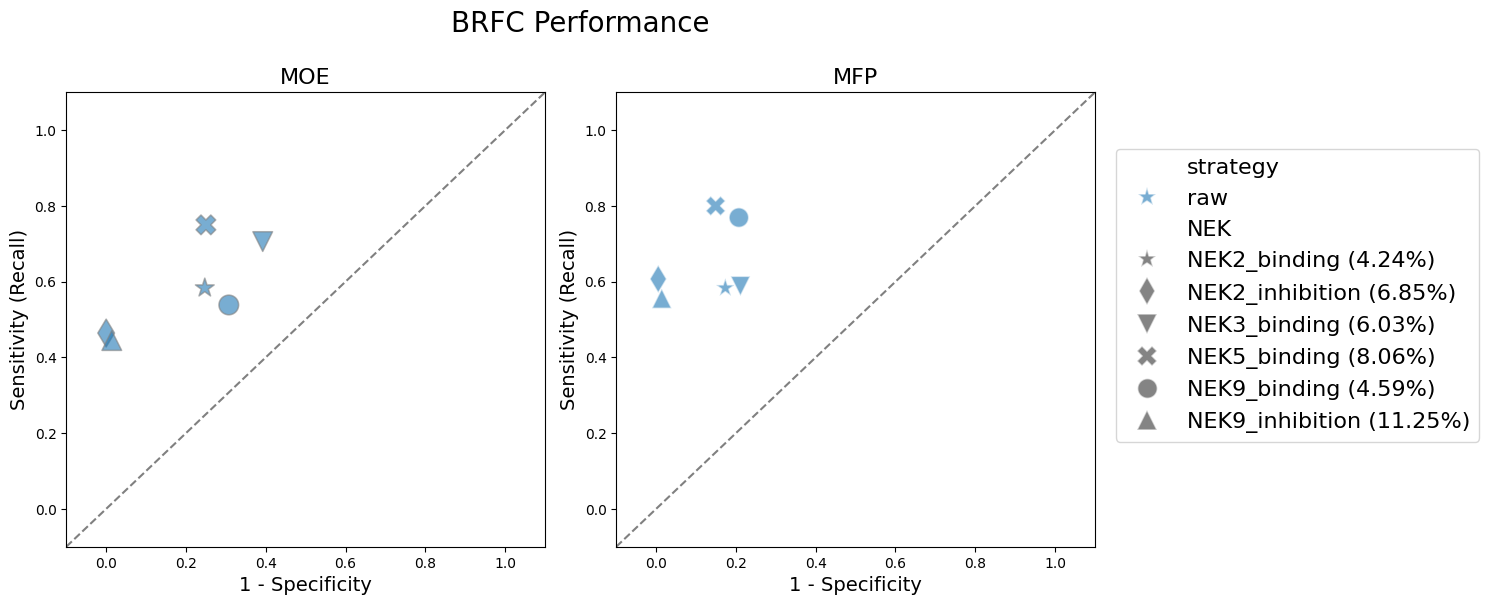

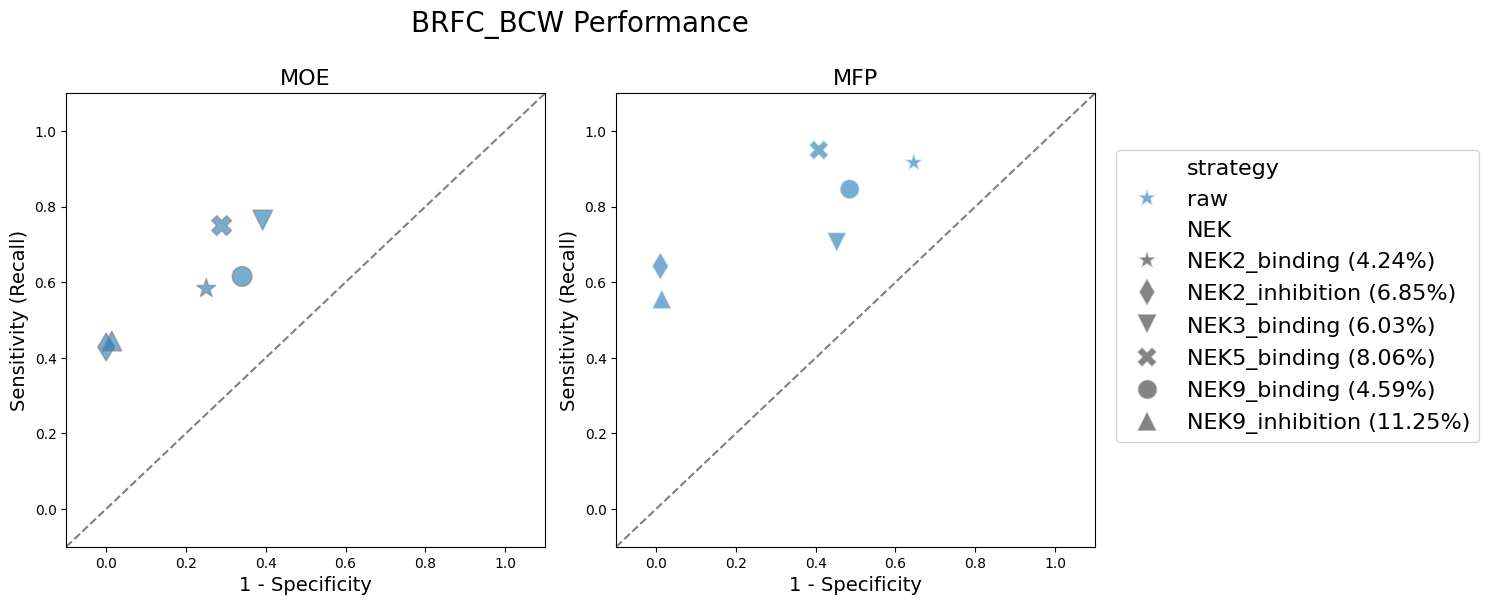

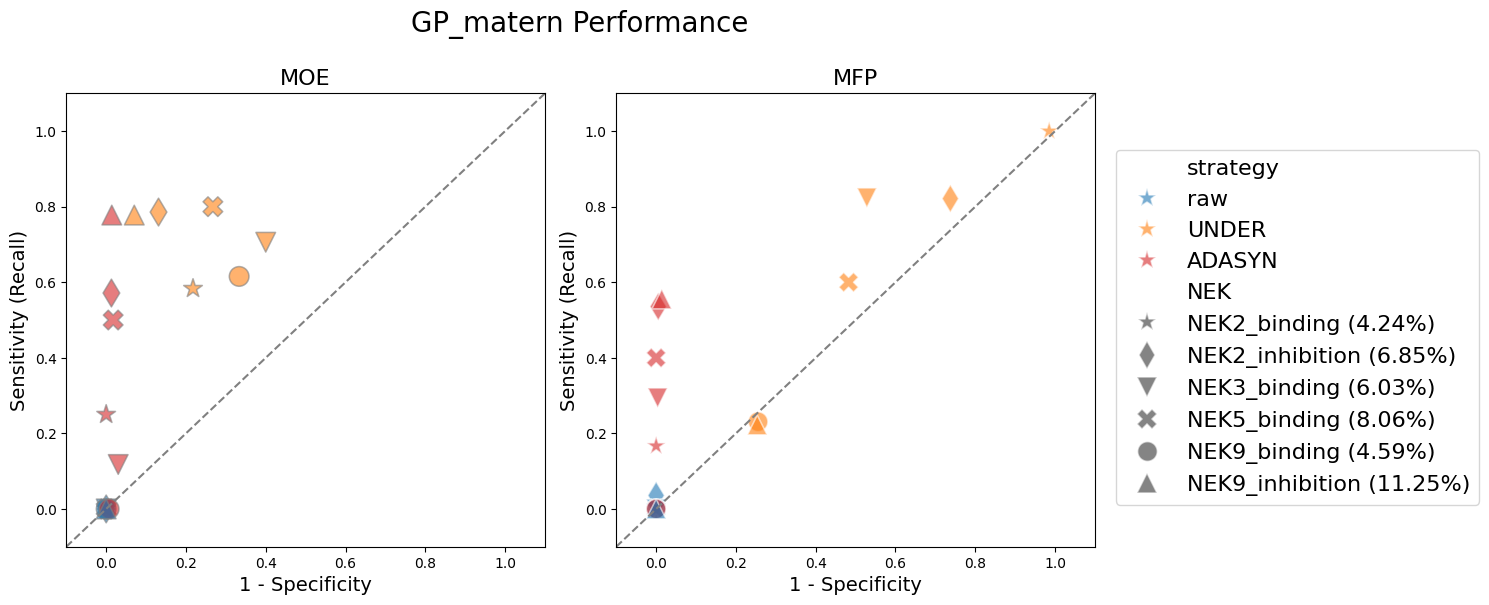

In [574]:
samp_markers = {'raw': 'o', 'UNDER': 'd', 'SMOTE': '>', 'ADASYN': '<'}
neks = rf_gp['NEK'].unique() 
shapes = ['*', 'd', 'v', '.', 'o', '^'] 

nek_markers = {'NEK2_binding (4.24%)':'*', 'NEK2_inhibition (6.85%)': 'd',
       'NEK3_binding (6.03%)': 'v', 'NEK5_binding (8.06%)': 'X',
       'NEK9_binding (4.59%)': 'o', 'NEK9_inhibition (11.25%)' : '^'}
rf_gp['NEK'] = rf_gp['NEK'].replace(nek_ratios)
rf_gp['NEK'].unique()
for mod in rf_gp['modeling_type'].unique():
    fig, axs = plt.subplots(1,2, figsize=(15,6))
    this_mod = rf_gp[rf_gp['modeling_type']==mod] 
    # this_mod['NEK'] = this_mod['NEK'].replace(nek_ratios)
    
    moe_df =this_mod[this_mod['feat_type'] == 'moe']
    mfp_df = this_mod[this_mod['feat_type'] == 'mfp']
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
                   alpha=0.6, palette=strategy_colors,ax=axs[0],s=200,edgecolor='gray')
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
                   alpha=0.6, palette=strategy_colors,ax=axs[1],s=200)
    axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle(f'{mod} Performance', fontsize=20, x=0.39, y =1.0005)
  
    plt.legend(bbox_to_anchor = [.2, 0.5])
    axs[0].set_title(f'MOE', fontsize=16)
    axs[0].get_legend().remove()
    axs[1].set_title(f'MFP', fontsize=16)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[0].set_xlabel('1 - Specificity', fontsize=14)
    axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
    axs[1].set_xlabel('1 - Specificity', fontsize=14)
    axs[0].set_ylim(-0.1, 1.1)
    axs[0].set_xlim(-0.1, 1.1)
    axs[1].set_ylim(-0.1, 1.1)
    axs[1].set_xlim(-0.1, 1.1)
    axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{figure_path}all_NEK/{mod}_sampcolors.png', bbox_inches='tight')
    
    plt.show();



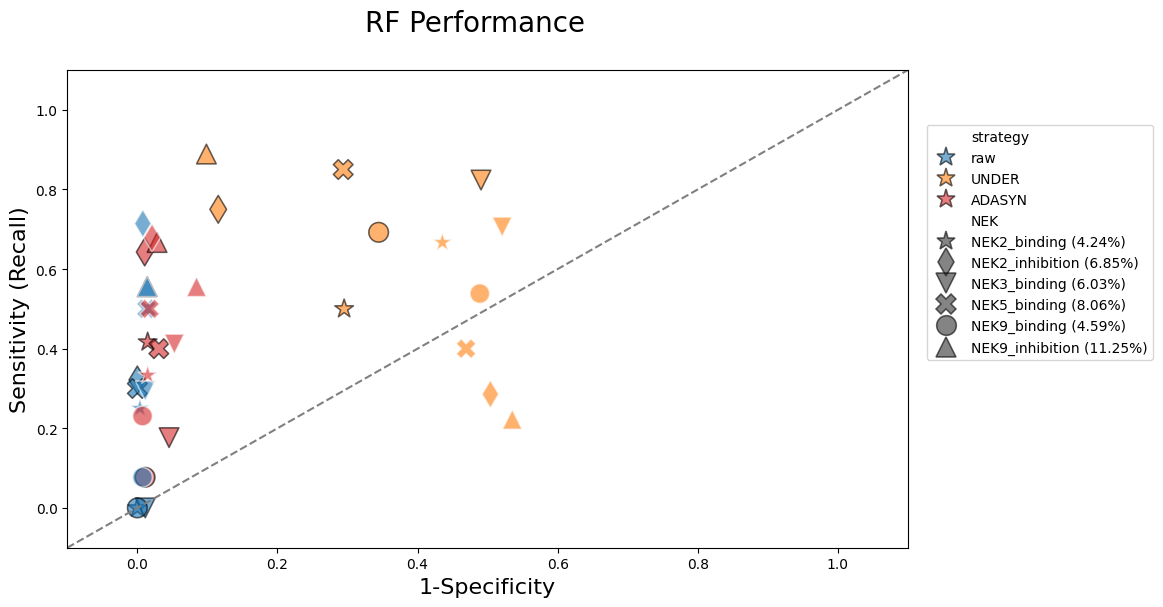

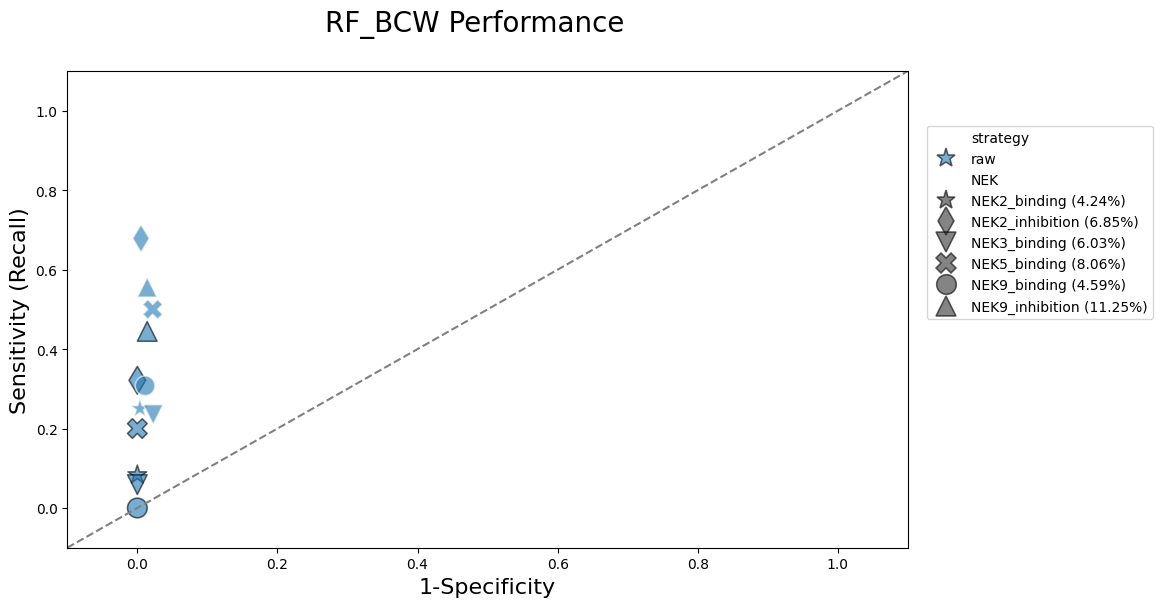

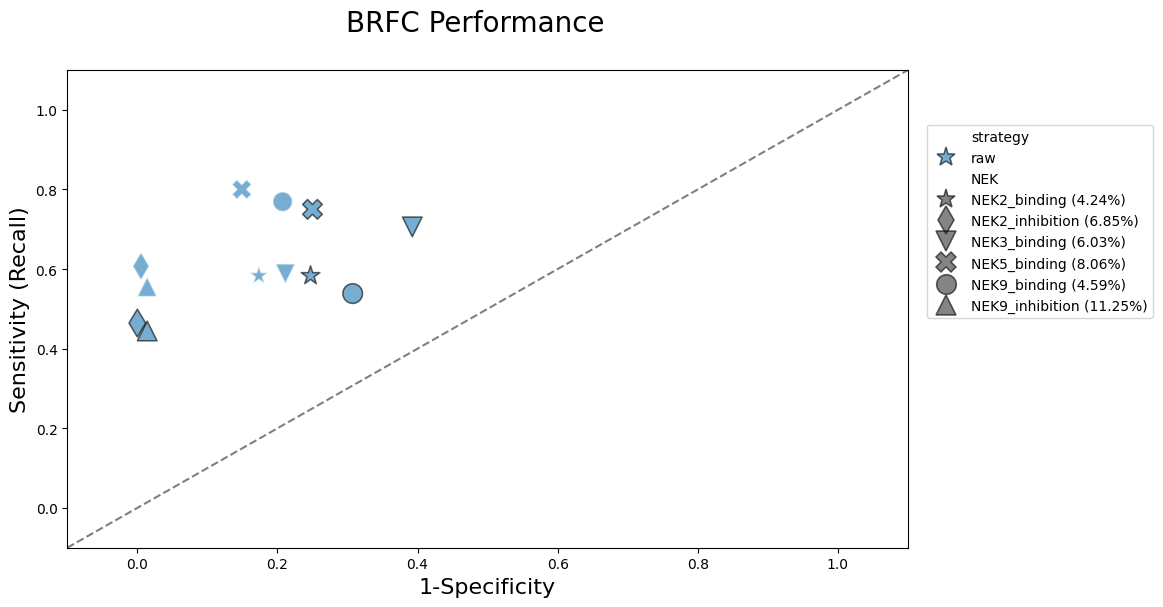

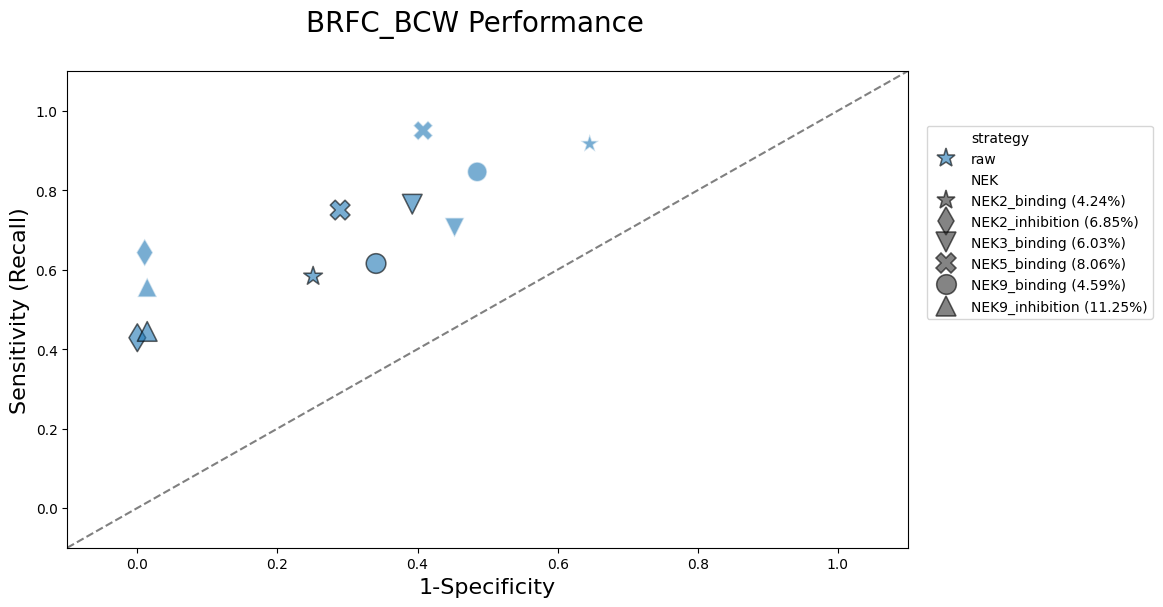

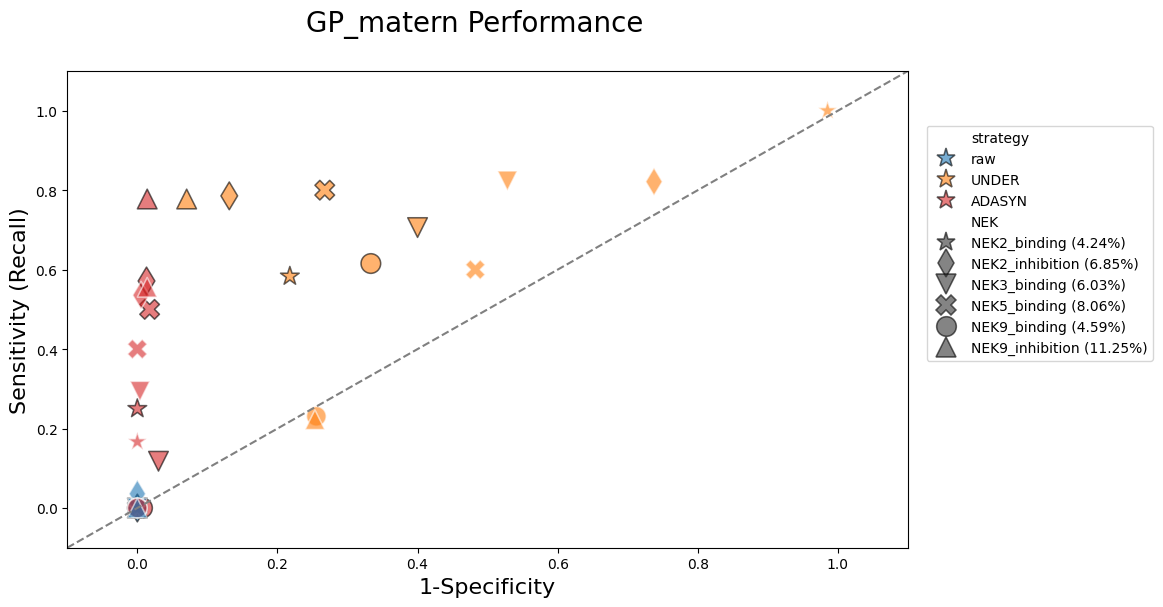

In [569]:

for mod in rf_gp['modeling_type'].unique():
    # fig, axs = plt.subplots(1,2, figsize=(15,6))
    plt.figure(figsize=(12,6))
    this_mod = rf_gp[rf_gp['modeling_type']==mod] 
    
    moe_df =this_mod[this_mod['feat_type'] == 'moe']
    mfp_df = this_mod[this_mod['feat_type'] == 'mfp']
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
                   alpha=0.6, palette=strategy_colors,s=200, edgecolor='black')
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
                   alpha=0.6, palette=strategy_colors,s=200,legend=False)
    plt.ylim(-0.1, 1.1) 
    plt.xlim(-.1,1.1)
    plt.ylabel('Sensitivity (Recall)', fontsize=16)
    plt.xlabel('1-Specificity', fontsize=16)
    plt.plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
    plt.suptitle(f'{mod} Performance', fontsize=20, x=0.4, y =1.005)
  
    plt.legend(bbox_to_anchor = [1.3, 0.9])

    # axs[1].legend(ncols=2, bbox_to_anchor=(1.2, 0.8))
    plt.tight_layout()
    plt.savefig(f'{figure_path}all_NEK/{mod}_outlined.png', bbox_inches='tight')
    
    plt.show();



In [525]:
rf_gp.columns
ex_df = pd.DataFrame({'feat_type': ['moe', 'mfp'], 'strategy': ['raw', 'UNDER', 'SMOTE', 'ADASYN'], '})

Index(['model', 'NEK', 'set', 'modeling_type', 'feat_type', 'strategy', 'cm',
       'recall', 'accuracy', 'precision', 'specificity', 'f1', 'MCC',
       'Balanced Accuracy', 'ROC-AUC', 'RF_type', 'prediction_type', 'TN',
       'FN', 'FP', 'TP', '1-specificity'],
      dtype='object')

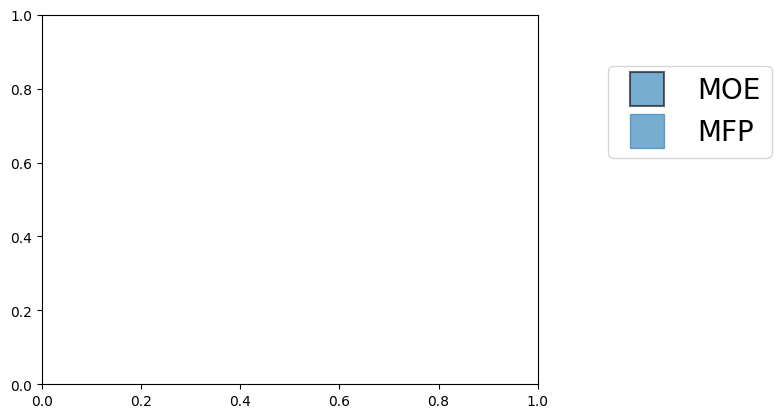

In [544]:
nek_markers
nek_colors
strategy_colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# x_data=[1]
# y_data=[4]
# ex_df = pd.DataFrame({'moe': x_data, 'mfp': y_data})

# # sns.scatterplot(data=ex_df, x='moe', y='mfp', markers='*')
# plt.scatter(x_data,y_data, marker='*',s=250, edge_color='gray')
# moe = mpatches.Patch(color='tab:blue', edgecolor='gray',label='MOE',alpha=0.6)
# mfp = mpatches.Patch(color='tab:blue', label='MFP',alpha=.6)

# plt.legend(handles=[moe, mfp])

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create a figure
fig, ax = plt.subplots()

# Manually create legend entries
legend_elements = [
    Line2D([0], [0], marker='s', color='tab:blue', label='MOE', markersize=25, linestyle='None', markerfacecolor='tab:blue', markeredgecolor='black', markeredgewidth=1.5, alpha=0.6),  # Blue star outlined
    Line2D([0], [0], marker='s', color='tab:blue', label='MFP', markersize=25, linestyle='None', markerfacecolor='tab:blue', alpha=0.6),  # Solid blue star
]

ax.legend(handles=legend_elements, loc='best',  bbox_to_anchor=[1.5, 0.9],fontsize=20)

plt.show()


In [492]:
nek_colors

{'NEK2_binding (4.24%)': (0.4, 0.7607843137254902, 0.6470588235294118),
 'NEK2_inhibition (6.85%)': (0.9882352941176471,
  0.5529411764705883,
  0.3843137254901961),
 'NEK3_binding (6.03%)': (0.5529411764705883,
  0.6274509803921569,
  0.796078431372549),
 'NEK5_binding (8.06%)': (0.9058823529411765,
  0.5411764705882353,
  0.7647058823529411),
 'NEK9_binding (4.59%)': (0.6509803921568628,
  0.8470588235294118,
  0.32941176470588235),
 'NEK9_inhibition (11.25%)': (1.0, 0.8509803921568627, 0.1843137254901961)}

In [644]:
special_palette = sns.color_palette("cubehelix", n_colors=6)
# array(['raw_RF', 'raw_RF_BCW', 'raw_BRFC', 'raw_BRFC_BCW', 'UNDER_RF',
#        'ADASYN_RF'], dtype=object)
special_palette = {'raw_RF': '#8C5383', 'raw_RF_BCW': '#92374D', 
                   'raw_BRFC': '#9CD08F', 'raw_BRFC_BCW': '#35605A', 
                   'UNDER_RF': '#42BFDD', 'ADASYN_RF': '#A3CEF1'}
                   


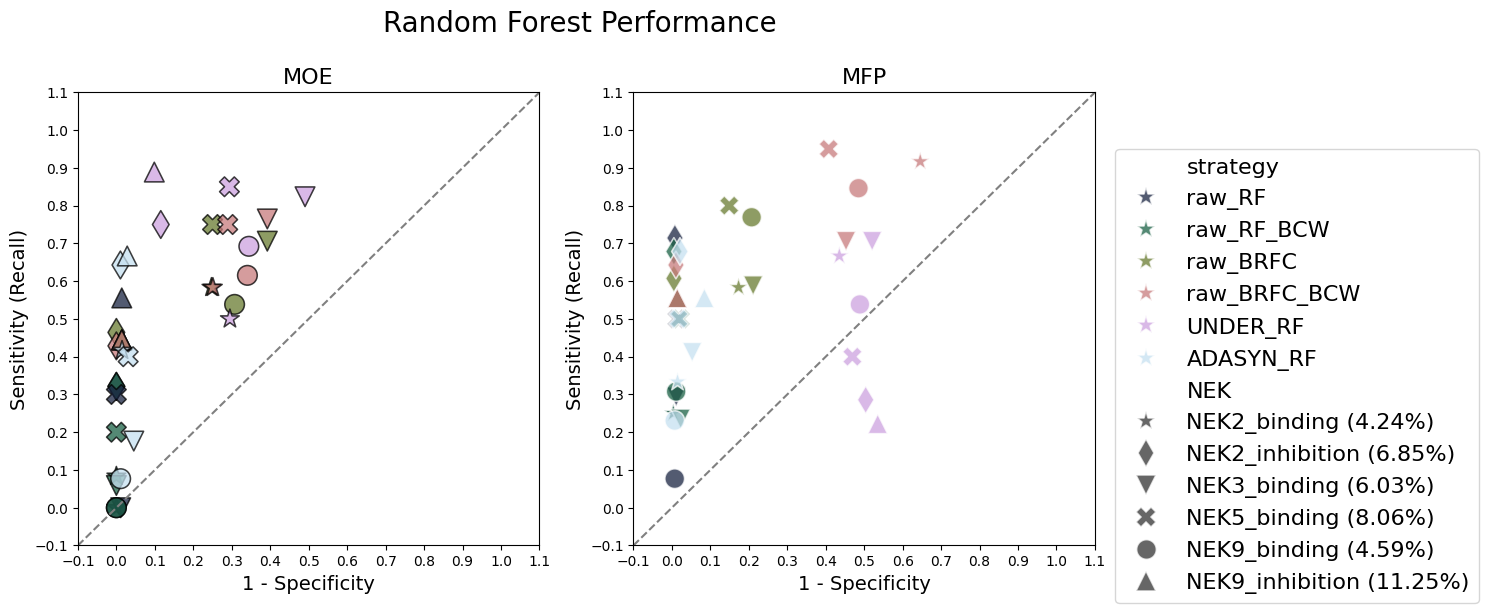

In [612]:
rf_df = rf_gp[rf_gp['modeling_type'] != 'GP_matern']
rf_mod = rf_df.copy()
rf_mod['strategy'] = rf_mod['strategy'].astype(str) +'_'+ rf_mod['RF_type']
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =rf_mod[rf_mod['feat_type'] == 'moe']
mfp_df = rf_mod[rf_mod['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200, edgecolor='black', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200,legend=True, ax=axs[1])
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'Random Forest Performance', fontsize=20, x=0.39, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)

axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_oilspill.png', bbox_inches='tight')


plt.show();



In [614]:
rf_mod['strategy'].unique()


array(['raw_RF', 'raw_RF_BCW', 'raw_BRFC', 'raw_BRFC_BCW', 'UNDER_RF',
       'ADASYN_RF'], dtype=object)

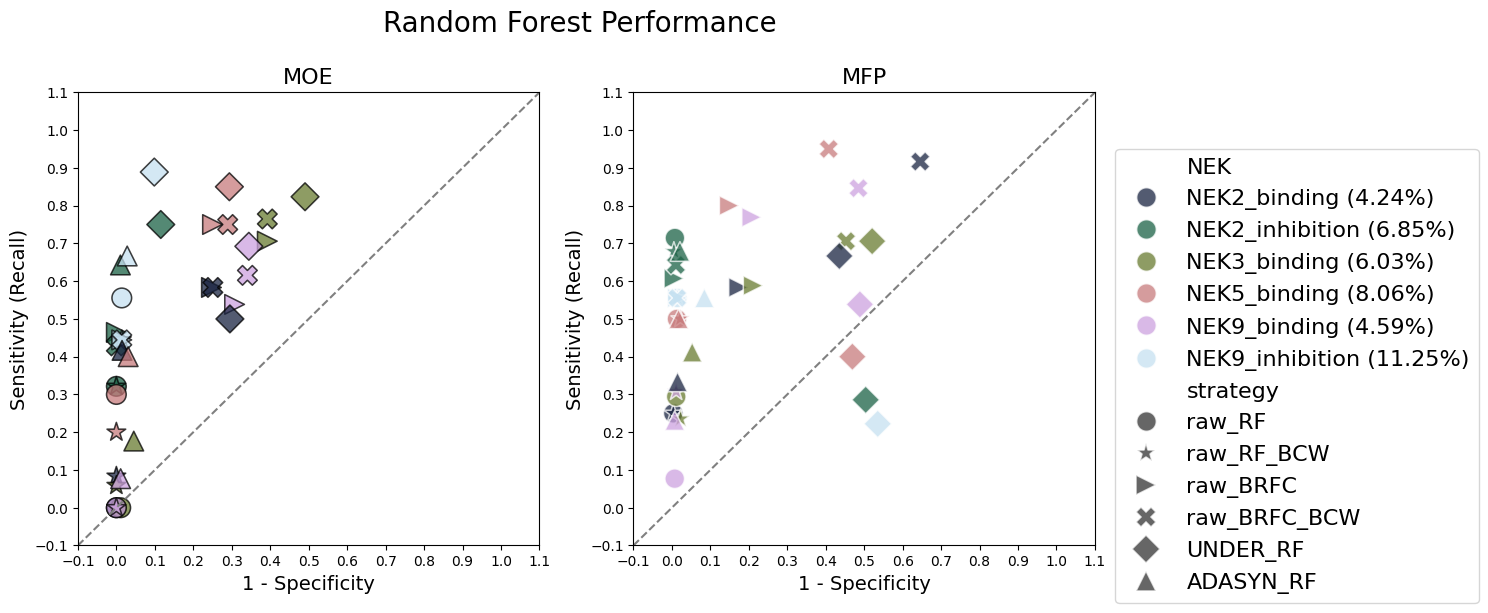

In [630]:
moe_df =rf_mod[rf_mod['feat_type'] == 'moe']
mfp_df = rf_mod[rf_mod['feat_type'] == 'mfp']
strategy_markers = {'raw_RF': 'o', 'raw_RF_BCW':'*', 'raw_BRFC': '>', 'raw_BRFC_BCW':'X', 'UNDER_RF': 'D',
       'ADASYN_RF': '^'}
fig, axs = plt.subplots(1,2, figsize=(15,6))

rf_mod['strategy'].unique()

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='NEK', style='strategy', markers=strategy_markers,
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200, edgecolor='black', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='NEK', style='strategy', markers=strategy_markers,
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200,legend=True, ax=axs[1])
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'Random Forest Performance', fontsize=20, x=0.39, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)

axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_oilspill_shapes.png', bbox_inches='tight')


plt.show();


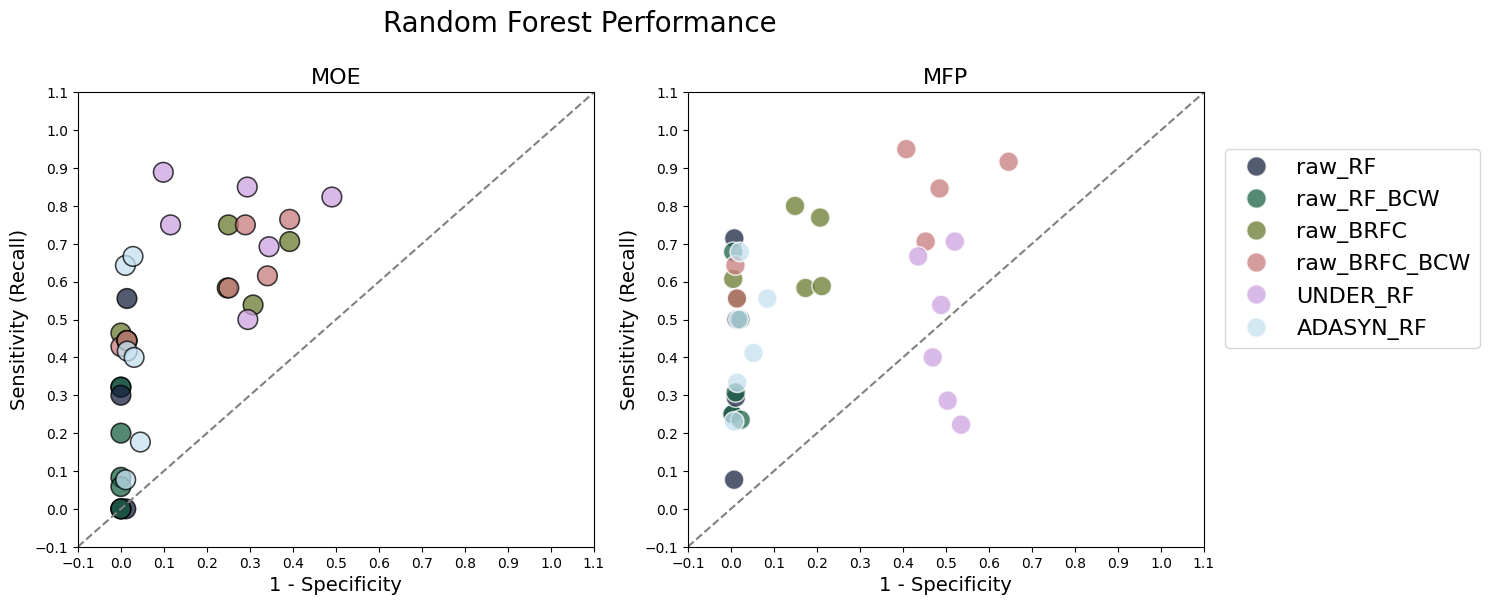

In [637]:
rf_df = rf_gp[rf_gp['modeling_type'] != 'GP_matern']
rf_mod = rf_df.copy()
rf_mod['strategy'] = rf_mod['strategy'].astype(str) +'_'+ rf_mod['RF_type']
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =rf_mod[rf_mod['feat_type'] == 'moe']
mfp_df = rf_mod[rf_mod['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200, edgecolor='black', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=sns.color_palette("cubehelix", n_colors=6),s=200,legend=True, ax=axs[1])
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'Random Forest Performance', fontsize=20, x=0.39, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)

axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_oilspill_oneshape.png', bbox_inches='tight')
plt.show();

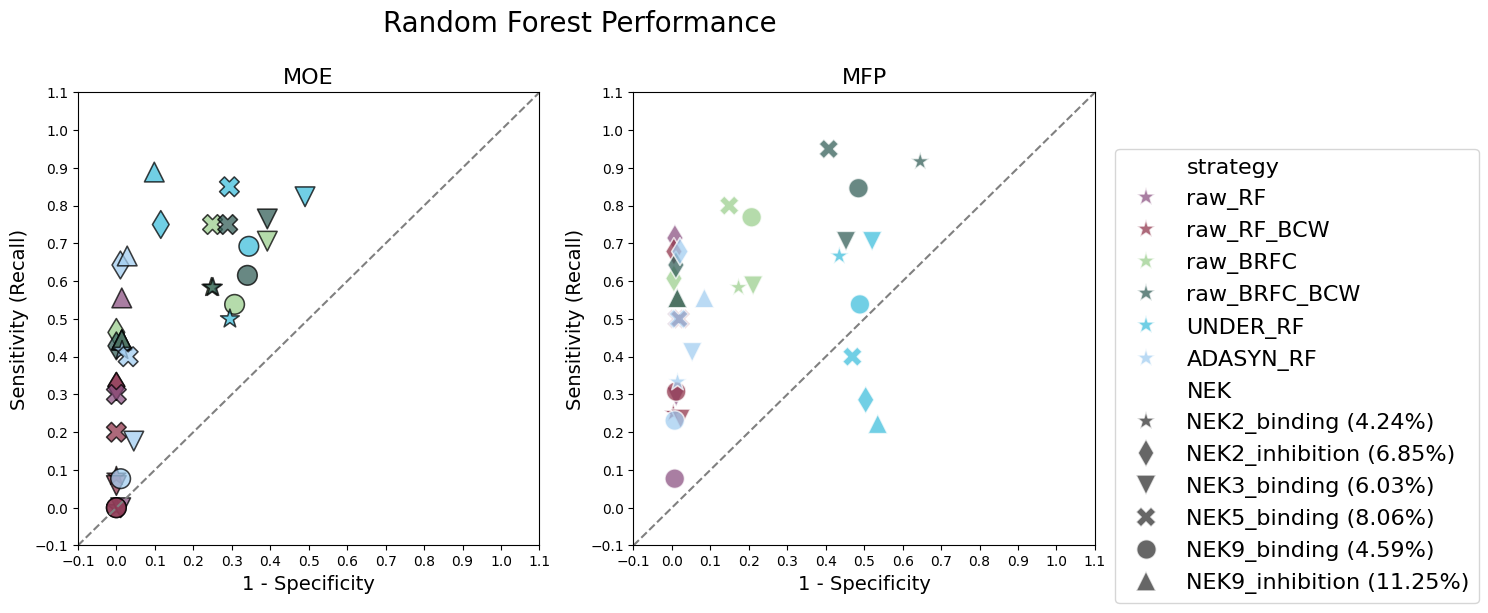

In [645]:
rf_df = rf_gp[rf_gp['modeling_type'] != 'GP_matern']
rf_mod = rf_df.copy()
rf_mod['strategy'] = rf_mod['strategy'].astype(str) +'_'+ rf_mod['RF_type']
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =rf_mod[rf_mod['feat_type'] == 'moe']
mfp_df = rf_mod[rf_mod['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
               alpha=0.75, palette=special_palette,s=200, edgecolor='black', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='NEK', markers=nek_markers,
               alpha=0.75, palette=special_palette,s=200,legend=True, ax=axs[1])
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'Random Forest Performance', fontsize=20, x=0.39, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)

axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_xticks(np.arange(-0.1, 1.1, 0.1))
axs[0].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].set_yticks(np.arange(-0.1, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_coordcolors.png', bbox_inches='tight')


plt.show();



In [654]:
special_palette2 = {'raw_RF': 'tab:red', 'raw_RF_BCW': 'purple', 
                   'raw_BRFC': 'limegreen', 'raw_BRFC_BCW': '#35605A', 
                   'UNDER_RF': '#42BFDD', 'ADASYN_RF': 'yellow'}

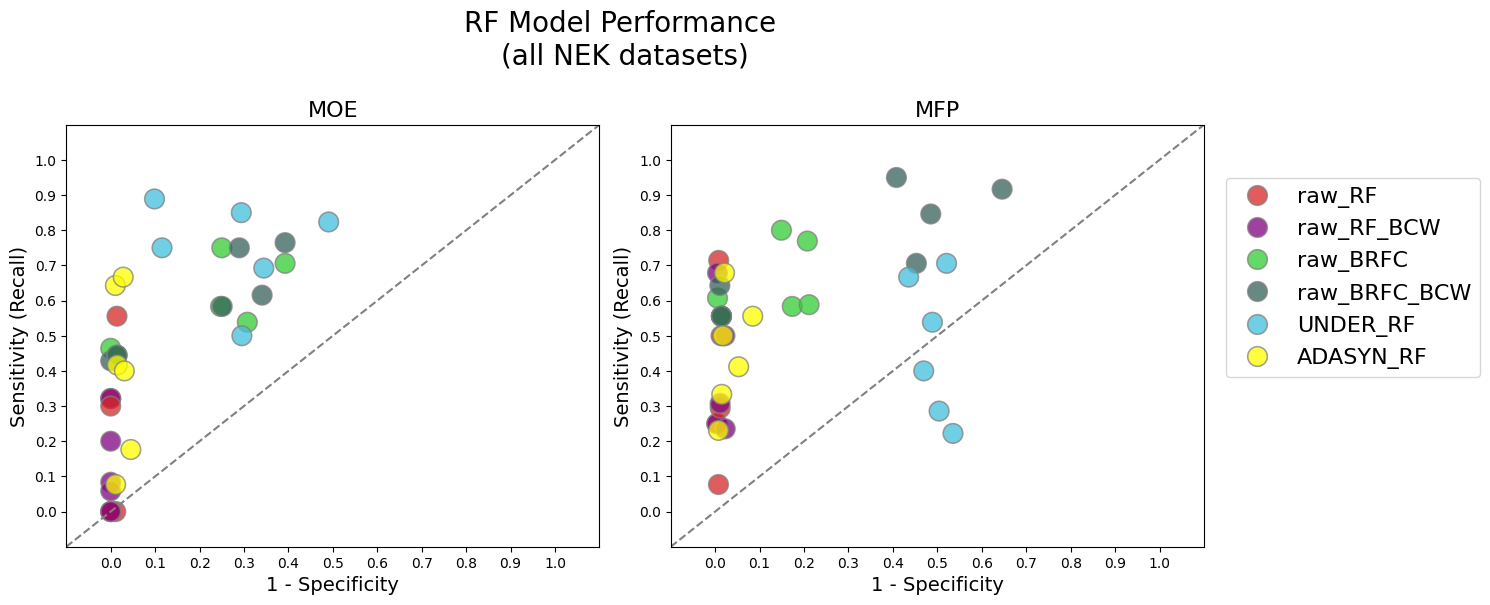

In [870]:
rf_df = rf_gp[rf_gp['modeling_type'] != 'GP_matern']
rf_df = rf_df[rf_df['modeling_type'] != 'GP']
rf_mod = rf_df.copy()
rf_mod['strategy'] = rf_mod['strategy'].astype(str) +'_'+ rf_mod['RF_type']
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =rf_mod[rf_mod['feat_type'] == 'moe']
mfp_df = rf_mod[rf_mod['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=special_palette2,s=200, edgecolor='gray', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=special_palette2,s=200,legend=True, ax=axs[1],edgecolor='gray')
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'RF Model Performance \n(all NEK datasets)', fontsize=20, x=0.42, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)
axs[0].FontSize = 16; 
axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_coordcolors_noshapes.png', bbox_inches='tight')


plt.show();



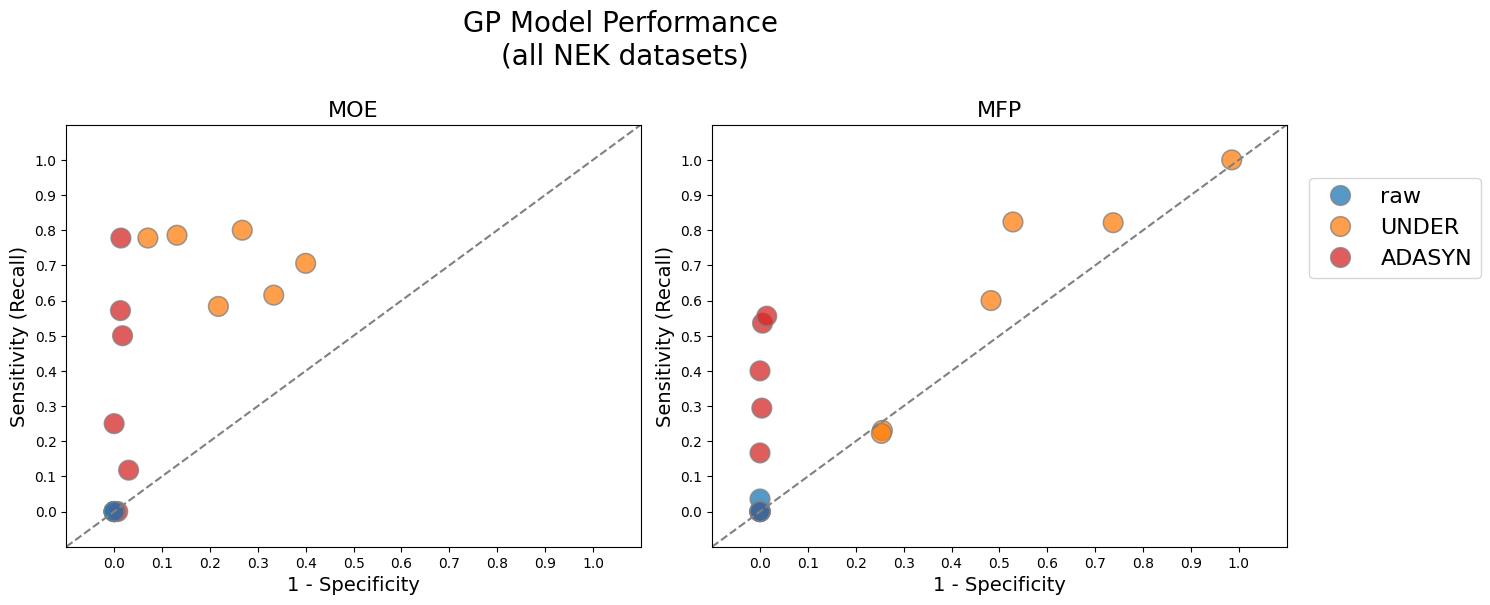

array(['raw', 'UNDER', 'ADASYN'], dtype=object)

In [734]:
gp = rf_gp[rf_gp['modeling_type'] == 'GP_matern']

moe_df =gp[gp['feat_type'] == 'moe']
mfp_df = gp[gp['feat_type'] == 'mfp']
fig, axs = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=strategy_colors,s=200, edgecolor='gray', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=strategy_colors,s=200,legend=True, ax=axs[1],edgecolor='gray')
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'GP Model Performance \n(all NEK datasets)', fontsize=20, x=0.42, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)
axs[0].FontSize = 16; 
axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/GP_moe_mfp)coordcolors_noshapes.png', bbox_inches='tight')


plt.show();

gp['strategy'].unique()

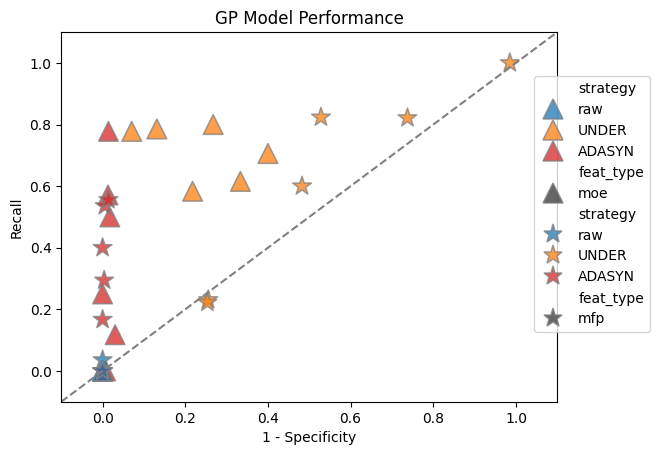

In [680]:
moe_df =gp[gp['feat_type'] == 'moe']
mfp_df = gp[gp['feat_type'] == 'mfp']
plt.figure()
sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=strategy_colors,s=200, edgecolor='gray', markers=['^'],style='feat_type')
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
               alpha=0.75, palette=strategy_colors,s=200,legend=True,edgecolor='gray',markers=['*'],style='feat_type')
plt.plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.title(f'GP Model Performance')
plt.ylabel("Recall")
plt.xlabel("1 - Specificity")
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.legend(bbox_to_anchor = [1.2, 0.9])

plt.savefig(f'{figure_path}all_NEK/GP_all_NEK.png',bbox_inches='tight' )

plt.show();

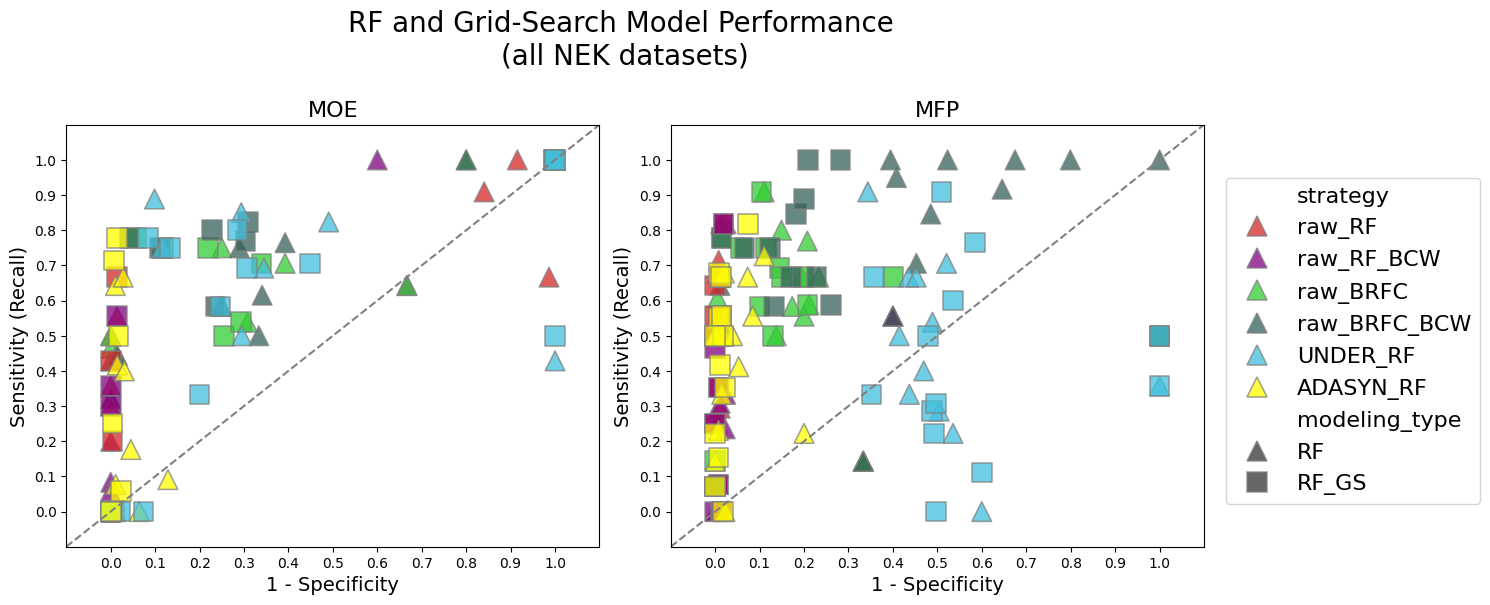

In [708]:
df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/general_NEK/GP_GPmatern_RF_RFGS_results_all_sets.csv')
df = df[df['strategy'] != 'SMOTE']
rf= df[df['modeling_type'] != 'GP']
rf= rf[rf['modeling_type'] != 'GP_matern']
rf['modeling_type'].unique()
rf_raw = rf[(rf['strategy'] == 'raw') & (rf['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'ADASYN']))]  
rf_filtered = pd.concat([rf_raw, rf_other])
total_rf = rf_filtered.copy() 
total_rf['strategy'] =total_rf['strategy'].astype(str) +'_'+ total_rf['RF_type']
rf_type_dict ={'RF': '^', 'RF_GS': 's'} 

total_rf['1-specificity'] = 1-total_rf['specificity']
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =total_rf[total_rf['feat_type'] == 'moe']
mfp_df = total_rf[total_rf['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type',markers=rf_type_dict,
               alpha=0.75, palette=special_palette2,s=200, edgecolor='gray', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='modeling_type', markers=rf_type_dict,
               alpha=0.75, palette=special_palette2,s=200,legend=True, ax=axs[1],edgecolor='gray')
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'RF and Grid-Search Model Performance \n(all NEK datasets)', fontsize=20, x=0.42, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.5])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)
axs[0].FontSize = 16; 
axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.9),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_and_RFGS.png', bbox_inches='tight')


plt.show();



In [717]:
rfdf['NEK'].unique()
nek_order = ['NEK2_binding (4.24%)','NEK9_binding (4.59%)','NEK3_binding (6.03%)','NEK2_inhibition (6.85%)','NEK5_binding (8.06%)','NEK9_inhibition (11.25%)' ]

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(data=this_gp, y='recall', x='NEK', hue='feat_type', order=nek_order,ci=None)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


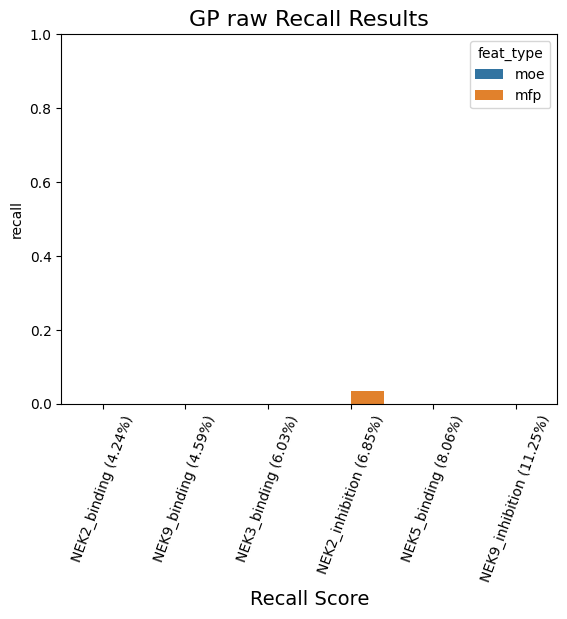

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(data=this_gp, y='recall', x='NEK', hue='feat_type', order=nek_order,ci=None)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


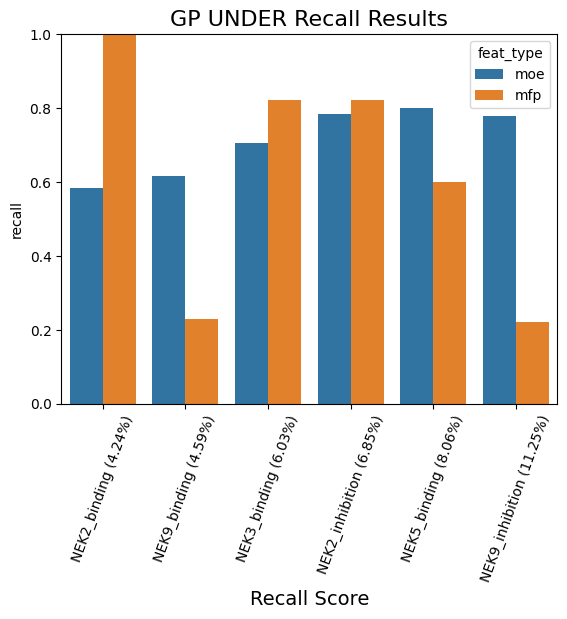

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(data=this_gp, y='recall', x='NEK', hue='feat_type', order=nek_order,ci=None)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/2424109453.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


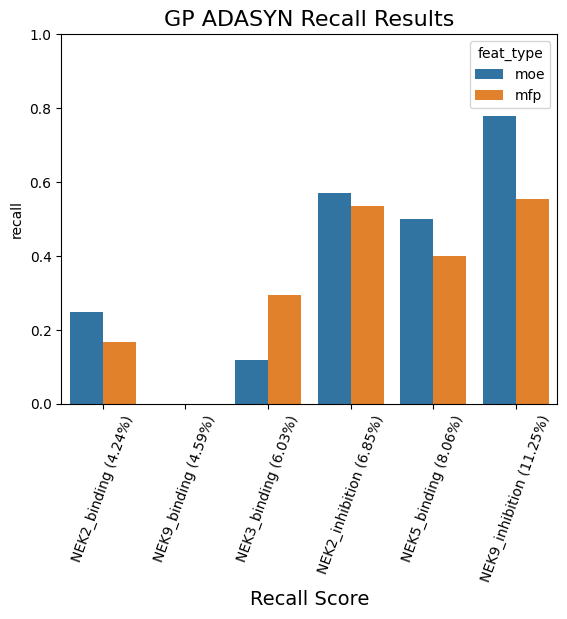

In [741]:
for samp in gp['strategy'].unique(): 
    this_gp = gp[gp['strategy']==samp]
    g = sns.barplot(data=this_gp, y='recall', x='NEK', hue='feat_type', order=nek_order,ci=None)
    g.set_xticklabels(g.get_xticklabels(), rotation=70)
    g.set_ylim(0,1)
    plt.title(f'GP {samp} Recall Results', fontsize=16)
    plt.xlabel('Recall Score', fontsize=14)
    plt.show()

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/950095686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


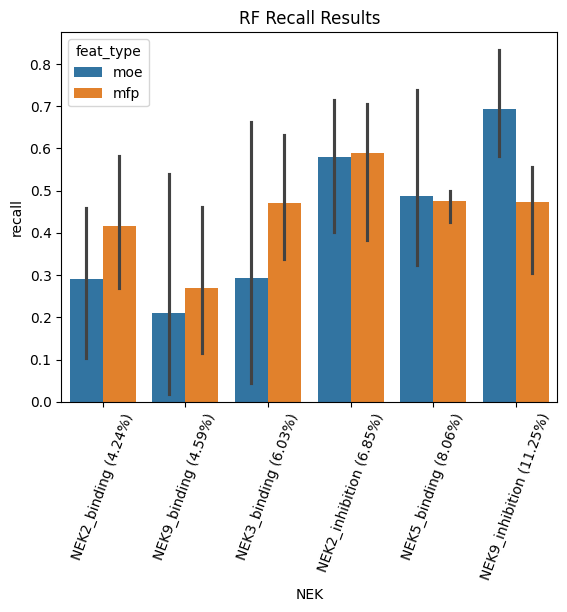

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/950095686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


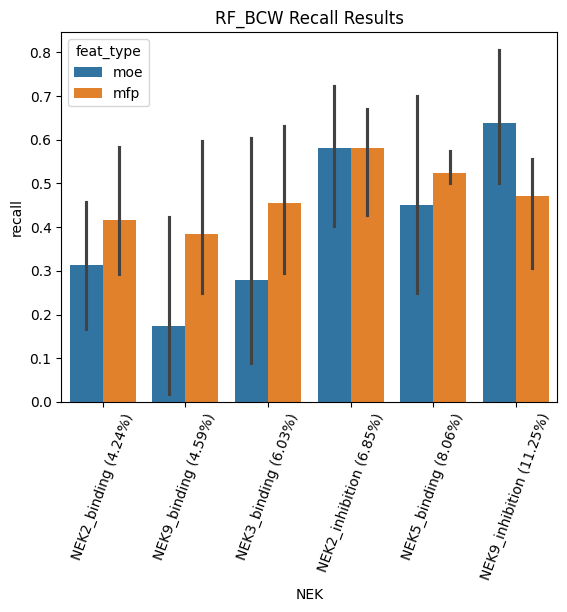

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/950095686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


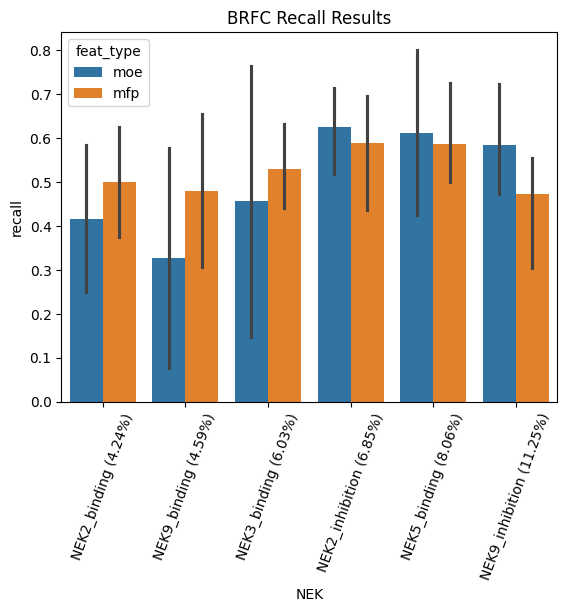

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_50851/950095686.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=70)


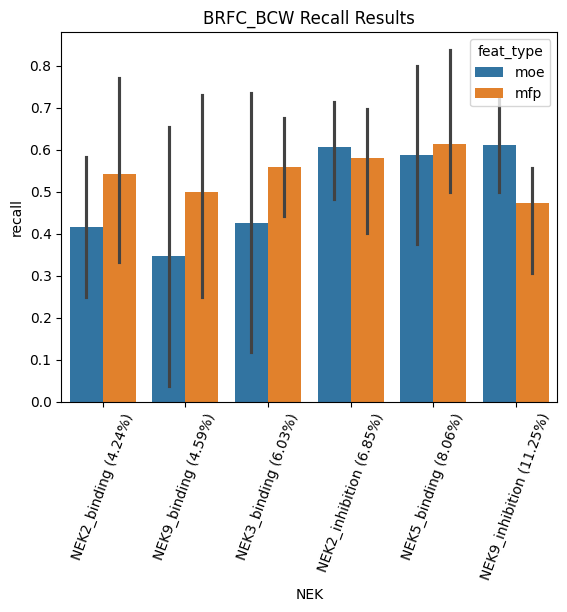

In [731]:
for rf in rfdf['RF_type'].unique():
    this_rf = rfdf[rfdf['RF_type'] == rf] 
    g = sns.barplot(data=this_rf, y='recall', x='NEK', hue='feat_type', order=nek_order)
    g.set_xticklabels(g.get_xticklabels(), rotation=70)
    plt.title(f'{rf} Recall Results')
    plt.show()


In [878]:
special_palette3 = {'raw_RF': 'tab:red', 'raw_RF_BCW': 'purple', 
                   'raw_BRFC': 'limegreen', 'raw_BRFC_BCW': '#35605A', 
                   'UNDER_RF': '#42BFDD', 'ADASYN_RF': 'yellow', 
                   'raw_GP':'tab:red', 'UNDER_GP':'#42BFDD', 'ADASYN_GP':'yellow' }
strategy_order3 = list(special_palette3.keys())
# style='modeling_type',markers=rf_type_dict
model_types_dict = {'RF': 'p', 'GP':'^' }

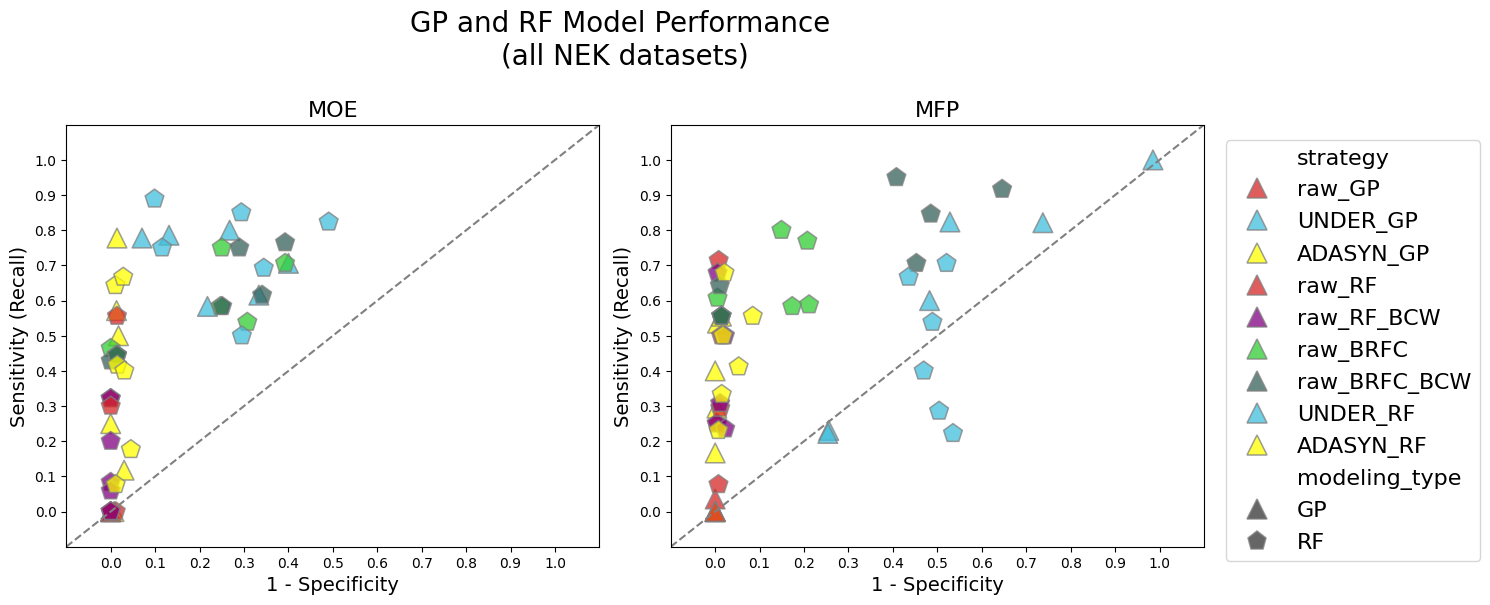

In [884]:
rf_df = rf_gp[rf_gp['modeling_type'] != 'GP_matern']
rf_df = rf_df[rf_df['modeling_type'] != 'GP']
rf_mod = rf_df.copy()
rf_mod['strategy'] = rf_mod['strategy'].astype(str) +'_'+ rf_mod['RF_type']
rf_mod['modeling_type'] ='RF'

gp = rf_gp[rf_gp['strategy'] != 'SMOTE']
gp= gp[gp['modeling_type'] == 'GP_matern']

gp['modeling_type'] = 'GP'

gp['strategy'] = gp['strategy'].astype(str)+'_GP'

df = pd.concat([gp, rf_mod])
df['modeling_type'].value_counts()
fig, axs = plt.subplots(1,2, figsize=(15,6))


moe_df =df[df['feat_type'] == 'moe']
mfp_df = df[df['feat_type'] == 'mfp']

sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
               alpha=0.75, palette=special_palette3,s=200, edgecolor='gray', ax=axs[0])
sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
               alpha=0.75, palette=special_palette3,s=200,legend=True, ax=axs[1],edgecolor='gray')
axs[0].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
axs[1].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
plt.suptitle(f'GP and RF Model Performance \n(all NEK datasets)', fontsize=20, x=0.42, y =1.0005)

plt.legend(bbox_to_anchor = [.2, 0.9])
axs[0].set_title(f'MOE', fontsize=16)
axs[0].get_legend().remove()
axs[1].set_title(f'MFP', fontsize=16)
axs[0].FontSize = 16; 
axs[0].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[0].set_xlabel('1 - Specificity', fontsize=14)
axs[1].set_ylabel('Sensitivity (Recall)', fontsize=14)
axs[1].set_xlabel('1 - Specificity', fontsize=14)
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].legend(ncols=1, bbox_to_anchor=(1.02, 0.99),fontsize=16)
plt.tight_layout()
plt.savefig(f'{figure_path}all_NEK/RF_and_GP.png', bbox_inches='tight')


plt.show();


In [829]:
def course_correct(this_nek): 
    if this_nek == 'NEK2_binding': 
        df_root = 'NEK2/bind/'
        bind_or_inhib = 'binding'
        return df_root, bind_or_inhib
    elif this_nek == 'NEK2_inhibition': 
        df_root = 'NEK2/inhib/'
        bind_or_inhib = 'inhibition'
        return df_root, bind_or_inhib
    elif this_nek == 'NEK3_binding': 
        df_root = 'NEK3/bind/'
        bind_or_inhib = 'binding'
        return df_root, bind_or_inhib
    elif this_nek == 'NEK5_binding': 
        df_root = 'NEK5/bind/'
        bind_or_inhib = 'binding'
        return df_root, bind_or_inhib
    elif this_nek == 'NEK9_binding': 
        df_root = 'NEK9/bind/'
        bind_or_inhib = 'binding'
        return df_root, bind_or_inhib
    elif this_nek == 'NEK9_inhibition': 
        df_root = 'NEK9/inhib/'
        bind_or_inhib = 'inhibition'
        return df_root, bind_or_inhib
    else: 
        return 'error', 'error'
    
import scipy as sp
from sklearn.metrics import pairwise_distances

# ---------------------------------------------
def calc_AD_kmean_dist(train_dset, pred_dset, k, train_dset_pair_distance=None, dist_metric="euclidean"):
    """
    calculate the probability of the prediction dataset fall in the the domain of traning set. Use Euclidean distance of the K nearest neighbours.
    train_dset and pred_dset should be in 2D numpy array format where each row is a compound.
    """
    if train_dset_pair_distance is None:
        # calcualate the pairwise distance of training set
        train_dset_pair_distance = pairwise_distances(X=train_dset, metric=dist_metric)
    train_kmean_dis = []
    for i in range(len(train_dset_pair_distance)):
        kn_idx = np.argpartition(train_dset_pair_distance[i], k+1)
        dis = np.mean(train_dset_pair_distance[i][kn_idx[:k+1]])
        train_kmean_dis.append(dis)
    train_dset_distribution = sp.stats.norm.fit(train_kmean_dis)
    # pairwise distance between train and pred set
    pred_size = len(pred_dset)
    train_pred_dis = pairwise_distances(X=pred_dset, Y=train_dset, metric=dist_metric)
    pred_kmean_dis_score = np.zeros(pred_size)
    for i in range(pred_size):
        pred_km_dis = np.mean(np.sort(train_pred_dis[i])[:k])
        train_dset_std = train_dset_distribution[1] if train_dset_distribution[1] != 0 else 1e-6
        pred_kmean_dis_score[i] = max(1e-6, (pred_km_dis - train_dset_distribution[0]) / train_dset_std)
    return pred_kmean_dis_score
    
def gather_plot_data(df): 
    predictions = df['prediction'] 
    true_labels = df['true_labels'] 
    std1 = df['std1'] 
    std0 =df['std0'] 
    ad_dist = df['ADdist'] 

    true_pos = np.where((predictions == 1) & (true_labels == 1))[0] 
    true_neg = np.where((predictions == 0) & (true_labels == 0))[0]
    false_pos = np.where((predictions == 1) & (true_labels == 0))[0] 
    false_neg = np.where((predictions == 0) & (true_labels == 1))[0] 
    tp_std1 = std1[true_pos]
    tn_std0 = std0[true_neg]
    fp_std1 = std1[false_pos]
    fn_std1 = std1[false_neg]
    tp_ad = ad_dist[true_pos]
    tn_ad = ad_dist[true_neg]
    fp_ad = ad_dist[false_pos]
    fn_ad = ad_dist[false_neg] 
    
    data = {
        'std of probabilities': np.concatenate([tp_std1,tn_std0,fp_std1, fn_std1]),
        'prediction_type': ['TP'] * len(true_pos) + ['TN'] * len(true_neg) + ['FP'] * len(false_pos) + ['FN'] * len(false_neg),
        'ADdist': np.concatenate([tp_ad, tn_ad, fp_ad,fn_ad]) 
    }
    
    df2=pd.DataFrame(data) 
    df2['NEK'] = df['NEK'].iloc[0]
    df2['feat_type'] = df['feat_type'].iloc[0]
    df2['strategy']  = df['strategy'].iloc[0]
    df2['RF_type']  = df['RF_type'].iloc[0]
    df2['cm'] = df['cm'].iloc[0]
    df2['recall'] = df['recall'].iloc[0]

    return df2


def plot_std_dist_moemfp2(dfs, moemfp, title=None, figure_path=None, filename=None):
    all_dfs=[] 
    strategy_cm_map = {}
    recall_map = {}
    for df in dfs:
        this_df = gather_plot_data(df)
        this_feat_df = this_df[this_df['feat_type'] == moemfp]
        all_dfs.append(this_feat_df)
    print(strategy_cm_map)
    full_df = pd.concat(all_dfs)

    rf_raw = full_df[(full_df['strategy'] == 'raw') & (full_df['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
    rf_other = full_df[(full_df['RF_type'] == 'RF') & (full_df['strategy'].isin(['UNDER', 'ADASYN']))]  
    rf_final = pd.concat([rf_raw, rf_other])
    rf_final['strategy'] = rf_final['strategy'].astype(str) +'_'+rf_final['RF_type']
    print(rf_final['strategy'].unique())
    for samp in rf_final['strategy'].unique(): 
        samp_df= rf_final[rf_final['strategy'] == samp]
        strategy = samp_df['strategy'].iloc[0]
        cm_value =samp_df['cm'].iloc[0] 
        cm_value_str = str(cm_value)
        recall_map[strategy] = f"{samp_df['recall'].iloc[0]:.2f}"
        strategy_cm_map[strategy] =cm_value_str
        
    
    display(rf_final) 

    
    # fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
    plt.figure(figsize=(7, 6))

    sns.kdeplot(data=rf_final, x='std of probabilities', hue='strategy',
                palette=special_palette2, hue_order=strategy_order)
    plt.title(moemfp, fontsize=14)
    plt.xlabel('Std of Probability', fontsize=14)
    plt.ylabel('Density', fontsize=12)

    labels = []
    handles = []
    for samp in strategy_order:
        if samp in strategy_cm_map:
            label = f'{samp}, cm: {strategy_cm_map[samp]}, recall: {recall_map[samp]}'
            color = special_palette2[samp]
            labels.append(label)
            handles.append(Line2D([0], [0], color=color, lw=2))
    plt.legend(handles, labels, title=f'{moemfp}: Dataset, cm [TN, FP, FN, TP]', loc='upper left', bbox_to_anchor=(1.05, .7))
  
    if title is not None: 
        plt.suptitle(title, x=0.5, y=1, fontsize=16)
    
    if figure_path is not None: 
        plt.savefig(f'{figure_path}{filename}.png',bbox_inches='tight')
    
    plt.show()



{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.100000              TN  0.740754  NEK2_binding       moe   
1                0.140705              TN  1.456327  NEK2_binding       moe   
2                0.000000              TN  0.000001  NEK2_binding       moe   
3                0.301511              TN  1.175180  NEK2_binding       moe   
4                0.287623              TN  0.575131  NEK2_binding       moe   
..                    ...             ...       ...           ...       ...   
278              0.287623              FN  1.249081  NEK2_binding       moe   
279              0.000000              FN  2.017827  NEK2_binding       moe   
280              0.000000              FN  1.878723  NEK2_binding       moe   
281              0.140705              FN  0.895355  NEK2_binding       moe   
282              0.337998              FN  0.224049  NEK2_binding       moe   

      strategy RF_type               cm    recall  
0       raw_RF      RF  [271, 0, 12, 0]  0.000000  
1       raw_RF      RF  [271, 0, 12, 0]  0.000000  
2       raw_RF      RF  [271, 0, 12, 0]  0.000000  
3       raw_RF      RF  [271, 0, 12, 0]  0.000000  
4       raw_RF      RF  [271, 0, 12, 0]  0.000000  
..         ...     ...              ...       ...  
278  ADASYN_RF      RF   [267, 4, 7, 5]  0.416667  
279  ADASYN_RF      RF   [267, 4, 7, 5]  0.416667  
280  ADASYN_RF      RF   [267, 4, 7, 5]  0.416667  
281  ADASYN_RF      RF   [267, 4, 7, 5]  0.416667  
282  ADASYN_RF      RF   [267, 4, 7, 5]  0.416667  

[1698 rows x 9 columns]

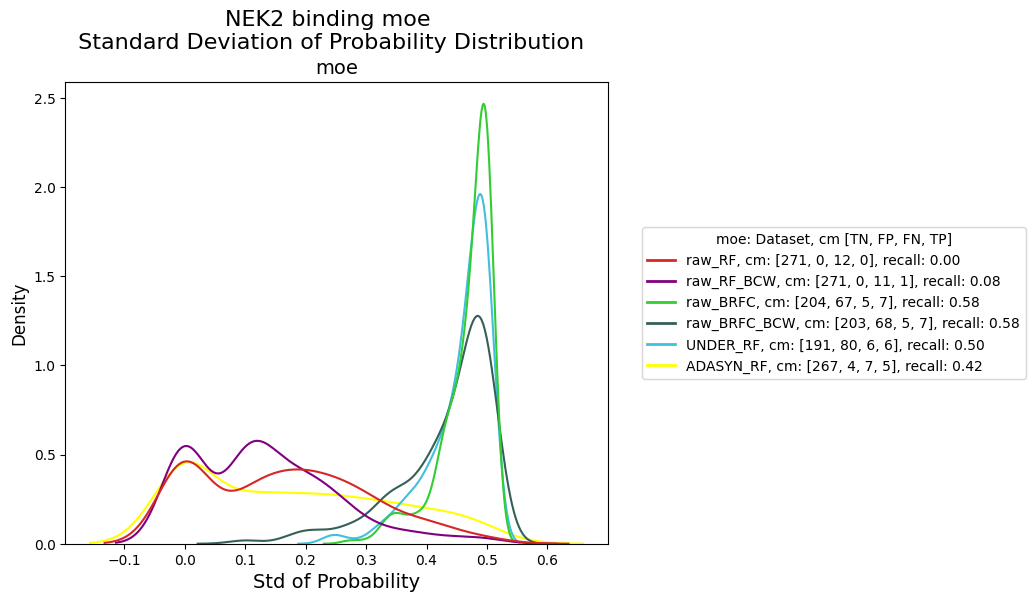

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.371513              TP  0.000001  NEK2_binding       mfp   
1                0.407953              TP  0.063600  NEK2_binding       mfp   
2                0.482418              TP  0.117384  NEK2_binding       mfp   
3                0.000000              TN  1.659073  NEK2_binding       mfp   
4                0.171447              TN  0.781756  NEK2_binding       mfp   
..                    ...             ...       ...           ...       ...   
278              0.337998              FN  1.376632  NEK2_binding       mfp   
279              0.402015              FN  1.007014  NEK2_binding       mfp   
280              0.000000              FN  0.704972  NEK2_binding       mfp   
281              0.291953              FN  1.328793  NEK2_binding       mfp   
282              0.502519              FN  0.816507  NEK2_binding       mfp   

      strategy RF_type              cm    recall  
0       raw_RF      RF  [270, 1, 9, 3]  0.250000  
1       raw_RF      RF  [270, 1, 9, 3]  0.250000  
2       raw_RF      RF  [270, 1, 9, 3]  0.250000  
3       raw_RF      RF  [270, 1, 9, 3]  0.250000  
4       raw_RF      RF  [270, 1, 9, 3]  0.250000  
..         ...     ...             ...       ...  
278  ADASYN_RF      RF  [267, 4, 8, 4]  0.333333  
279  ADASYN_RF      RF  [267, 4, 8, 4]  0.333333  
280  ADASYN_RF      RF  [267, 4, 8, 4]  0.333333  
281  ADASYN_RF      RF  [267, 4, 8, 4]  0.333333  
282  ADASYN_RF      RF  [267, 4, 8, 4]  0.333333  

[1698 rows x 9 columns]

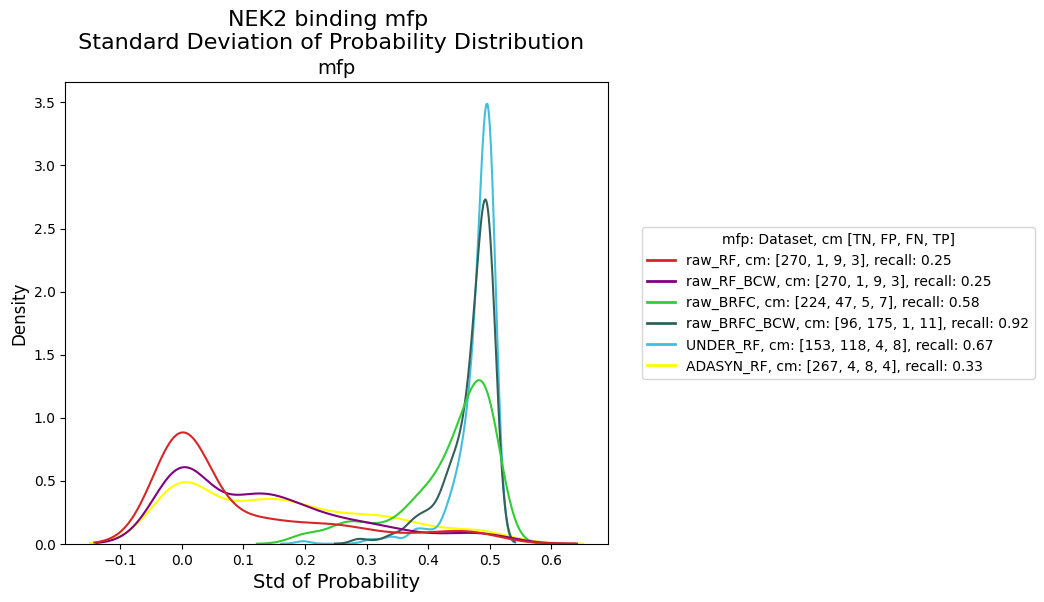

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist              NEK  \
0                0.496045              TP  0.618961  NEK2_inhibition   
1                0.492366              TP  0.954109  NEK2_inhibition   
2                0.492366              TP  0.000001  NEK2_inhibition   
3                0.468826              TP  0.000001  NEK2_inhibition   
4                0.460566              TP  0.332209  NEK2_inhibition   
..                    ...             ...       ...              ...   
404              0.100000              FN  1.659363  NEK2_inhibition   
405              0.394277              FN  0.882456  NEK2_inhibition   
406              0.502117              FN  0.706641  NEK2_inhibition   
407              0.287623              FN  2.724490  NEK2_inhibition   
408              0.502117              FN  1.020807  NEK2_inhibition   

    feat_type   strategy RF_type                cm    recall  
0         moe     raw_RF      RF   [381, 0, 19, 9]  0.321429  
1         moe     raw_RF      RF   [381, 0, 19, 9]  0.321429  
2         moe     raw_RF      RF   [381, 0, 19, 9]  0.321429  
3         moe     raw_RF      RF   [381, 0, 19, 9]  0.321429  
4         moe     raw_RF      RF   [381, 0, 19, 9]  0.321429  
..        ...        ...     ...               ...       ...  
404       moe  ADASYN_RF      RF  [377, 4, 10, 18]  0.642857  
405       moe  ADASYN_RF      RF  [377, 4, 10, 18]  0.642857  
406       moe  ADASYN_RF      RF  [377, 4, 10, 18]  0.642857  
407       moe  ADASYN_RF      RF  [377, 4, 10, 18]  0.642857  
408       moe  ADASYN_RF      RF  [377, 4, 10, 18]  0.642857  

[2454 rows x 9 columns]

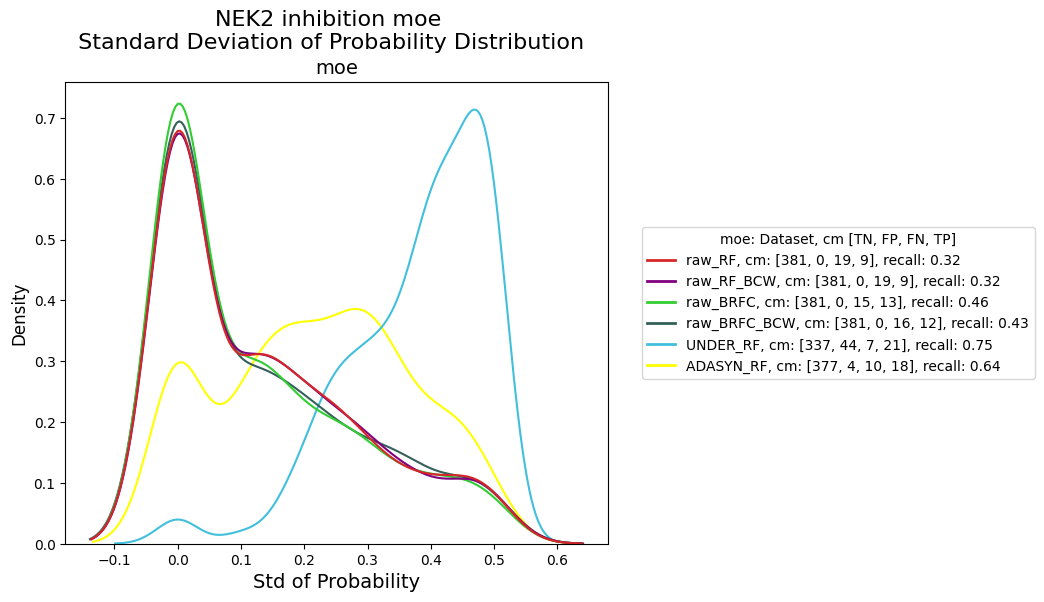

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist              NEK  \
0                0.479372              TP  2.566406  NEK2_inhibition   
1                0.171447              TP  0.000001  NEK2_inhibition   
2                0.446196              TP  1.023809  NEK2_inhibition   
3                0.386123              TP  0.000001  NEK2_inhibition   
4                0.171447              TP  0.019906  NEK2_inhibition   
..                    ...             ...       ...              ...   
404              0.416333              FN  0.059342  NEK2_inhibition   
405              0.348735              FN  1.210706  NEK2_inhibition   
406              0.000000              FN  1.931377  NEK2_inhibition   
407              0.500908              FN  0.858666  NEK2_inhibition   
408              0.287623              FN  1.678413  NEK2_inhibition   

    feat_type   strategy RF_type               cm    recall  
0         mfp     raw_RF      RF  [378, 3, 8, 20]  0.714286  
1         mfp     raw_RF      RF  [378, 3, 8, 20]  0.714286  
2         mfp     raw_RF      RF  [378, 3, 8, 20]  0.714286  
3         mfp     raw_RF      RF  [378, 3, 8, 20]  0.714286  
4         mfp     raw_RF      RF  [378, 3, 8, 20]  0.714286  
..        ...        ...     ...              ...       ...  
404       mfp  ADASYN_RF      RF  [373, 8, 9, 19]  0.678571  
405       mfp  ADASYN_RF      RF  [373, 8, 9, 19]  0.678571  
406       mfp  ADASYN_RF      RF  [373, 8, 9, 19]  0.678571  
407       mfp  ADASYN_RF      RF  [373, 8, 9, 19]  0.678571  
408       mfp  ADASYN_RF      RF  [373, 8, 9, 19]  0.678571  

[2454 rows x 9 columns]

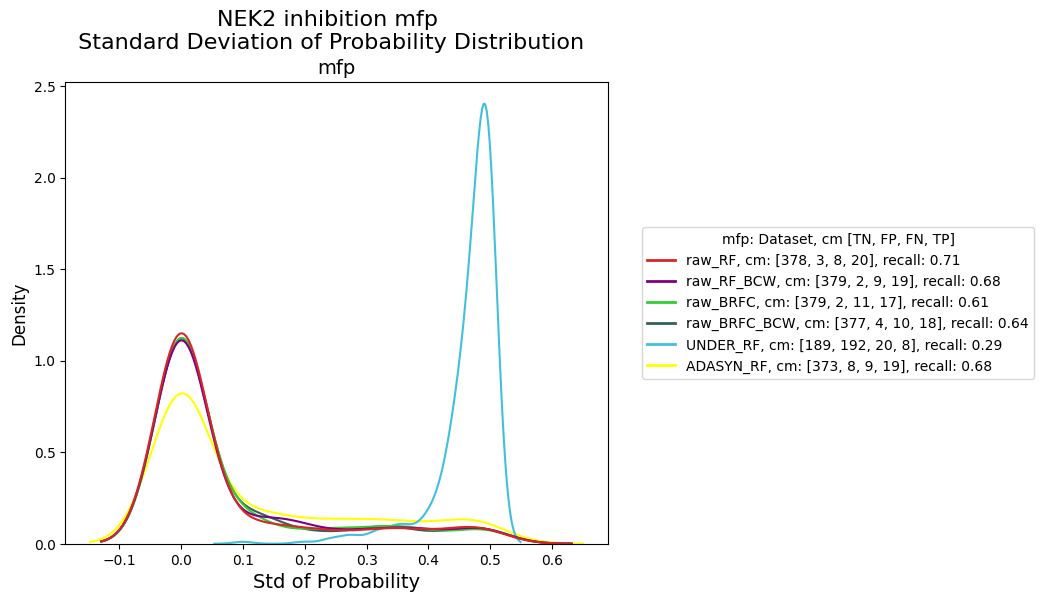

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.326599              TN  0.613096  NEK3_binding       moe   
1                0.171447              TN  0.461787  NEK3_binding       moe   
2                0.140705              TN  0.853806  NEK3_binding       moe   
3                0.000000              TN  0.000001  NEK3_binding       moe   
4                0.000000              TN  0.000001  NEK3_binding       moe   
..                    ...             ...       ...           ...       ...   
277              0.171447              FN  1.292106  NEK3_binding       moe   
278              0.171447              FN  1.410826  NEK3_binding       moe   
279              0.100000              FN  1.048819  NEK3_binding       moe   
280              0.386123              FN  1.118231  NEK3_binding       moe   
281              0.502117              FN  1.625166  NEK3_binding       moe   

      strategy RF_type                cm    recall  
0       raw_RF      RF   [262, 3, 17, 0]  0.000000  
1       raw_RF      RF   [262, 3, 17, 0]  0.000000  
2       raw_RF      RF   [262, 3, 17, 0]  0.000000  
3       raw_RF      RF   [262, 3, 17, 0]  0.000000  
4       raw_RF      RF   [262, 3, 17, 0]  0.000000  
..         ...     ...               ...       ...  
277  ADASYN_RF      RF  [253, 12, 14, 3]  0.176471  
278  ADASYN_RF      RF  [253, 12, 14, 3]  0.176471  
279  ADASYN_RF      RF  [253, 12, 14, 3]  0.176471  
280  ADASYN_RF      RF  [253, 12, 14, 3]  0.176471  
281  ADASYN_RF      RF  [253, 12, 14, 3]  0.176471  

[1692 rows x 9 columns]

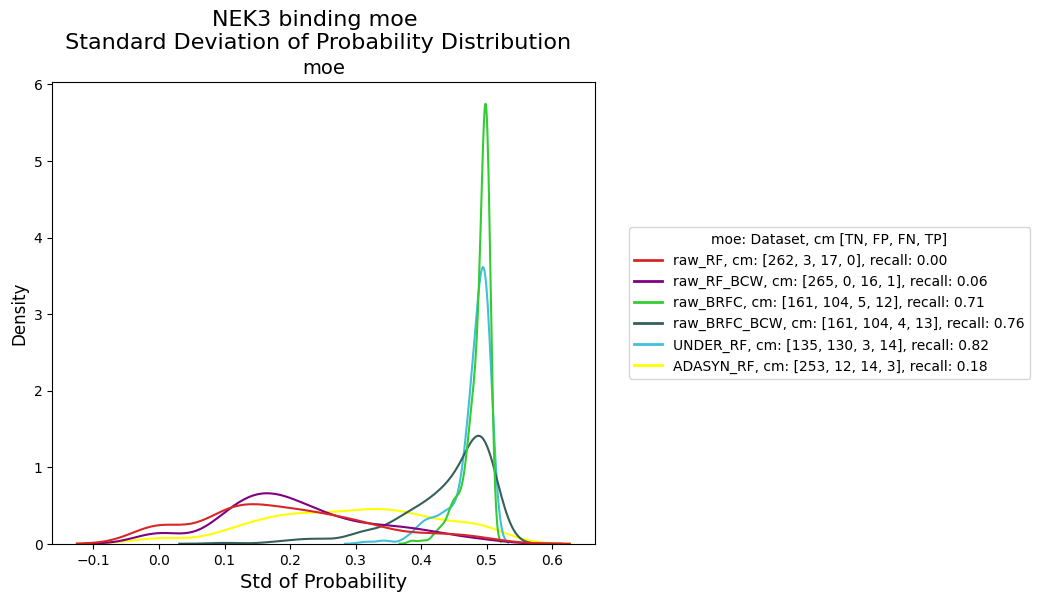

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.394277              TP  0.772619  NEK3_binding       mfp   
1                0.497570              TP  0.000001  NEK3_binding       mfp   
2                0.238683              TP  0.583854  NEK3_binding       mfp   
3                0.479372              TP  0.871869  NEK3_binding       mfp   
4                0.494311              TP  0.350719  NEK3_binding       mfp   
..                    ...             ...       ...           ...       ...   
277              0.000000              FN  0.630334  NEK3_binding       mfp   
278              0.000000              FN  1.246827  NEK3_binding       mfp   
279              0.000000              FN  1.202017  NEK3_binding       mfp   
280              0.100000              FN  1.373095  NEK3_binding       mfp   
281              0.000000              FN  1.594460  NEK3_binding       mfp   

      strategy RF_type                cm    recall  
0       raw_RF      RF   [262, 3, 12, 5]  0.294118  
1       raw_RF      RF   [262, 3, 12, 5]  0.294118  
2       raw_RF      RF   [262, 3, 12, 5]  0.294118  
3       raw_RF      RF   [262, 3, 12, 5]  0.294118  
4       raw_RF      RF   [262, 3, 12, 5]  0.294118  
..         ...     ...               ...       ...  
277  ADASYN_RF      RF  [251, 14, 10, 7]  0.411765  
278  ADASYN_RF      RF  [251, 14, 10, 7]  0.411765  
279  ADASYN_RF      RF  [251, 14, 10, 7]  0.411765  
280  ADASYN_RF      RF  [251, 14, 10, 7]  0.411765  
281  ADASYN_RF      RF  [251, 14, 10, 7]  0.411765  

[1692 rows x 9 columns]

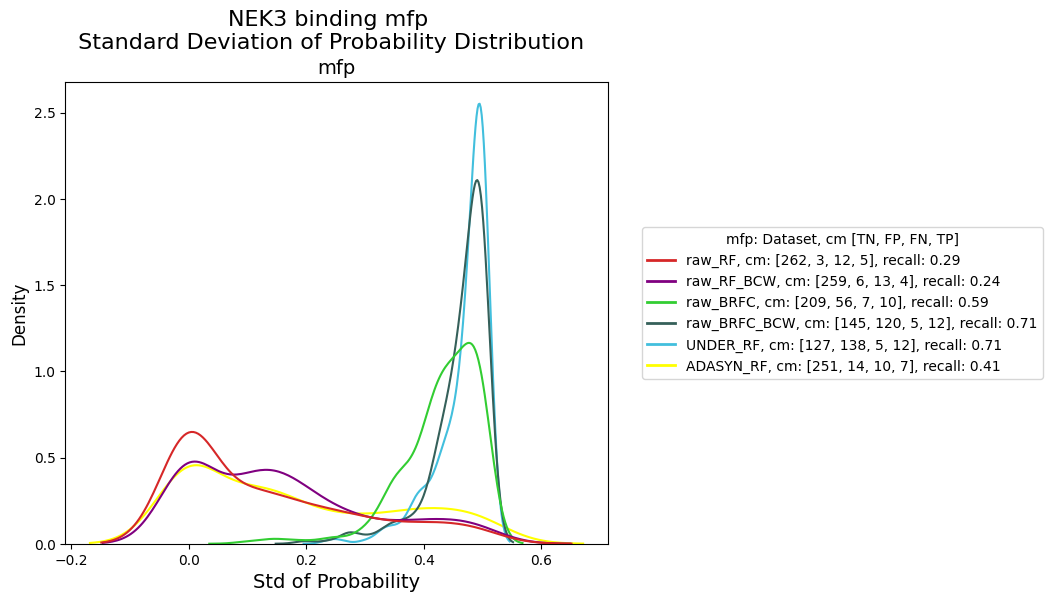

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.429235              TP  0.194676  NEK5_binding       moe   
1                0.402015              TP  0.101454  NEK5_binding       moe   
2                0.238683              TP  0.000001  NEK5_binding       moe   
3                0.500000              TP  1.285910  NEK5_binding       moe   
4                0.337998              TP  0.444404  NEK5_binding       moe   
..                    ...             ...       ...           ...       ...   
243              0.502117              FN  1.301532  NEK5_binding       moe   
244              0.196946              FN  1.234279  NEK5_binding       moe   
245              0.171447              FN  2.650207  NEK5_binding       moe   
246              0.429235              FN  0.320658  NEK5_binding       moe   
247              0.377525              FN  0.499448  NEK5_binding       moe   

      strategy RF_type               cm  recall  
0       raw_RF      RF  [228, 0, 14, 6]     0.3  
1       raw_RF      RF  [228, 0, 14, 6]     0.3  
2       raw_RF      RF  [228, 0, 14, 6]     0.3  
3       raw_RF      RF  [228, 0, 14, 6]     0.3  
4       raw_RF      RF  [228, 0, 14, 6]     0.3  
..         ...     ...              ...     ...  
243  ADASYN_RF      RF  [221, 7, 12, 8]     0.4  
244  ADASYN_RF      RF  [221, 7, 12, 8]     0.4  
245  ADASYN_RF      RF  [221, 7, 12, 8]     0.4  
246  ADASYN_RF      RF  [221, 7, 12, 8]     0.4  
247  ADASYN_RF      RF  [221, 7, 12, 8]     0.4  

[1488 rows x 9 columns]

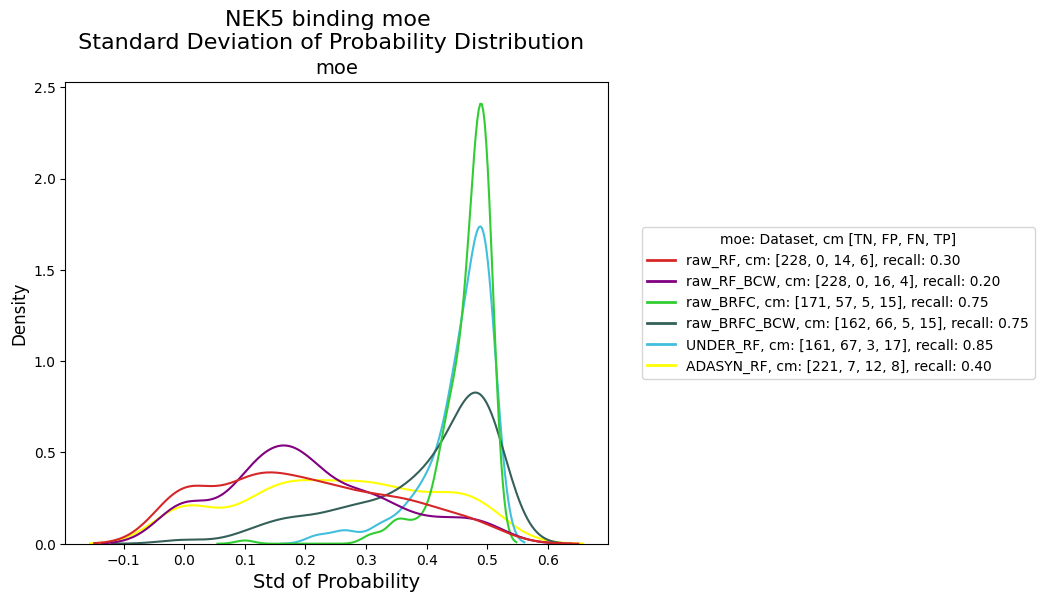

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.140705              TP  0.000001  NEK5_binding       mfp   
1                0.140705              TP  0.000001  NEK5_binding       mfp   
2                0.476095              TP  0.525781  NEK5_binding       mfp   
3                0.000000              TP  0.000001  NEK5_binding       mfp   
4                0.219043              TP  0.000001  NEK5_binding       mfp   
..                    ...             ...       ...           ...       ...   
243              0.429235              FN  1.504732  NEK5_binding       mfp   
244              0.394277              FN  1.812140  NEK5_binding       mfp   
245              0.219043              FN  0.000001  NEK5_binding       mfp   
246              0.100000              FN  1.599593  NEK5_binding       mfp   
247              0.219043              FN  1.411227  NEK5_binding       mfp   

      strategy RF_type                cm  recall  
0       raw_RF      RF  [225, 3, 10, 10]     0.5  
1       raw_RF      RF  [225, 3, 10, 10]     0.5  
2       raw_RF      RF  [225, 3, 10, 10]     0.5  
3       raw_RF      RF  [225, 3, 10, 10]     0.5  
4       raw_RF      RF  [225, 3, 10, 10]     0.5  
..         ...     ...               ...     ...  
243  ADASYN_RF      RF  [224, 4, 10, 10]     0.5  
244  ADASYN_RF      RF  [224, 4, 10, 10]     0.5  
245  ADASYN_RF      RF  [224, 4, 10, 10]     0.5  
246  ADASYN_RF      RF  [224, 4, 10, 10]     0.5  
247  ADASYN_RF      RF  [224, 4, 10, 10]     0.5  

[1488 rows x 9 columns]

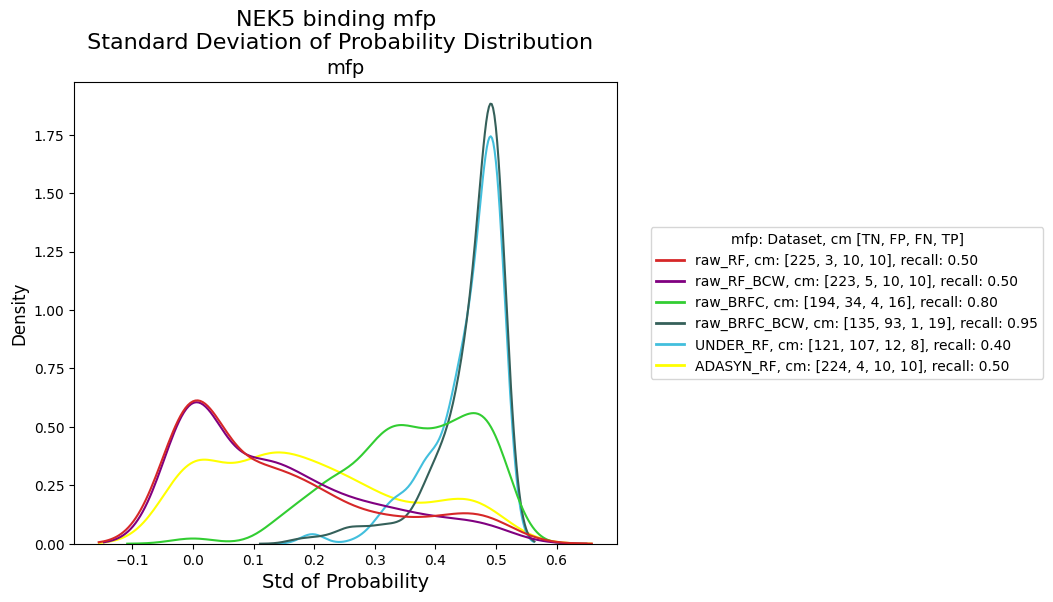

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.000000              TN  0.000001  NEK9_binding       moe   
1                0.377525              TN  1.329870  NEK9_binding       moe   
2                0.171447              TN  0.607102  NEK9_binding       moe   
3                0.000000              TN  0.583403  NEK9_binding       moe   
4                0.451261              TN  1.099025  NEK9_binding       moe   
..                    ...             ...       ...           ...       ...   
278              0.238683              FN  1.506406  NEK9_binding       moe   
279              0.314466              FN  1.351933  NEK9_binding       moe   
280              0.440844              FN  0.270706  NEK9_binding       moe   
281              0.196946              FN  1.028969  NEK9_binding       moe   
282              0.490207              FN  0.921022  NEK9_binding       moe   

      strategy RF_type               cm    recall  
0       raw_RF      RF  [270, 0, 13, 0]  0.000000  
1       raw_RF      RF  [270, 0, 13, 0]  0.000000  
2       raw_RF      RF  [270, 0, 13, 0]  0.000000  
3       raw_RF      RF  [270, 0, 13, 0]  0.000000  
4       raw_RF      RF  [270, 0, 13, 0]  0.000000  
..         ...     ...              ...       ...  
278  ADASYN_RF      RF  [267, 3, 12, 1]  0.076923  
279  ADASYN_RF      RF  [267, 3, 12, 1]  0.076923  
280  ADASYN_RF      RF  [267, 3, 12, 1]  0.076923  
281  ADASYN_RF      RF  [267, 3, 12, 1]  0.076923  
282  ADASYN_RF      RF  [267, 3, 12, 1]  0.076923  

[1698 rows x 9 columns]

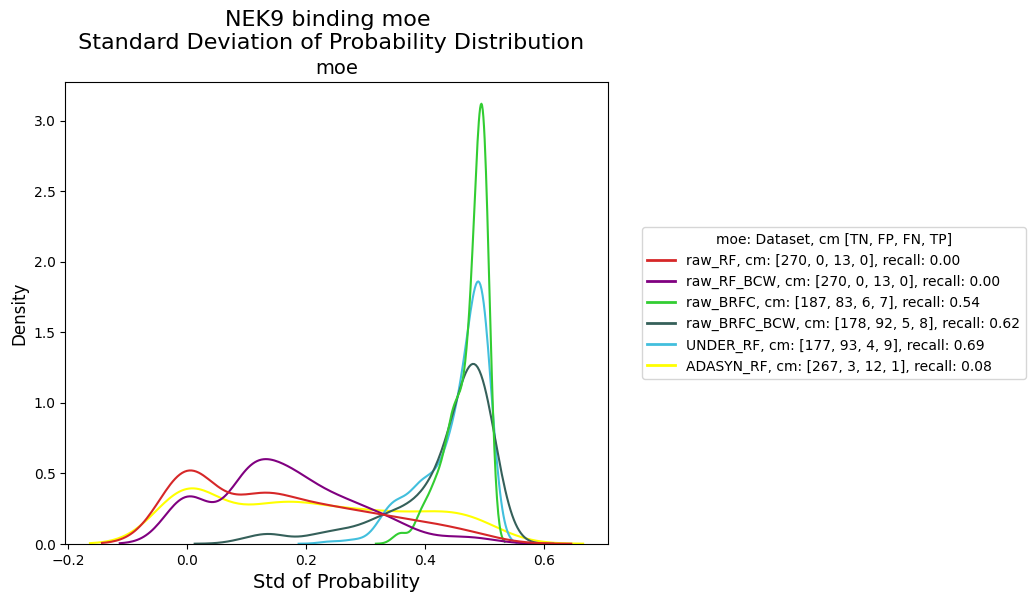

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist           NEK feat_type  \
0                0.206245              TP  0.427472  NEK9_binding       mfp   
1                0.196946              TN  0.000001  NEK9_binding       mfp   
2                0.000000              TN  2.652304  NEK9_binding       mfp   
3                0.000000              TN  0.000001  NEK9_binding       mfp   
4                0.000000              TN  0.000001  NEK9_binding       mfp   
..                    ...             ...       ...           ...       ...   
278              0.435194              FN  1.168891  NEK9_binding       mfp   
279              0.502519              FN  0.760597  NEK9_binding       mfp   
280              0.358870              FN  1.267082  NEK9_binding       mfp   
281              0.460566              FN  0.914618  NEK9_binding       mfp   
282              0.490207              FN  1.278427  NEK9_binding       mfp   

      strategy RF_type               cm    recall  
0       raw_RF      RF  [268, 2, 12, 1]  0.076923  
1       raw_RF      RF  [268, 2, 12, 1]  0.076923  
2       raw_RF      RF  [268, 2, 12, 1]  0.076923  
3       raw_RF      RF  [268, 2, 12, 1]  0.076923  
4       raw_RF      RF  [268, 2, 12, 1]  0.076923  
..         ...     ...              ...       ...  
278  ADASYN_RF      RF  [268, 2, 10, 3]  0.230769  
279  ADASYN_RF      RF  [268, 2, 10, 3]  0.230769  
280  ADASYN_RF      RF  [268, 2, 10, 3]  0.230769  
281  ADASYN_RF      RF  [268, 2, 10, 3]  0.230769  
282  ADASYN_RF      RF  [268, 2, 10, 3]  0.230769  

[1698 rows x 9 columns]

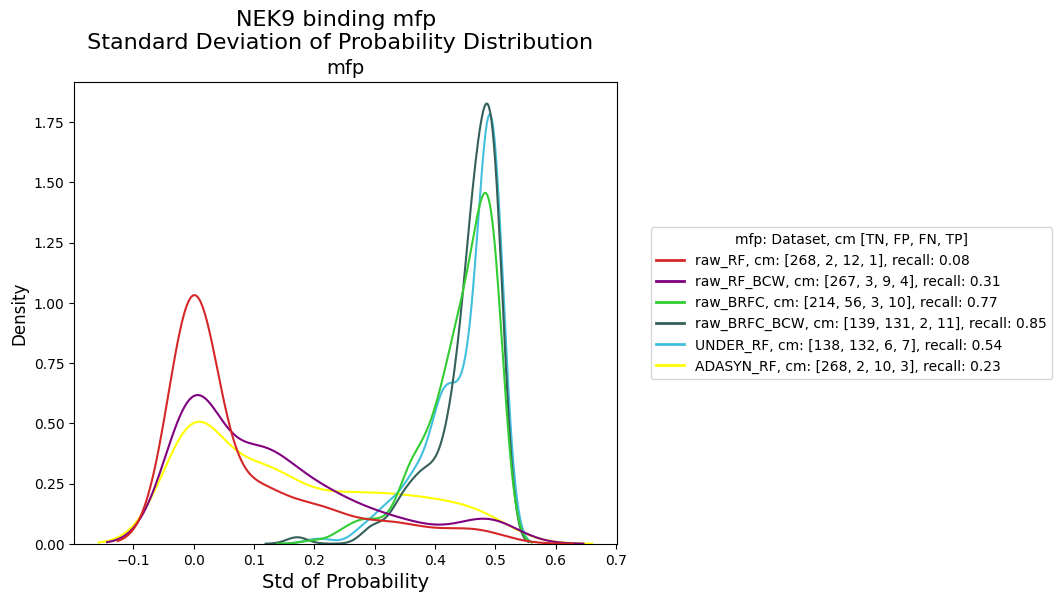

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist              NEK feat_type  \
0               0.464823              TP  0.000001  NEK9_inhibition       moe   
1               0.429235              TP  0.000001  NEK9_inhibition       moe   
2               0.502117              TP  0.912576  NEK9_inhibition       moe   
3               0.377525              TP  0.000001  NEK9_inhibition       moe   
4               0.337998              TP  0.000001  NEK9_inhibition       moe   
..                   ...             ...       ...              ...       ...   
75              0.490207              FP  0.746425  NEK9_inhibition       moe   
76              0.000000              FP  0.194686  NEK9_inhibition       moe   
77              0.219043              FN  0.548893  NEK9_inhibition       moe   
78              0.490207              FN  1.062539  NEK9_inhibition       moe   
79              0.256432              FN  2.621881  NEK9_inhibition       moe   

     strategy RF_type             cm    recall  
0      raw_RF      RF  [70, 1, 4, 5]  0.555556  
1      raw_RF      RF  [70, 1, 4, 5]  0.555556  
2      raw_RF      RF  [70, 1, 4, 5]  0.555556  
3      raw_RF      RF  [70, 1, 4, 5]  0.555556  
4      raw_RF      RF  [70, 1, 4, 5]  0.555556  
..        ...     ...            ...       ...  
75  ADASYN_RF      RF  [69, 2, 3, 6]  0.666667  
76  ADASYN_RF      RF  [69, 2, 3, 6]  0.666667  
77  ADASYN_RF      RF  [69, 2, 3, 6]  0.666667  
78  ADASYN_RF      RF  [69, 2, 3, 6]  0.666667  
79  ADASYN_RF      RF  [69, 2, 3, 6]  0.666667  

[480 rows x 9 columns]

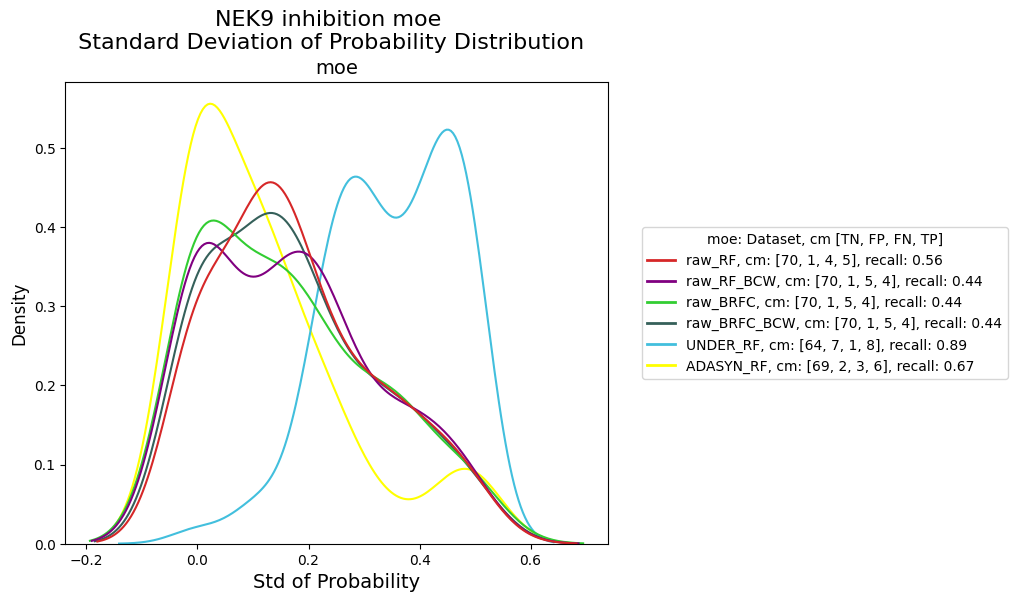

{}
['raw_RF' 'raw_RF_BCW' 'raw_BRFC' 'raw_BRFC_BCW' 'UNDER_RF' 'ADASYN_RF']


std of probabilities prediction_type    ADdist              NEK feat_type  \
0               0.337998              TP  0.000001  NEK9_inhibition       mfp   
1               0.000000              TP  0.000001  NEK9_inhibition       mfp   
2               0.000000              TP  0.000001  NEK9_inhibition       mfp   
3               0.219043              TP  0.058942  NEK9_inhibition       mfp   
4               0.100000              TP  0.395066  NEK9_inhibition       mfp   
..                   ...             ...       ...              ...       ...   
75              0.000000              FP  0.680331  NEK9_inhibition       mfp   
76              0.100000              FN  0.953324  NEK9_inhibition       mfp   
77              0.100000              FN  1.310072  NEK9_inhibition       mfp   
78              0.000000              FN  1.507467  NEK9_inhibition       mfp   
79              0.492366              FN  0.068669  NEK9_inhibition       mfp   

     strategy RF_type             cm    recall  
0      raw_RF      RF  [70, 1, 4, 5]  0.555556  
1      raw_RF      RF  [70, 1, 4, 5]  0.555556  
2      raw_RF      RF  [70, 1, 4, 5]  0.555556  
3      raw_RF      RF  [70, 1, 4, 5]  0.555556  
4      raw_RF      RF  [70, 1, 4, 5]  0.555556  
..        ...     ...            ...       ...  
75  ADASYN_RF      RF  [65, 6, 4, 5]  0.555556  
76  ADASYN_RF      RF  [65, 6, 4, 5]  0.555556  
77  ADASYN_RF      RF  [65, 6, 4, 5]  0.555556  
78  ADASYN_RF      RF  [65, 6, 4, 5]  0.555556  
79  ADASYN_RF      RF  [65, 6, 4, 5]  0.555556  

[480 rows x 9 columns]

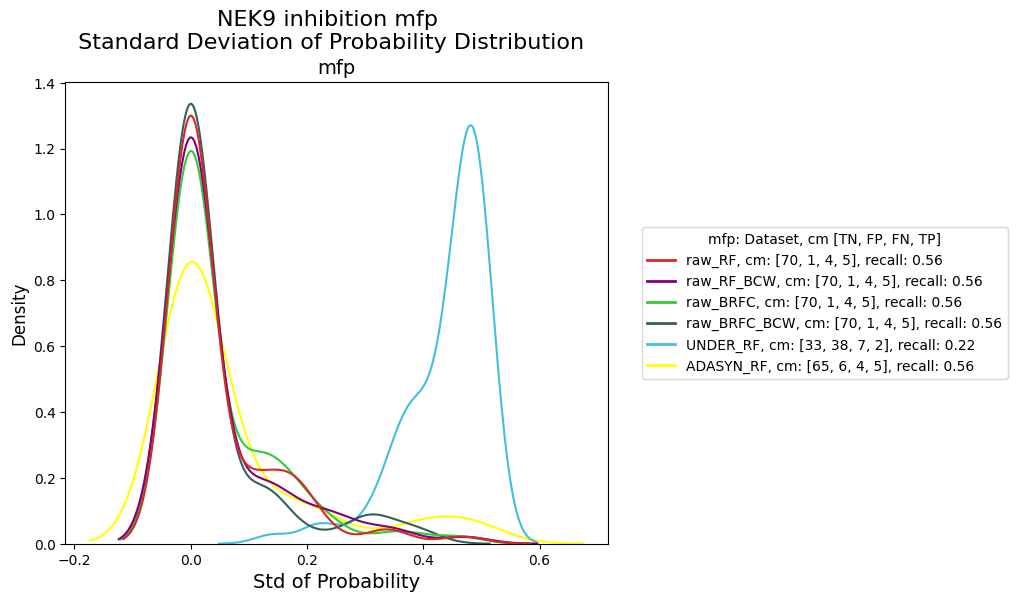

In [833]:
rf_df
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition'] 
nek_list = ["2", "3", "5", "9"]
nektype = ['binding','inhibition']
feat_types = ['moe', 'mfp']
samplings = ['scaled', 'UNDER' , 'SMOTE', 'ADASYN']
model_types = ['RF','RF_BCW', 'BRFC', 'BRFC_BCW']
col_names = ['prediction_type', 'ADdist', 'model_type']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
category_order = ['TP', 'TN', 'FP', 'FN']
k=7
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
figure_path6 = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/AD/figures/AD_RF_std_prob/std_prob_distribution/paired_down/'
 
for nek in neks:
    dfs = [] 
    for feat in ['moe', 'mfp']: 
        for rf in RF_types:
            for samp in samplings: 
                df_root, bind_inhib = course_correct(nek)
                df_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/{df_root}'
                nek_num = nek[3]
                full_df = pd.read_csv(f'{df_path}NEK{nek_num}_{bind_inhib}_{feat}_{samp}_df.csv') 
                train_df = full_df[full_df['subset'] == 'train'].select_dtypes(include=numerics).drop(columns=['active'])
                test_df = full_df[full_df['subset'] == 'test'].select_dtypes(include=numerics).drop(columns=['active'])
                test_dist = calc_AD_kmean_dist(train_df, test_df, k)
                train_dist = calc_AD_kmean_dist(train_df, train_df, k)
                pred = pd.read_csv(f'{result_path}NEK{nek_num}_{bind_inhib}_{feat}_{samp}_{rf}_test.csv')
                stdprobs = pd.read_csv(f'{prob_path}NEK{nek_num}_{bind_inhib}_std_prob_{samp}_{rf}.csv')
                std0 = stdprobs[f'std0_{feat}'].to_numpy()
                std1 = stdprobs[f'std1_{feat}'].to_numpy()
                preds = pred['prediction']
                true_labels = pred['y'].to_numpy()
                cm = pred['cm'][0]
                rf_types = pred['RF_type'].to_numpy()
                df = pd.DataFrame({'prediction': preds, 'prediction_type': pred['prediction_type'], 'std0': std0, 'std1': std1, 'ADdist': test_dist, 'true_labels': true_labels, 'cm': cm, 'RF_type': rf_types})
                if (samp == 'scaled'): 
                    samp = 'raw'
                df['NEK'] = nek
                df['feat_type'] = feat
                df['strategy'] = samp 
                df['recall'] = pred['recall'].iloc[0]
                
                dfs.append(df) 
    
                if (samp == 'raw'): 
                    samp = 'scaled'
        filename = f'{nek}_{feat}_prob_std_dist'
        title = f'NEK{nek_num} {bind_inhib} {feat}\n Standard Deviation of Probability Distribution' 
        plot_std_dist_moemfp2(dfs,feat, title, figure_path6, filename)
        # plot_std_dist_moemfp2(dfs, feat, title)